# Predicting Clusters/Teams Stats Given 2D Player Roster Data with  Convolutional Neural Networks

In [341]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [15]:
# player stats needed

player_stats_required=['C', 'F', 'G', 'GF', 'PF',
       'PG', 'SF', 'SG', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'STL',
       'BLK', 'TO', 'DD2', 'TD3', 'PER', 'AGE', 'OFFRTG', 'DEFRTG', 'NETRTG',
       'AST%', 'AST/TO', 'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO',
       'EFG%', 'TS%', 'USG%', 'PACE', 'PIE', 'POSS']

# Importing Data

In [50]:
# importing team data
teams=pd.read_csv('NBA_Team_Data_1999-2020.csv',index_col=0).replace('LA Clippers','Los Angeles Clippers')
teams.head()

,TEAM,YEAR,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,AST\nRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS
0,Atlanta Hawks,1999-00,82,28,54,0.341,48.4,94.3,36.6,83.0,...,14.6,33.4,69.8,51.6,16.4,46.0,50.3,93.55,46.2,7731
1,Boston Celtics,1999-00,82,35,47,0.427,48.1,99.3,37.2,83.9,...,15.9,32.7,70.5,50.6,15.9,47.4,52.0,96.19,47.6,7918
2,Charlotte Hornets,1999-00,82,49,33,0.598,48.2,98.4,35.8,79.7,...,18.4,28.3,71.2,50.1,15.3,47.5,53.0,95.58,54.1,7876
3,Chicago Bulls,1999-00,82,17,65,0.207,48.3,84.8,31.3,75.4,...,15.8,33.1,67.6,49.9,20.8,44.3,49.0,90.93,41.7,7492
4,Cleveland Cavaliers,1999-00,82,32,50,0.390,48.4,97.0,36.3,82.1,...,17.3,30.8,68.5,49.6,17.7,46.8,51.6,97.36,47.5,8051


In [49]:
#importing player data

# adding a column for team name from team abbreviation mapping list

players=pd.merge(pd.read_csv('NBA_Player_Data_1999-2020.csv',index_col=0) ,pd.read_csv('mapping.csv',index_col=0),on='TEAM')
players.head(5)

,PLAYER,YEAR,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS,TEAM NAME
0,Shaquille O'Neal,1999-00,C,79,40.0,29.7,12.1,21.1,57.4,0.0,...,21.9,16.4,8.8,57.4,57.8,31.1,94.28,21.4,6211,Los Angeles Lakers
1,Kobe Bryant,1999-00,SF,66,38.2,22.5,8.4,17.9,46.8,0.7,...,11.4,7.9,9.8,48.8,54.6,26.1,96.10,14.9,5047,Los Angeles Lakers
2,Glen Rice,1999-00,SF,80,31.6,15.9,5.3,12.3,43.0,1.1,...,10.0,6.2,7.9,47.2,55.1,21.6,95.65,11.1,5045,Los Angeles Lakers
3,Ron Harper,1999-00,G,80,25.5,7.0,2.7,6.6,39.9,0.4,...,11.3,7.9,13.2,43.0,46.8,15.6,93.99,8.6,4006,Los Angeles Lakers
4,Rick Fox,1999-00,SF,82,18.0,6.5,2.5,6.1,41.4,0.7,...,8.7,6.3,11.5,47.3,50.2,17.9,97.09,7.2,2984,Los Angeles Lakers


# Function to Normalize Player Data

In [18]:
def normalize_player_data(df):
    non_numeric=['PLAYER','YEAR','GP','TEAM NAME','TEAM']
    
    add_on=df[non_numeric]
    
    numeric_data=df.drop(non_numeric,axis=1)
    numeric_data=pd.concat([ pd.get_dummies(numeric_data['POS']),numeric_data.drop(['POS'],axis=1)], axis=1)
    
    scaler = MinMaxScaler()
    scaler.fit(numeric_data)
    normalized_data=scaler.transform(numeric_data)
    normalized_data=pd.DataFrame(normalized_data)
    normalized_data.columns=numeric_data.columns
    
    return pd.concat([add_on, normalized_data], axis=1)

In [338]:
# viewing normalized player data

df_norm=normalize_player_data(players)
df_norm[['PLAYER']+player_stats_required]

,PLAYER,C,F,G,GF,PF,PG,SF,SG,MIN,...,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS
0,Shaquille O'Neal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913953,...,0.210,0.383538,0.382284,0.131934,0.382667,0.365887,0.591793,0.178514,0.384451,0.863200
1,Kobe Bryant,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.872093,...,0.084,0.199650,0.184149,0.146927,0.325333,0.343879,0.483801,0.204972,0.338088,0.701376
2,Glen Rice,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.718605,...,0.044,0.175131,0.144522,0.118441,0.314667,0.347318,0.386609,0.198430,0.310984,0.701098
3,Ron Harper,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.576744,...,0.090,0.197898,0.184149,0.197901,0.286667,0.290234,0.257019,0.174299,0.293153,0.556652
4,Rick Fox,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.402326,...,0.080,0.152364,0.146853,0.172414,0.315333,0.313618,0.306695,0.219363,0.283167,0.414570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8978,Frank Jackson,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.297674,...,0.050,0.122592,0.111888,0.155922,0.317333,0.319120,0.358531,0.369967,0.271041,0.247880
8979,Nickeil Alexander-Walker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.276744,...,0.030,0.213660,0.158508,0.190405,0.303333,0.293673,0.423326,0.328536,0.281027,0.178090
8980,Kenrich Williams,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.479070,...,0.110,0.274956,0.242424,0.139430,0.288000,0.263411,0.107991,0.310656,0.268902,0.248297
8981,Zylan Cheatham,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.281395,...,0.126,0.224168,0.221445,0.374813,0.444667,0.427098,0.142549,0.345835,0.256063,0.015293


# Function to get 2D Dataset of a Historic Specific Team 

In [40]:
""" Getting NBA roster given team and year, returns top N players based on minutes played

Args:
    team: team name
    year: year played
    normalized_player_data: normalized player stats from functions above
    N: top N players by mnutes

Returns:
    roster: normalized stats for team roster for the specific team in the specific year

"""

def getConv2D(team,year,normalized_player_data,N):
    roster=normalized_player_data[normalized_player_data['TEAM NAME']==team].query("YEAR=='{}'".format(year))
    roster=roster.sort_values('MIN',ascending=False).head(N)
    return roster

In [41]:
# testing out function

getConv2D('Los Angeles Lakers','2001-02',df_norm,8)

,PLAYER,YEAR,GP,TEAM NAME,TEAM,C,F,G,GF,PF,...,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS
25,Kobe Bryant,2001-02,80,Los Angeles Lakers,LAL,0.0,0.0,0.0,0.0,0.0,...,0.072,0.180385,0.163170,0.133433,0.319333,0.342503,0.565875,0.171827,0.343081,0.832615
24,Shaquille O'Neal,2001-02,67,Los Angeles Lakers,LAL,1.0,0.0,0.0,0.0,0.0,...,0.198,0.330998,0.337995,0.134933,0.386000,0.374140,0.598272,0.169356,0.369472,0.657028
26,Derek Fisher,2001-02,70,Los Angeles Lakers,LAL,0.0,0.0,0.0,0.0,0.0,...,0.014,0.112084,0.083916,0.097451,0.346667,0.346630,0.293737,0.182585,0.296006,0.540108
27,Rick Fox,2001-02,82,Los Angeles Lakers,LAL,0.0,0.0,0.0,0.0,0.0,...,0.078,0.222417,0.195804,0.187406,0.316667,0.313618,0.244060,0.182294,0.286733,0.625469
29,Robert Horry,2001-02,81,Los Angeles Lakers,LAL,0.0,0.0,0.0,0.0,1.0,...,0.118,0.271454,0.251748,0.155922,0.320000,0.331499,0.194384,0.180259,0.308845,0.585847
30,Samaki Walker,2001-02,69,Los Angeles Lakers,LAL,0.0,0.0,0.0,0.0,1.0,...,0.156,0.355517,0.331002,0.148426,0.341333,0.343191,0.198704,0.160052,0.305991,0.443904
28,Devean George,2001-02,82,Los Angeles Lakers,LAL,0.0,0.0,0.0,0.0,0.0,...,0.086,0.208406,0.191142,0.130435,0.316000,0.313618,0.267819,0.173426,0.292439,0.479216
31,Lindsey Hunter,2001-02,82,Los Angeles Lakers,LAL,0.0,0.0,0.0,0.0,0.0,...,0.022,0.106830,0.083916,0.119940,0.308000,0.288858,0.254860,0.170374,0.273181,0.439455


# Data Preprocessing for Convolutional Neural Network

In [285]:
# Adding clusters to teams data 

knn=pd.read_pickle('knn.pkl')
teams['CLUSTER']=knn.labels_
teams['CLUSTER']=teams['CLUSTER'].astype('O')

In [340]:
teams.head(5)

,TEAM,YEAR,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS,CLUSTER
0,Atlanta Hawks,1999-00,82,28,54,0.341,48.4,94.3,36.6,83.0,...,33.4,69.8,51.6,16.4,46.0,50.3,93.55,46.2,7731,4
1,Boston Celtics,1999-00,82,35,47,0.427,48.1,99.3,37.2,83.9,...,32.7,70.5,50.6,15.9,47.4,52.0,96.19,47.6,7918,1
2,Charlotte Hornets,1999-00,82,49,33,0.598,48.2,98.4,35.8,79.7,...,28.3,71.2,50.1,15.3,47.5,53.0,95.58,54.1,7876,5
3,Chicago Bulls,1999-00,82,17,65,0.207,48.3,84.8,31.3,75.4,...,33.1,67.6,49.9,20.8,44.3,49.0,90.93,41.7,7492,4
4,Cleveland Cavaliers,1999-00,82,32,50,0.390,48.4,97.0,36.3,82.1,...,30.8,68.5,49.6,17.7,46.8,51.6,97.36,47.5,8051,1


# Function to get Training Input & Output Data: X,y



In [114]:
""" Getting Training data for Convolutional Neural Network

Args:
    team_df: team 
    normalized_player_data: normalized player stats from functions above
    response_variable: team statistic variable that we wish to predict given a roster of player statistics
    N: top N players by mnutes

Returns:
    X: Input data for our CNN that's in the form a 2D normalized team player stats data
    y: the team statistic we are trying to predict given a roster's player statistics

"""

def ConvolutionalNN_data_import(team_df,normalized_player_df,response_variable,N):
    
    input_data=[]
    output_data=[]

    for team in team_df['TEAM'].unique():
        for year in team_df[team_df['TEAM']==team]['YEAR'].unique():
            df=getConv2D(team,year,normalized_player_df,N)[player_stats_required]
            if len(df)==N:
                input_data.append(np.asarray(df))
                output_data.append(team_df[(team_df['TEAM']==team) & (team_df['YEAR']==year)][response_variable])
                
    return np.asarray(input_data),np.asarray(output_data)

In [321]:
# testing function

X,y=ConvolutionalNN_data_import(teams,df_norm,'CLUSTER',8)

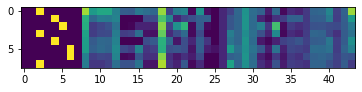

In [345]:
# Visualizing 2D convolution

plt.imshow(X[0])

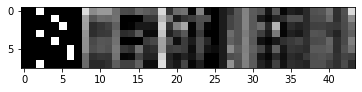

In [346]:
plt.imshow(X[0],cmap='gray')

In [347]:
y[100]

array([5], dtype=object)

# Training Convolutional Neural Networks for each Team Statistics and Team Cluster

In [75]:
# team statistics we want to predict given a roster's stats

team_stats=['WIN%', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF',
       'PFD', '+/-', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST\nRATIO', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%', 'TS%', 'PACE',
       'PIE', 'POSS']

In [333]:
# importing libraries

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix


""" Training Convolutional Neural Network

Args:
    X: input data 
    y: output data
    output: variable to specify type for output data, options: numerical. categorical

Returns(numerical):
    model: trained model object
    preds: predictions done by model for testing data
    y_test: testing data
    residuals: residuals (errors) made by model
    MSE: mean squared error of the model
    
Returns (categorical):
    model: trained model object
    preds: predictions done by model for testing data
    y_test: testing data
    accuracy: accuracy of the model
    

"""


def trainCNN(X,y,output):

    # different convolutional neural network architecture to predict numerical data vs categorical data
    
    if output=='numerical':
        
        
        # splitting data into train and test set
        
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 )
        
        # model training parameters
        
        batch_size = 200
        epochs =200
        
        # input image dimensions
        
        img_rows, img_cols = X[0].shape[0],X[0].shape[1]

        if K.image_data_format() == 'channels_first':
            X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
            X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
            X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')

        
        
        # metric to optimize
        
        def r2_keras(y_true, y_pred):
            SS_res =  K.sum(K.square( y_true - y_pred )) 
            SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
            return ( 1 - SS_res/(SS_tot + K.epsilon()) )
        
        
        
        # model architecture
        
        model = Sequential()
        model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.1))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mean_squared_error', 
                          optimizer='adam',
                          metrics=[r2_keras])

        # viewing model summary
        
        model.summary()
        
        # training model
        
        model.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=2,
                  validation_data=(X_test, y_test))
        
        K.clear_session()
        
        
        # model evaluation
        
        # predictions made by model
        
        preds = model.predict(X_test)
        
        # residuals
        
        residuals =preds[:,0]-y_test[:,0]
        
        # return model data
        
        return model,preds[:,0],y_test[:,0],residuals,mean_squared_error(y_test[:,0], preds[:,0])


    elif output=='categorical':
        
        
        X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
        
        # convert to one hot encoding
        y=to_categorical(y)
        
        # splitting data into train and test set

        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 )
        
        # model training parameters
        
        batch_size = 200
        epochs =200
          
        # shape for training
        
        img_rows, img_cols = X[0].shape[0],X[0].shape[1]
        input_shape = (img_rows, img_cols, 1)

        # model architecture
            
        model = Sequential()
        model.add(Conv2D(64, kernel_size=4, activation='relu', input_shape=(8, 44, 1)))
        model.add(Conv2D(32, kernel_size=3, activation='relu'))
        model.add(Flatten())
        model.add(Dense(8, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # training model
        
        model.fit(X_train, y_train,
                  batch_size = batch_size,
                  epochs=epochs,
                  validation_data=(X_test, y_test))
        
        
        K.clear_session()
        
        
        # model evaluation
        
        # predictions made by model
        
        pred=model.predict(X_test)
    
        
        # getting accuracy

        correct=0
        incorrect=0

        for i,j in zip(y_test,pred):

            if(list(i).index(max(i))==list(j).index(max(j))):
                correct+=1
            else:
                incorrect+=1


        accuracy=(correct/(correct+incorrect))
        
        return model,pred,y_test,accuracy

# Training a CNN with the Function Above for Each Variable Below

In [351]:
teams.drop(['TEAM','YEAR','GP','W','L','MIN'],axis=1).columns

Index(['WIN%', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF',
       'PFD', '+/-', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST\nRATIO', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%', 'TS%', 'PACE',
       'PIE', 'POSS', 'CLUSTER'],
      dtype='object')

In [348]:
team_stats=teams.drop(['TEAM','YEAR','GP','W','L','MIN'],axis=1)

In [336]:
# saving model information into a dicitonary with metric as key
models={}

# for each team statistic
for i in team_stats.columns:
    print(i)
    
    models[i]={}
    
    # Get X,y
    X,y=ConvolutionalNN_data_import(teams,df_norm,i,8)
    
    # check if variable to predict is numeric or categorial
    
    # train model, save variables into dicitonary
    
    if team_stats[i].dtype==float or team_stats[i].dtype==int:
        models[i]['model'],models[i]['pred'],models[i]['y_test'],models[i]['residuals'],models[i]['MSE']=trainCNN(X,y,'numerical')

    elif team_stats[i].dtype==object:
        models[i]['model'],models[i]['pred'],models[i]['y_test'],models[i]['accuracy']=trainCNN(X,y,'categorical')
    
    # save model 
    models[i]['model'].save('models/{}.h5'.format(i))
        


WIN%
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 6, 42, 64)         640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 21, 64)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4032)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               2064896   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                 

Epoch 55/200
3/3 - 0s - loss: 0.0075 - r2_keras: 0.6944 - val_loss: 0.0121 - val_r2_keras: 0.4641 - 145ms/epoch - 48ms/step
Epoch 56/200
3/3 - 0s - loss: 0.0063 - r2_keras: 0.7059 - val_loss: 0.0134 - val_r2_keras: 0.4082 - 144ms/epoch - 48ms/step
Epoch 57/200
3/3 - 0s - loss: 0.0067 - r2_keras: 0.7006 - val_loss: 0.0115 - val_r2_keras: 0.4911 - 147ms/epoch - 49ms/step
Epoch 58/200
3/3 - 0s - loss: 0.0064 - r2_keras: 0.6917 - val_loss: 0.0112 - val_r2_keras: 0.5051 - 150ms/epoch - 50ms/step
Epoch 59/200
3/3 - 0s - loss: 0.0066 - r2_keras: 0.6794 - val_loss: 0.0116 - val_r2_keras: 0.4871 - 143ms/epoch - 48ms/step
Epoch 60/200
3/3 - 0s - loss: 0.0054 - r2_keras: 0.7575 - val_loss: 0.0113 - val_r2_keras: 0.5012 - 148ms/epoch - 49ms/step
Epoch 61/200
3/3 - 0s - loss: 0.0056 - r2_keras: 0.7574 - val_loss: 0.0114 - val_r2_keras: 0.4988 - 146ms/epoch - 49ms/step
Epoch 62/200
3/3 - 0s - loss: 0.0056 - r2_keras: 0.7503 - val_loss: 0.0107 - val_r2_keras: 0.5284 - 149ms/epoch - 50ms/step
Epoch 63

Epoch 121/200
3/3 - 0s - loss: 0.0019 - r2_keras: 0.9093 - val_loss: 0.0088 - val_r2_keras: 0.6110 - 144ms/epoch - 48ms/step
Epoch 122/200
3/3 - 0s - loss: 0.0019 - r2_keras: 0.9122 - val_loss: 0.0090 - val_r2_keras: 0.6050 - 152ms/epoch - 51ms/step
Epoch 123/200
3/3 - 0s - loss: 0.0015 - r2_keras: 0.9385 - val_loss: 0.0115 - val_r2_keras: 0.4915 - 147ms/epoch - 49ms/step
Epoch 124/200
3/3 - 0s - loss: 0.0015 - r2_keras: 0.9313 - val_loss: 0.0110 - val_r2_keras: 0.5131 - 140ms/epoch - 47ms/step
Epoch 125/200
3/3 - 0s - loss: 0.0015 - r2_keras: 0.9389 - val_loss: 0.0092 - val_r2_keras: 0.5949 - 182ms/epoch - 61ms/step
Epoch 126/200
3/3 - 0s - loss: 0.0013 - r2_keras: 0.9474 - val_loss: 0.0093 - val_r2_keras: 0.5906 - 153ms/epoch - 51ms/step
Epoch 127/200
3/3 - 0s - loss: 0.0011 - r2_keras: 0.9499 - val_loss: 0.0119 - val_r2_keras: 0.4753 - 150ms/epoch - 50ms/step
Epoch 128/200
3/3 - 0s - loss: 0.0016 - r2_keras: 0.9195 - val_loss: 0.0109 - val_r2_keras: 0.5207 - 143ms/epoch - 48ms/step


Epoch 186/200
3/3 - 0s - loss: 6.4999e-04 - r2_keras: 0.9719 - val_loss: 0.0122 - val_r2_keras: 0.4637 - 161ms/epoch - 54ms/step
Epoch 187/200
3/3 - 0s - loss: 9.4023e-04 - r2_keras: 0.9518 - val_loss: 0.0098 - val_r2_keras: 0.5695 - 157ms/epoch - 52ms/step
Epoch 188/200
3/3 - 0s - loss: 9.0250e-04 - r2_keras: 0.9623 - val_loss: 0.0089 - val_r2_keras: 0.6055 - 158ms/epoch - 53ms/step
Epoch 189/200
3/3 - 0s - loss: 8.2479e-04 - r2_keras: 0.9657 - val_loss: 0.0088 - val_r2_keras: 0.6120 - 168ms/epoch - 56ms/step
Epoch 190/200
3/3 - 0s - loss: 7.9937e-04 - r2_keras: 0.9655 - val_loss: 0.0096 - val_r2_keras: 0.5764 - 151ms/epoch - 50ms/step
Epoch 191/200
3/3 - 0s - loss: 5.5254e-04 - r2_keras: 0.9737 - val_loss: 0.0099 - val_r2_keras: 0.5627 - 190ms/epoch - 63ms/step
Epoch 192/200
3/3 - 0s - loss: 6.7094e-04 - r2_keras: 0.9699 - val_loss: 0.0110 - val_r2_keras: 0.5127 - 163ms/epoch - 54ms/step
Epoch 193/200
3/3 - 0s - loss: 5.9761e-04 - r2_keras: 0.9682 - val_loss: 0.0117 - val_r2_keras: 0

3/3 - 0s - loss: 39.3038 - r2_keras: -1.5272e-01 - val_loss: 42.5978 - val_r2_keras: 0.0724 - 167ms/epoch - 56ms/step
Epoch 37/200
3/3 - 0s - loss: 39.5095 - r2_keras: -1.5359e-03 - val_loss: 40.4580 - val_r2_keras: 0.1190 - 174ms/epoch - 58ms/step
Epoch 38/200
3/3 - 0s - loss: 36.1760 - r2_keras: 0.0147 - val_loss: 43.1858 - val_r2_keras: 0.0596 - 171ms/epoch - 57ms/step
Epoch 39/200
3/3 - 0s - loss: 40.1311 - r2_keras: -8.1680e-03 - val_loss: 42.5965 - val_r2_keras: 0.0724 - 170ms/epoch - 57ms/step
Epoch 40/200
3/3 - 0s - loss: 38.4210 - r2_keras: -3.3613e-02 - val_loss: 39.7557 - val_r2_keras: 0.1343 - 165ms/epoch - 55ms/step
Epoch 41/200
3/3 - 0s - loss: 36.8446 - r2_keras: 0.0733 - val_loss: 39.8259 - val_r2_keras: 0.1327 - 170ms/epoch - 57ms/step
Epoch 42/200
3/3 - 0s - loss: 36.8121 - r2_keras: 0.0601 - val_loss: 39.3839 - val_r2_keras: 0.1424 - 178ms/epoch - 59ms/step
Epoch 43/200
3/3 - 0s - loss: 35.4092 - r2_keras: 0.0759 - val_loss: 39.9808 - val_r2_keras: 0.1294 - 165ms/epo

Epoch 101/200
3/3 - 0s - loss: 28.7619 - r2_keras: 0.1615 - val_loss: 28.1185 - val_r2_keras: 0.3877 - 159ms/epoch - 53ms/step
Epoch 102/200
3/3 - 0s - loss: 30.0551 - r2_keras: 0.2220 - val_loss: 28.5640 - val_r2_keras: 0.3780 - 161ms/epoch - 54ms/step
Epoch 103/200
3/3 - 0s - loss: 27.6988 - r2_keras: 0.3234 - val_loss: 28.2018 - val_r2_keras: 0.3859 - 153ms/epoch - 51ms/step
Epoch 104/200
3/3 - 0s - loss: 24.6671 - r2_keras: 0.3180 - val_loss: 28.0944 - val_r2_keras: 0.3882 - 164ms/epoch - 55ms/step
Epoch 105/200
3/3 - 0s - loss: 24.3171 - r2_keras: 0.3877 - val_loss: 27.1933 - val_r2_keras: 0.4078 - 160ms/epoch - 53ms/step
Epoch 106/200
3/3 - 0s - loss: 24.6264 - r2_keras: 0.4368 - val_loss: 26.9948 - val_r2_keras: 0.4121 - 160ms/epoch - 53ms/step
Epoch 107/200
3/3 - 0s - loss: 24.1855 - r2_keras: 0.3600 - val_loss: 26.9358 - val_r2_keras: 0.4134 - 155ms/epoch - 52ms/step
Epoch 108/200
3/3 - 0s - loss: 25.8975 - r2_keras: 0.2961 - val_loss: 26.5186 - val_r2_keras: 0.4225 - 162ms/ep

Epoch 166/200
3/3 - 0s - loss: 14.4577 - r2_keras: 0.5721 - val_loss: 12.3247 - val_r2_keras: 0.7316 - 160ms/epoch - 53ms/step
Epoch 167/200
3/3 - 0s - loss: 14.5523 - r2_keras: 0.6236 - val_loss: 12.1802 - val_r2_keras: 0.7348 - 155ms/epoch - 52ms/step
Epoch 168/200
3/3 - 0s - loss: 14.2227 - r2_keras: 0.6240 - val_loss: 12.8501 - val_r2_keras: 0.7202 - 160ms/epoch - 53ms/step
Epoch 169/200
3/3 - 0s - loss: 12.8064 - r2_keras: 0.6464 - val_loss: 11.9191 - val_r2_keras: 0.7404 - 156ms/epoch - 52ms/step
Epoch 170/200
3/3 - 0s - loss: 14.0782 - r2_keras: 0.6483 - val_loss: 11.6578 - val_r2_keras: 0.7461 - 160ms/epoch - 53ms/step
Epoch 171/200
3/3 - 0s - loss: 12.7981 - r2_keras: 0.6790 - val_loss: 11.4662 - val_r2_keras: 0.7503 - 157ms/epoch - 52ms/step
Epoch 172/200
3/3 - 0s - loss: 13.9061 - r2_keras: 0.6736 - val_loss: 11.4067 - val_r2_keras: 0.7516 - 161ms/epoch - 54ms/step
Epoch 173/200
3/3 - 0s - loss: 12.5737 - r2_keras: 0.6654 - val_loss: 11.2213 - val_r2_keras: 0.7556 - 155ms/ep

Epoch 18/200
3/3 - 0s - loss: 6.2100 - r2_keras: -3.2539e-01 - val_loss: 6.7177 - val_r2_keras: -3.4828e-01 - 163ms/epoch - 54ms/step
Epoch 19/200
3/3 - 0s - loss: 7.9235 - r2_keras: -5.3723e-01 - val_loss: 5.8896 - val_r2_keras: -1.8207e-01 - 160ms/epoch - 53ms/step
Epoch 20/200
3/3 - 0s - loss: 6.5153 - r2_keras: -1.8026e-01 - val_loss: 4.3735 - val_r2_keras: 0.1222 - 272ms/epoch - 91ms/step
Epoch 21/200
3/3 - 0s - loss: 6.2698 - r2_keras: -4.9865e-01 - val_loss: 4.7551 - val_r2_keras: 0.0456 - 155ms/epoch - 52ms/step
Epoch 22/200
3/3 - 0s - loss: 6.2441 - r2_keras: -1.5313e-01 - val_loss: 4.3255 - val_r2_keras: 0.1319 - 160ms/epoch - 53ms/step
Epoch 23/200
3/3 - 0s - loss: 5.6808 - r2_keras: -3.8956e-01 - val_loss: 4.7269 - val_r2_keras: 0.0513 - 155ms/epoch - 52ms/step
Epoch 24/200
3/3 - 0s - loss: 5.8829 - r2_keras: -1.2130e-01 - val_loss: 4.3942 - val_r2_keras: 0.1181 - 158ms/epoch - 53ms/step
Epoch 25/200
3/3 - 0s - loss: 5.7703 - r2_keras: -7.3086e-02 - val_loss: 4.2370 - val_r

Epoch 83/200
3/3 - 0s - loss: 3.2277 - r2_keras: 0.3477 - val_loss: 2.4374 - val_r2_keras: 0.5108 - 165ms/epoch - 55ms/step
Epoch 84/200
3/3 - 0s - loss: 3.5193 - r2_keras: 0.2614 - val_loss: 2.4427 - val_r2_keras: 0.5097 - 160ms/epoch - 53ms/step
Epoch 85/200
3/3 - 0s - loss: 3.0839 - r2_keras: 0.3629 - val_loss: 2.4374 - val_r2_keras: 0.5108 - 163ms/epoch - 54ms/step
Epoch 86/200
3/3 - 0s - loss: 3.1393 - r2_keras: 0.3894 - val_loss: 2.5192 - val_r2_keras: 0.4944 - 159ms/epoch - 53ms/step
Epoch 87/200
3/3 - 0s - loss: 3.0591 - r2_keras: 0.3785 - val_loss: 2.3706 - val_r2_keras: 0.5242 - 159ms/epoch - 53ms/step
Epoch 88/200
3/3 - 0s - loss: 2.8111 - r2_keras: 0.4353 - val_loss: 2.4355 - val_r2_keras: 0.5112 - 162ms/epoch - 54ms/step
Epoch 89/200
3/3 - 0s - loss: 2.9314 - r2_keras: 0.4054 - val_loss: 2.3155 - val_r2_keras: 0.5353 - 156ms/epoch - 52ms/step
Epoch 90/200
3/3 - 0s - loss: 3.0790 - r2_keras: 0.3885 - val_loss: 2.3357 - val_r2_keras: 0.5312 - 163ms/epoch - 54ms/step
Epoch 91

Epoch 149/200
3/3 - 0s - loss: 2.0931 - r2_keras: 0.5591 - val_loss: 1.8319 - val_r2_keras: 0.6323 - 155ms/epoch - 52ms/step
Epoch 150/200
3/3 - 0s - loss: 2.1408 - r2_keras: 0.5524 - val_loss: 1.9228 - val_r2_keras: 0.6141 - 154ms/epoch - 51ms/step
Epoch 151/200
3/3 - 0s - loss: 2.1067 - r2_keras: 0.5958 - val_loss: 1.9134 - val_r2_keras: 0.6160 - 157ms/epoch - 52ms/step
Epoch 152/200
3/3 - 0s - loss: 1.9839 - r2_keras: 0.6020 - val_loss: 1.7801 - val_r2_keras: 0.6427 - 160ms/epoch - 53ms/step
Epoch 153/200
3/3 - 0s - loss: 1.8753 - r2_keras: 0.6691 - val_loss: 1.7501 - val_r2_keras: 0.6487 - 153ms/epoch - 51ms/step
Epoch 154/200
3/3 - 0s - loss: 1.9699 - r2_keras: 0.5832 - val_loss: 1.7485 - val_r2_keras: 0.6491 - 159ms/epoch - 53ms/step
Epoch 155/200
3/3 - 0s - loss: 1.9352 - r2_keras: 0.6083 - val_loss: 1.7425 - val_r2_keras: 0.6503 - 159ms/epoch - 53ms/step
Epoch 156/200
3/3 - 0s - loss: 1.7592 - r2_keras: 0.6604 - val_loss: 2.0156 - val_r2_keras: 0.5955 - 155ms/epoch - 52ms/step


Epoch 3/200
3/3 - 0s - loss: 3003.3123 - r2_keras: -1.7763e+02 - val_loss: 450.4045 - val_r2_keras: -3.6467e+01 - 154ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 274.3380 - r2_keras: -3.4639e+01 - val_loss: 1376.8588 - val_r2_keras: -1.1354e+02 - 155ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 1277.4534 - r2_keras: -7.7004e+01 - val_loss: 246.1790 - val_r2_keras: -1.9479e+01 - 153ms/epoch - 51ms/step
Epoch 6/200
3/3 - 0s - loss: 138.2575 - r2_keras: -7.6776e+00 - val_loss: 193.2332 - val_r2_keras: -1.5074e+01 - 150ms/epoch - 50ms/step
Epoch 7/200
3/3 - 0s - loss: 278.4372 - r2_keras: -2.3241e+01 - val_loss: 491.7639 - val_r2_keras: -3.9908e+01 - 153ms/epoch - 51ms/step
Epoch 8/200
3/3 - 0s - loss: 451.2333 - r2_keras: -2.9999e+01 - val_loss: 247.7117 - val_r2_keras: -1.9606e+01 - 155ms/epoch - 52ms/step
Epoch 9/200
3/3 - 0s - loss: 169.1312 - r2_keras: -8.7852e+00 - val_loss: 20.4142 - val_r2_keras: -6.9818e-01 - 148ms/epoch - 49ms/step
Epoch 10/200
3/3 - 0s - loss: 50.4668 -

Epoch 64/200
3/3 - 0s - loss: 19.3110 - r2_keras: -2.4905e-01 - val_loss: 15.2773 - val_r2_keras: -2.7087e-01 - 151ms/epoch - 50ms/step
Epoch 65/200
3/3 - 0s - loss: 19.8134 - r2_keras: -3.9575e-01 - val_loss: 15.2414 - val_r2_keras: -2.6788e-01 - 152ms/epoch - 51ms/step
Epoch 66/200
3/3 - 0s - loss: 20.6141 - r2_keras: -4.5194e-01 - val_loss: 15.9031 - val_r2_keras: -3.2292e-01 - 156ms/epoch - 52ms/step
Epoch 67/200
3/3 - 0s - loss: 18.3084 - r2_keras: -2.2048e-01 - val_loss: 15.3596 - val_r2_keras: -2.7771e-01 - 154ms/epoch - 51ms/step
Epoch 68/200
3/3 - 0s - loss: 17.7316 - r2_keras: -2.4774e-01 - val_loss: 14.8835 - val_r2_keras: -2.3810e-01 - 150ms/epoch - 50ms/step
Epoch 69/200
3/3 - 0s - loss: 17.9975 - r2_keras: -2.3877e-01 - val_loss: 14.9762 - val_r2_keras: -2.4582e-01 - 157ms/epoch - 52ms/step
Epoch 70/200
3/3 - 0s - loss: 19.2962 - r2_keras: -4.1005e-01 - val_loss: 14.7903 - val_r2_keras: -2.3035e-01 - 170ms/epoch - 57ms/step
Epoch 71/200
3/3 - 0s - loss: 17.7964 - r2_keras

Epoch 125/200
3/3 - 0s - loss: 14.5147 - r2_keras: 0.0180 - val_loss: 10.4892 - val_r2_keras: 0.1274 - 155ms/epoch - 52ms/step
Epoch 126/200
3/3 - 0s - loss: 14.2821 - r2_keras: 0.0719 - val_loss: 10.0623 - val_r2_keras: 0.1630 - 154ms/epoch - 51ms/step
Epoch 127/200
3/3 - 0s - loss: 13.5306 - r2_keras: -3.9264e-02 - val_loss: 10.4831 - val_r2_keras: 0.1279 - 154ms/epoch - 51ms/step
Epoch 128/200
3/3 - 0s - loss: 14.1920 - r2_keras: 0.0326 - val_loss: 11.5119 - val_r2_keras: 0.0424 - 151ms/epoch - 50ms/step
Epoch 129/200
3/3 - 0s - loss: 15.2677 - r2_keras: -1.1755e-02 - val_loss: 9.8417 - val_r2_keras: 0.1813 - 155ms/epoch - 52ms/step
Epoch 130/200
3/3 - 0s - loss: 13.5977 - r2_keras: -8.9126e-03 - val_loss: 9.8937 - val_r2_keras: 0.1770 - 147ms/epoch - 49ms/step
Epoch 131/200
3/3 - 0s - loss: 13.0551 - r2_keras: 0.0696 - val_loss: 10.0665 - val_r2_keras: 0.1626 - 148ms/epoch - 49ms/step
Epoch 132/200
3/3 - 0s - loss: 12.6467 - r2_keras: 0.0894 - val_loss: 9.7535 - val_r2_keras: 0.188

Epoch 190/200
3/3 - 0s - loss: 9.1830 - r2_keras: 0.3366 - val_loss: 6.3547 - val_r2_keras: 0.4714 - 177ms/epoch - 59ms/step
Epoch 191/200
3/3 - 0s - loss: 9.5445 - r2_keras: 0.2134 - val_loss: 8.8575 - val_r2_keras: 0.2632 - 226ms/epoch - 75ms/step
Epoch 192/200
3/3 - 0s - loss: 10.9545 - r2_keras: 0.2265 - val_loss: 6.2944 - val_r2_keras: 0.4764 - 170ms/epoch - 57ms/step
Epoch 193/200
3/3 - 0s - loss: 11.0986 - r2_keras: 0.1519 - val_loss: 6.8227 - val_r2_keras: 0.4324 - 159ms/epoch - 53ms/step
Epoch 194/200
3/3 - 0s - loss: 10.2800 - r2_keras: 0.2486 - val_loss: 7.4205 - val_r2_keras: 0.3827 - 160ms/epoch - 53ms/step
Epoch 195/200
3/3 - 0s - loss: 9.7247 - r2_keras: 0.2708 - val_loss: 6.2103 - val_r2_keras: 0.4834 - 212ms/epoch - 71ms/step
Epoch 196/200
3/3 - 0s - loss: 9.3628 - r2_keras: 0.3868 - val_loss: 9.3970 - val_r2_keras: 0.2183 - 165ms/epoch - 55ms/step
Epoch 197/200
3/3 - 0s - loss: 10.2735 - r2_keras: 0.2688 - val_loss: 6.2123 - val_r2_keras: 0.4832 - 160ms/epoch - 53ms/s

3/3 - 0s - loss: 3.7866 - r2_keras: -6.1363e-01 - val_loss: 3.2631 - val_r2_keras: -2.8650e-01 - 148ms/epoch - 49ms/step
Epoch 41/200
3/3 - 0s - loss: 4.0505 - r2_keras: -7.7576e-01 - val_loss: 3.2757 - val_r2_keras: -2.9147e-01 - 149ms/epoch - 50ms/step
Epoch 42/200
3/3 - 0s - loss: 3.6845 - r2_keras: -4.4810e-01 - val_loss: 3.3077 - val_r2_keras: -3.0408e-01 - 147ms/epoch - 49ms/step
Epoch 43/200
3/3 - 0s - loss: 4.1437 - r2_keras: -7.9244e-01 - val_loss: 3.2212 - val_r2_keras: -2.6999e-01 - 149ms/epoch - 50ms/step
Epoch 44/200
3/3 - 0s - loss: 4.2554 - r2_keras: -7.2302e-01 - val_loss: 3.3000 - val_r2_keras: -3.0107e-01 - 147ms/epoch - 49ms/step
Epoch 45/200
3/3 - 0s - loss: 4.6409 - r2_keras: -7.3681e-01 - val_loss: 3.2162 - val_r2_keras: -2.6802e-01 - 147ms/epoch - 49ms/step
Epoch 46/200
3/3 - 0s - loss: 4.1716 - r2_keras: -6.4087e-01 - val_loss: 3.2198 - val_r2_keras: -2.6945e-01 - 145ms/epoch - 48ms/step
Epoch 47/200
3/3 - 0s - loss: 3.9651 - r2_keras: -6.7177e-01 - val_loss: 3.

Epoch 102/200
3/3 - 0s - loss: 3.1791 - r2_keras: -2.7477e-01 - val_loss: 2.4814 - val_r2_keras: 0.0217 - 155ms/epoch - 52ms/step
Epoch 103/200
3/3 - 0s - loss: 3.3088 - r2_keras: -3.4807e-01 - val_loss: 2.5805 - val_r2_keras: -1.7386e-02 - 157ms/epoch - 52ms/step
Epoch 104/200
3/3 - 0s - loss: 3.5081 - r2_keras: -5.8375e-01 - val_loss: 2.6371 - val_r2_keras: -3.9707e-02 - 154ms/epoch - 51ms/step
Epoch 105/200
3/3 - 0s - loss: 3.3726 - r2_keras: -3.3928e-01 - val_loss: 2.4475 - val_r2_keras: 0.0350 - 154ms/epoch - 51ms/step
Epoch 106/200
3/3 - 0s - loss: 3.3133 - r2_keras: -4.3592e-01 - val_loss: 2.4389 - val_r2_keras: 0.0384 - 152ms/epoch - 51ms/step
Epoch 107/200
3/3 - 0s - loss: 3.6210 - r2_keras: -5.4037e-01 - val_loss: 2.5065 - val_r2_keras: 0.0118 - 152ms/epoch - 51ms/step
Epoch 108/200
3/3 - 0s - loss: 3.1212 - r2_keras: -3.9582e-01 - val_loss: 2.4961 - val_r2_keras: 0.0159 - 152ms/epoch - 51ms/step
Epoch 109/200
3/3 - 0s - loss: 3.2191 - r2_keras: -7.9464e-01 - val_loss: 2.5427

Epoch 165/200
3/3 - 0s - loss: 2.4084 - r2_keras: 0.0704 - val_loss: 2.0130 - val_r2_keras: 0.2063 - 152ms/epoch - 51ms/step
Epoch 166/200
3/3 - 0s - loss: 2.4046 - r2_keras: -1.5246e-01 - val_loss: 1.8992 - val_r2_keras: 0.2512 - 162ms/epoch - 54ms/step
Epoch 167/200
3/3 - 0s - loss: 2.4433 - r2_keras: 0.0088 - val_loss: 1.8238 - val_r2_keras: 0.2810 - 149ms/epoch - 50ms/step
Epoch 168/200
3/3 - 0s - loss: 2.5102 - r2_keras: -1.1647e-01 - val_loss: 1.7948 - val_r2_keras: 0.2924 - 159ms/epoch - 53ms/step
Epoch 169/200
3/3 - 0s - loss: 2.3587 - r2_keras: -3.5871e-02 - val_loss: 1.9119 - val_r2_keras: 0.2462 - 152ms/epoch - 51ms/step
Epoch 170/200
3/3 - 0s - loss: 2.4069 - r2_keras: -1.8711e-02 - val_loss: 1.7695 - val_r2_keras: 0.3024 - 149ms/epoch - 50ms/step
Epoch 171/200
3/3 - 0s - loss: 2.3364 - r2_keras: -1.3204e-01 - val_loss: 1.8529 - val_r2_keras: 0.2695 - 158ms/epoch - 53ms/step
Epoch 172/200
3/3 - 0s - loss: 2.3437 - r2_keras: -8.9966e-02 - val_loss: 1.7717 - val_r2_keras: 0.3

Epoch 17/200
3/3 - 0s - loss: 5.7359 - r2_keras: 0.1394 - val_loss: 5.2424 - val_r2_keras: 0.1105 - 171ms/epoch - 57ms/step
Epoch 18/200
3/3 - 0s - loss: 5.7399 - r2_keras: 0.1233 - val_loss: 5.1944 - val_r2_keras: 0.1187 - 165ms/epoch - 55ms/step
Epoch 19/200
3/3 - 0s - loss: 5.7029 - r2_keras: 0.1174 - val_loss: 5.1441 - val_r2_keras: 0.1272 - 159ms/epoch - 53ms/step
Epoch 20/200
3/3 - 0s - loss: 5.4627 - r2_keras: 0.1475 - val_loss: 5.4632 - val_r2_keras: 0.0731 - 157ms/epoch - 52ms/step
Epoch 21/200
3/3 - 0s - loss: 5.7849 - r2_keras: 0.0851 - val_loss: 5.0289 - val_r2_keras: 0.1468 - 150ms/epoch - 50ms/step
Epoch 22/200
3/3 - 0s - loss: 5.3801 - r2_keras: 0.1589 - val_loss: 4.8866 - val_r2_keras: 0.1709 - 161ms/epoch - 54ms/step
Epoch 23/200
3/3 - 0s - loss: 5.3294 - r2_keras: 0.2118 - val_loss: 4.6707 - val_r2_keras: 0.2075 - 152ms/epoch - 51ms/step
Epoch 24/200
3/3 - 0s - loss: 4.9774 - r2_keras: 0.2354 - val_loss: 4.7056 - val_r2_keras: 0.2016 - 154ms/epoch - 51ms/step
Epoch 25

3/3 - 0s - loss: 0.5379 - r2_keras: 0.8982 - val_loss: 0.7413 - val_r2_keras: 0.8742 - 152ms/epoch - 51ms/step
Epoch 84/200
3/3 - 0s - loss: 0.4087 - r2_keras: 0.9425 - val_loss: 0.7153 - val_r2_keras: 0.8786 - 149ms/epoch - 50ms/step
Epoch 85/200
3/3 - 0s - loss: 0.3396 - r2_keras: 0.9416 - val_loss: 0.7124 - val_r2_keras: 0.8791 - 155ms/epoch - 52ms/step
Epoch 86/200
3/3 - 0s - loss: 0.3083 - r2_keras: 0.9543 - val_loss: 0.7214 - val_r2_keras: 0.8776 - 152ms/epoch - 51ms/step
Epoch 87/200
3/3 - 0s - loss: 0.3250 - r2_keras: 0.9437 - val_loss: 0.7067 - val_r2_keras: 0.8801 - 150ms/epoch - 50ms/step
Epoch 88/200
3/3 - 0s - loss: 0.3042 - r2_keras: 0.9536 - val_loss: 0.7112 - val_r2_keras: 0.8793 - 159ms/epoch - 53ms/step
Epoch 89/200
3/3 - 0s - loss: 0.3177 - r2_keras: 0.9484 - val_loss: 0.7028 - val_r2_keras: 0.8808 - 149ms/epoch - 50ms/step
Epoch 90/200
3/3 - 0s - loss: 0.3156 - r2_keras: 0.9568 - val_loss: 0.6924 - val_r2_keras: 0.8825 - 150ms/epoch - 50ms/step
Epoch 91/200
3/3 - 0s

Epoch 149/200
3/3 - 0s - loss: 0.1756 - r2_keras: 0.9684 - val_loss: 0.6803 - val_r2_keras: 0.8846 - 155ms/epoch - 52ms/step
Epoch 150/200
3/3 - 0s - loss: 0.1730 - r2_keras: 0.9721 - val_loss: 0.6796 - val_r2_keras: 0.8847 - 162ms/epoch - 54ms/step
Epoch 151/200
3/3 - 0s - loss: 0.1586 - r2_keras: 0.9755 - val_loss: 0.6761 - val_r2_keras: 0.8853 - 158ms/epoch - 53ms/step
Epoch 152/200
3/3 - 0s - loss: 0.1612 - r2_keras: 0.9735 - val_loss: 0.6876 - val_r2_keras: 0.8833 - 162ms/epoch - 54ms/step
Epoch 153/200
3/3 - 0s - loss: 0.1476 - r2_keras: 0.9759 - val_loss: 0.7479 - val_r2_keras: 0.8731 - 163ms/epoch - 54ms/step
Epoch 154/200
3/3 - 0s - loss: 0.1670 - r2_keras: 0.9770 - val_loss: 0.7770 - val_r2_keras: 0.8682 - 160ms/epoch - 53ms/step
Epoch 155/200
3/3 - 0s - loss: 0.1630 - r2_keras: 0.9691 - val_loss: 0.6725 - val_r2_keras: 0.8859 - 154ms/epoch - 51ms/step
Epoch 156/200
3/3 - 0s - loss: 0.1771 - r2_keras: 0.9717 - val_loss: 0.7021 - val_r2_keras: 0.8809 - 160ms/epoch - 53ms/step


Epoch 3/200
3/3 - 0s - loss: 90.7873 - r2_keras: -1.2495e+00 - val_loss: 86.1716 - val_r2_keras: -1.1002e+00 - 153ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 76.0844 - r2_keras: -4.5372e-01 - val_loss: 48.3585 - val_r2_keras: -1.7861e-01 - 148ms/epoch - 49ms/step
Epoch 5/200
3/3 - 0s - loss: 59.7197 - r2_keras: -2.6557e-01 - val_loss: 82.2610 - val_r2_keras: -1.0049e+00 - 150ms/epoch - 50ms/step
Epoch 6/200
3/3 - 0s - loss: 80.9307 - r2_keras: -6.5856e-01 - val_loss: 62.8191 - val_r2_keras: -5.3105e-01 - 151ms/epoch - 50ms/step
Epoch 7/200
3/3 - 0s - loss: 58.1659 - r2_keras: -1.3280e-01 - val_loss: 39.3876 - val_r2_keras: 0.0400 - 152ms/epoch - 51ms/step
Epoch 8/200
3/3 - 0s - loss: 48.4215 - r2_keras: -8.5543e-02 - val_loss: 48.1167 - val_r2_keras: -1.7272e-01 - 164ms/epoch - 55ms/step
Epoch 9/200
3/3 - 0s - loss: 57.0611 - r2_keras: -1.6979e-01 - val_loss: 39.7394 - val_r2_keras: 0.0315 - 154ms/epoch - 51ms/step
Epoch 10/200
3/3 - 0s - loss: 46.3187 - r2_keras: 0.0075 - val_lo

Epoch 68/200
3/3 - 0s - loss: 4.5002 - r2_keras: 0.9054 - val_loss: 6.0372 - val_r2_keras: 0.8529 - 156ms/epoch - 52ms/step
Epoch 69/200
3/3 - 0s - loss: 4.3552 - r2_keras: 0.9036 - val_loss: 6.5673 - val_r2_keras: 0.8399 - 175ms/epoch - 58ms/step
Epoch 70/200
3/3 - 0s - loss: 3.7610 - r2_keras: 0.9181 - val_loss: 5.9618 - val_r2_keras: 0.8547 - 201ms/epoch - 67ms/step
Epoch 71/200
3/3 - 0s - loss: 3.8989 - r2_keras: 0.9228 - val_loss: 7.2997 - val_r2_keras: 0.8221 - 183ms/epoch - 61ms/step
Epoch 72/200
3/3 - 0s - loss: 4.0756 - r2_keras: 0.9137 - val_loss: 6.7852 - val_r2_keras: 0.8346 - 154ms/epoch - 51ms/step
Epoch 73/200
3/3 - 0s - loss: 4.2041 - r2_keras: 0.9145 - val_loss: 6.0278 - val_r2_keras: 0.8531 - 176ms/epoch - 59ms/step
Epoch 74/200
3/3 - 0s - loss: 4.0342 - r2_keras: 0.9145 - val_loss: 10.7802 - val_r2_keras: 0.7373 - 157ms/epoch - 52ms/step
Epoch 75/200
3/3 - 0s - loss: 4.8631 - r2_keras: 0.8969 - val_loss: 6.5034 - val_r2_keras: 0.8415 - 156ms/epoch - 52ms/step
Epoch 7

Epoch 134/200
3/3 - 0s - loss: 2.0515 - r2_keras: 0.9592 - val_loss: 5.4428 - val_r2_keras: 0.8673 - 152ms/epoch - 51ms/step
Epoch 135/200
3/3 - 0s - loss: 1.9701 - r2_keras: 0.9587 - val_loss: 5.0161 - val_r2_keras: 0.8777 - 150ms/epoch - 50ms/step
Epoch 136/200
3/3 - 0s - loss: 2.1966 - r2_keras: 0.9483 - val_loss: 6.2468 - val_r2_keras: 0.8478 - 163ms/epoch - 54ms/step
Epoch 137/200
3/3 - 0s - loss: 2.3745 - r2_keras: 0.9534 - val_loss: 5.0688 - val_r2_keras: 0.8765 - 159ms/epoch - 53ms/step
Epoch 138/200
3/3 - 0s - loss: 2.0880 - r2_keras: 0.9537 - val_loss: 4.9996 - val_r2_keras: 0.8781 - 164ms/epoch - 55ms/step
Epoch 139/200
3/3 - 0s - loss: 2.0337 - r2_keras: 0.9597 - val_loss: 5.0797 - val_r2_keras: 0.8762 - 165ms/epoch - 55ms/step
Epoch 140/200
3/3 - 0s - loss: 2.1313 - r2_keras: 0.9571 - val_loss: 6.0467 - val_r2_keras: 0.8526 - 159ms/epoch - 53ms/step
Epoch 141/200
3/3 - 0s - loss: 2.1781 - r2_keras: 0.9575 - val_loss: 5.2305 - val_r2_keras: 0.8725 - 163ms/epoch - 54ms/step


Epoch 200/200
3/3 - 0s - loss: 1.7964 - r2_keras: 0.9601 - val_loss: 5.6681 - val_r2_keras: 0.8619 - 157ms/epoch - 52ms/step
3P%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 42, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 21, 64)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4032)              0         
                                                                 
 dense (Dense)               (None, 512)               2064896   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                           

3/3 - 0s - loss: 4.5059 - r2_keras: -3.2156e-01 - val_loss: 4.1543 - val_r2_keras: 0.0553 - 159ms/epoch - 53ms/step
Epoch 51/200
3/3 - 0s - loss: 3.8662 - r2_keras: -2.2635e-01 - val_loss: 4.1101 - val_r2_keras: 0.0654 - 154ms/epoch - 51ms/step
Epoch 52/200
3/3 - 0s - loss: 4.2006 - r2_keras: -1.7220e-01 - val_loss: 4.0929 - val_r2_keras: 0.0693 - 157ms/epoch - 52ms/step
Epoch 53/200
3/3 - 0s - loss: 4.2971 - r2_keras: -1.9300e-01 - val_loss: 4.0865 - val_r2_keras: 0.0707 - 152ms/epoch - 51ms/step
Epoch 54/200
3/3 - 0s - loss: 3.9699 - r2_keras: -2.3410e-01 - val_loss: 4.0700 - val_r2_keras: 0.0745 - 146ms/epoch - 49ms/step
Epoch 55/200
3/3 - 0s - loss: 3.9535 - r2_keras: -1.0673e-01 - val_loss: 4.0600 - val_r2_keras: 0.0768 - 150ms/epoch - 50ms/step
Epoch 56/200
3/3 - 0s - loss: 4.2625 - r2_keras: -1.9796e-01 - val_loss: 4.1109 - val_r2_keras: 0.0652 - 150ms/epoch - 50ms/step
Epoch 57/200
3/3 - 0s - loss: 4.1223 - r2_keras: -2.4933e-01 - val_loss: 4.0453 - val_r2_keras: 0.0801 - 153ms

Epoch 115/200
3/3 - 0s - loss: 3.4530 - r2_keras: -1.3705e-01 - val_loss: 3.3714 - val_r2_keras: 0.2333 - 156ms/epoch - 52ms/step
Epoch 116/200
3/3 - 0s - loss: 3.3278 - r2_keras: 0.0614 - val_loss: 3.3696 - val_r2_keras: 0.2337 - 150ms/epoch - 50ms/step
Epoch 117/200
3/3 - 0s - loss: 3.1803 - r2_keras: 0.1178 - val_loss: 3.4994 - val_r2_keras: 0.2042 - 163ms/epoch - 54ms/step
Epoch 118/200
3/3 - 0s - loss: 3.4249 - r2_keras: -4.3541e-02 - val_loss: 3.3291 - val_r2_keras: 0.2430 - 156ms/epoch - 52ms/step
Epoch 119/200
3/3 - 0s - loss: 3.1939 - r2_keras: 0.1341 - val_loss: 3.3097 - val_r2_keras: 0.2474 - 177ms/epoch - 59ms/step
Epoch 120/200
3/3 - 0s - loss: 3.1580 - r2_keras: 0.0522 - val_loss: 3.3551 - val_r2_keras: 0.2370 - 157ms/epoch - 52ms/step
Epoch 121/200
3/3 - 0s - loss: 3.1797 - r2_keras: 0.1175 - val_loss: 3.3327 - val_r2_keras: 0.2421 - 152ms/epoch - 51ms/step
Epoch 122/200
3/3 - 0s - loss: 3.2180 - r2_keras: 0.1041 - val_loss: 3.2867 - val_r2_keras: 0.2526 - 155ms/epoch - 

Epoch 181/200
3/3 - 0s - loss: 2.2518 - r2_keras: 0.4102 - val_loss: 2.9827 - val_r2_keras: 0.3217 - 156ms/epoch - 52ms/step
Epoch 182/200
3/3 - 0s - loss: 2.3832 - r2_keras: 0.2349 - val_loss: 3.1019 - val_r2_keras: 0.2946 - 156ms/epoch - 52ms/step
Epoch 183/200
3/3 - 0s - loss: 2.6030 - r2_keras: 0.3146 - val_loss: 2.8449 - val_r2_keras: 0.3530 - 157ms/epoch - 52ms/step
Epoch 184/200
3/3 - 0s - loss: 2.3537 - r2_keras: 0.3104 - val_loss: 2.8376 - val_r2_keras: 0.3547 - 155ms/epoch - 52ms/step
Epoch 185/200
3/3 - 0s - loss: 2.2761 - r2_keras: 0.3224 - val_loss: 2.8653 - val_r2_keras: 0.3484 - 151ms/epoch - 50ms/step
Epoch 186/200
3/3 - 0s - loss: 2.1679 - r2_keras: 0.3724 - val_loss: 2.8436 - val_r2_keras: 0.3534 - 158ms/epoch - 53ms/step
Epoch 187/200
3/3 - 0s - loss: 2.3005 - r2_keras: 0.3537 - val_loss: 2.8544 - val_r2_keras: 0.3509 - 170ms/epoch - 57ms/step
Epoch 188/200
3/3 - 0s - loss: 2.1675 - r2_keras: 0.3549 - val_loss: 2.9112 - val_r2_keras: 0.3380 - 155ms/epoch - 52ms/step


Epoch 33/200
3/3 - 0s - loss: 3.7515 - r2_keras: -3.6527e-02 - val_loss: 3.7213 - val_r2_keras: 0.1205 - 156ms/epoch - 52ms/step
Epoch 34/200
3/3 - 0s - loss: 3.9253 - r2_keras: -2.4267e-01 - val_loss: 3.7018 - val_r2_keras: 0.1251 - 159ms/epoch - 53ms/step
Epoch 35/200
3/3 - 0s - loss: 3.8321 - r2_keras: -2.7173e-02 - val_loss: 4.3828 - val_r2_keras: -3.5850e-02 - 163ms/epoch - 54ms/step
Epoch 36/200
3/3 - 0s - loss: 3.8612 - r2_keras: -4.0188e-02 - val_loss: 4.3301 - val_r2_keras: -2.3395e-02 - 158ms/epoch - 53ms/step
Epoch 37/200
3/3 - 0s - loss: 3.9009 - r2_keras: -4.7346e-02 - val_loss: 3.6616 - val_r2_keras: 0.1346 - 154ms/epoch - 51ms/step
Epoch 38/200
3/3 - 0s - loss: 3.6574 - r2_keras: -1.5232e-02 - val_loss: 3.7064 - val_r2_keras: 0.1240 - 162ms/epoch - 54ms/step
Epoch 39/200
3/3 - 0s - loss: 3.6025 - r2_keras: 0.0130 - val_loss: 3.9348 - val_r2_keras: 0.0700 - 161ms/epoch - 54ms/step
Epoch 40/200
3/3 - 0s - loss: 3.8397 - r2_keras: -6.7693e-02 - val_loss: 3.7799 - val_r2_ker

Epoch 99/200
3/3 - 0s - loss: 1.9803 - r2_keras: 0.4594 - val_loss: 2.5758 - val_r2_keras: 0.3912 - 156ms/epoch - 52ms/step
Epoch 100/200
3/3 - 0s - loss: 1.9626 - r2_keras: 0.4654 - val_loss: 2.3193 - val_r2_keras: 0.4518 - 160ms/epoch - 53ms/step
Epoch 101/200
3/3 - 0s - loss: 2.1246 - r2_keras: 0.4553 - val_loss: 2.6055 - val_r2_keras: 0.3842 - 156ms/epoch - 52ms/step
Epoch 102/200
3/3 - 0s - loss: 2.1574 - r2_keras: 0.4158 - val_loss: 2.2749 - val_r2_keras: 0.4623 - 156ms/epoch - 52ms/step
Epoch 103/200
3/3 - 0s - loss: 2.1870 - r2_keras: 0.4279 - val_loss: 2.5136 - val_r2_keras: 0.4059 - 155ms/epoch - 52ms/step
Epoch 104/200
3/3 - 0s - loss: 2.1663 - r2_keras: 0.4114 - val_loss: 2.2706 - val_r2_keras: 0.4634 - 158ms/epoch - 53ms/step
Epoch 105/200
3/3 - 0s - loss: 2.0371 - r2_keras: 0.4648 - val_loss: 2.2802 - val_r2_keras: 0.4611 - 160ms/epoch - 53ms/step
Epoch 106/200
3/3 - 0s - loss: 1.9363 - r2_keras: 0.4515 - val_loss: 2.2537 - val_r2_keras: 0.4674 - 163ms/epoch - 54ms/step
E

Epoch 165/200
3/3 - 0s - loss: 0.9681 - r2_keras: 0.7170 - val_loss: 1.5279 - val_r2_keras: 0.6389 - 163ms/epoch - 54ms/step
Epoch 166/200
3/3 - 0s - loss: 0.8907 - r2_keras: 0.7743 - val_loss: 1.6321 - val_r2_keras: 0.6143 - 165ms/epoch - 55ms/step
Epoch 167/200
3/3 - 0s - loss: 0.8569 - r2_keras: 0.7263 - val_loss: 1.7479 - val_r2_keras: 0.5869 - 165ms/epoch - 55ms/step
Epoch 168/200
3/3 - 0s - loss: 0.9451 - r2_keras: 0.7516 - val_loss: 1.4689 - val_r2_keras: 0.6528 - 162ms/epoch - 54ms/step
Epoch 169/200
3/3 - 0s - loss: 0.8231 - r2_keras: 0.7415 - val_loss: 1.5208 - val_r2_keras: 0.6406 - 162ms/epoch - 54ms/step
Epoch 170/200
3/3 - 0s - loss: 0.7764 - r2_keras: 0.8004 - val_loss: 1.4594 - val_r2_keras: 0.6551 - 172ms/epoch - 57ms/step
Epoch 171/200
3/3 - 0s - loss: 0.8832 - r2_keras: 0.7865 - val_loss: 1.4601 - val_r2_keras: 0.6549 - 164ms/epoch - 55ms/step
Epoch 172/200
3/3 - 0s - loss: 0.8072 - r2_keras: 0.7680 - val_loss: 1.5262 - val_r2_keras: 0.6393 - 162ms/epoch - 54ms/step


Epoch 17/200
3/3 - 0s - loss: 8.9480 - r2_keras: -2.9285e-01 - val_loss: 8.3677 - val_r2_keras: -4.0789e-01 - 165ms/epoch - 55ms/step
Epoch 18/200
3/3 - 0s - loss: 8.4337 - r2_keras: -2.0426e-01 - val_loss: 6.9307 - val_r2_keras: -1.6610e-01 - 146ms/epoch - 49ms/step
Epoch 19/200
3/3 - 0s - loss: 7.7703 - r2_keras: -1.4250e-01 - val_loss: 7.4815 - val_r2_keras: -2.5878e-01 - 150ms/epoch - 50ms/step
Epoch 20/200
3/3 - 0s - loss: 8.4412 - r2_keras: -2.7526e-01 - val_loss: 6.9389 - val_r2_keras: -1.6749e-01 - 152ms/epoch - 51ms/step
Epoch 21/200
3/3 - 0s - loss: 7.5313 - r2_keras: -1.7689e-01 - val_loss: 7.5259 - val_r2_keras: -2.6625e-01 - 151ms/epoch - 50ms/step
Epoch 22/200
3/3 - 0s - loss: 7.9866 - r2_keras: -1.1902e-01 - val_loss: 7.7775 - val_r2_keras: -3.0858e-01 - 134ms/epoch - 45ms/step
Epoch 23/200
3/3 - 0s - loss: 8.1514 - r2_keras: -1.8752e-01 - val_loss: 6.7859 - val_r2_keras: -1.4174e-01 - 138ms/epoch - 46ms/step
Epoch 24/200
3/3 - 0s - loss: 7.3294 - r2_keras: -1.1432e-01 -

Epoch 81/200
3/3 - 0s - loss: 4.2626 - r2_keras: 0.3198 - val_loss: 5.1973 - val_r2_keras: 0.1255 - 145ms/epoch - 48ms/step
Epoch 82/200
3/3 - 0s - loss: 4.1352 - r2_keras: 0.4058 - val_loss: 4.5800 - val_r2_keras: 0.2294 - 138ms/epoch - 46ms/step
Epoch 83/200
3/3 - 0s - loss: 3.6468 - r2_keras: 0.4306 - val_loss: 4.5671 - val_r2_keras: 0.2316 - 139ms/epoch - 46ms/step
Epoch 84/200
3/3 - 0s - loss: 3.8771 - r2_keras: 0.4601 - val_loss: 4.4326 - val_r2_keras: 0.2542 - 140ms/epoch - 47ms/step
Epoch 85/200
3/3 - 0s - loss: 3.7546 - r2_keras: 0.5068 - val_loss: 4.4405 - val_r2_keras: 0.2529 - 138ms/epoch - 46ms/step
Epoch 86/200
3/3 - 0s - loss: 3.4951 - r2_keras: 0.5353 - val_loss: 4.4123 - val_r2_keras: 0.2576 - 139ms/epoch - 46ms/step
Epoch 87/200
3/3 - 0s - loss: 3.6143 - r2_keras: 0.4763 - val_loss: 4.2926 - val_r2_keras: 0.2778 - 145ms/epoch - 48ms/step
Epoch 88/200
3/3 - 0s - loss: 3.5646 - r2_keras: 0.5079 - val_loss: 4.3754 - val_r2_keras: 0.2638 - 143ms/epoch - 48ms/step
Epoch 89

Epoch 147/200
3/3 - 0s - loss: 1.8022 - r2_keras: 0.7512 - val_loss: 3.2044 - val_r2_keras: 0.4609 - 148ms/epoch - 49ms/step
Epoch 148/200
3/3 - 0s - loss: 1.4917 - r2_keras: 0.7701 - val_loss: 3.4575 - val_r2_keras: 0.4183 - 146ms/epoch - 49ms/step
Epoch 149/200
3/3 - 0s - loss: 1.5933 - r2_keras: 0.7631 - val_loss: 3.4833 - val_r2_keras: 0.4139 - 147ms/epoch - 49ms/step
Epoch 150/200
3/3 - 0s - loss: 1.6933 - r2_keras: 0.7626 - val_loss: 3.1900 - val_r2_keras: 0.4633 - 154ms/epoch - 51ms/step
Epoch 151/200
3/3 - 0s - loss: 1.5700 - r2_keras: 0.7685 - val_loss: 3.1758 - val_r2_keras: 0.4657 - 151ms/epoch - 50ms/step
Epoch 152/200
3/3 - 0s - loss: 1.4425 - r2_keras: 0.7476 - val_loss: 3.1615 - val_r2_keras: 0.4681 - 150ms/epoch - 50ms/step
Epoch 153/200
3/3 - 0s - loss: 1.5527 - r2_keras: 0.7914 - val_loss: 3.1565 - val_r2_keras: 0.4689 - 153ms/epoch - 51ms/step
Epoch 154/200
3/3 - 0s - loss: 1.5168 - r2_keras: 0.7969 - val_loss: 3.1337 - val_r2_keras: 0.4727 - 157ms/epoch - 52ms/step


3/3 - 1s - loss: 5608.7993 - r2_keras: -6.6595e+02 - val_loss: 4832.8882 - val_r2_keras: -6.2384e+02 - 1s/epoch - 335ms/step
Epoch 2/200
3/3 - 0s - loss: 4435.1826 - r2_keras: -4.8613e+02 - val_loss: 2665.8376 - val_r2_keras: -3.4366e+02 - 162ms/epoch - 54ms/step
Epoch 3/200
3/3 - 0s - loss: 2025.2819 - r2_keras: -1.9519e+02 - val_loss: 87.1573 - val_r2_keras: -1.0268e+01 - 162ms/epoch - 54ms/step
Epoch 4/200
3/3 - 0s - loss: 231.5612 - r2_keras: -4.5987e+01 - val_loss: 1221.1251 - val_r2_keras: -1.5688e+02 - 170ms/epoch - 57ms/step
Epoch 5/200
3/3 - 0s - loss: 1016.0682 - r2_keras: -1.0302e+02 - val_loss: 98.9312 - val_r2_keras: -1.1791e+01 - 164ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 63.4905 - r2_keras: -5.8894e+00 - val_loss: 223.6218 - val_r2_keras: -2.7912e+01 - 159ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 295.7089 - r2_keras: -3.3035e+01 - val_loss: 438.8872 - val_r2_keras: -5.5743e+01 - 210ms/epoch - 70ms/step
Epoch 8/200
3/3 - 0s - loss: 406.1676 - r2_keras: -

Epoch 62/200
3/3 - 0s - loss: 14.9051 - r2_keras: -6.4283e-01 - val_loss: 11.3414 - val_r2_keras: -4.6631e-01 - 159ms/epoch - 53ms/step
Epoch 63/200
3/3 - 0s - loss: 15.5704 - r2_keras: -6.6602e-01 - val_loss: 11.3347 - val_r2_keras: -4.6545e-01 - 157ms/epoch - 52ms/step
Epoch 64/200
3/3 - 0s - loss: 15.5161 - r2_keras: -7.3979e-01 - val_loss: 11.4388 - val_r2_keras: -4.7891e-01 - 164ms/epoch - 55ms/step
Epoch 65/200
3/3 - 0s - loss: 15.9183 - r2_keras: -8.4118e-01 - val_loss: 11.4364 - val_r2_keras: -4.7859e-01 - 165ms/epoch - 55ms/step
Epoch 66/200
3/3 - 0s - loss: 14.8043 - r2_keras: -6.8511e-01 - val_loss: 11.2310 - val_r2_keras: -4.5204e-01 - 157ms/epoch - 52ms/step
Epoch 67/200
3/3 - 0s - loss: 15.5190 - r2_keras: -5.3790e-01 - val_loss: 11.1797 - val_r2_keras: -4.4540e-01 - 155ms/epoch - 52ms/step
Epoch 68/200
3/3 - 0s - loss: 16.4663 - r2_keras: -7.7640e-01 - val_loss: 11.1724 - val_r2_keras: -4.4447e-01 - 158ms/epoch - 53ms/step
Epoch 69/200
3/3 - 0s - loss: 14.9421 - r2_keras

Epoch 123/200
3/3 - 0s - loss: 10.6588 - r2_keras: -8.9929e-02 - val_loss: 9.8095 - val_r2_keras: -2.6826e-01 - 172ms/epoch - 57ms/step
Epoch 124/200
3/3 - 0s - loss: 12.1382 - r2_keras: -4.1903e-01 - val_loss: 9.0962 - val_r2_keras: -1.7603e-01 - 156ms/epoch - 52ms/step
Epoch 125/200
3/3 - 0s - loss: 11.9473 - r2_keras: -2.6140e-01 - val_loss: 9.1126 - val_r2_keras: -1.7815e-01 - 157ms/epoch - 52ms/step
Epoch 126/200
3/3 - 0s - loss: 10.7303 - r2_keras: -2.3505e-01 - val_loss: 9.0400 - val_r2_keras: -1.6877e-01 - 159ms/epoch - 53ms/step
Epoch 127/200
3/3 - 0s - loss: 11.1352 - r2_keras: -2.2364e-01 - val_loss: 9.2141 - val_r2_keras: -1.9128e-01 - 158ms/epoch - 53ms/step
Epoch 128/200
3/3 - 0s - loss: 12.0415 - r2_keras: -3.6547e-01 - val_loss: 8.9421 - val_r2_keras: -1.5611e-01 - 158ms/epoch - 53ms/step
Epoch 129/200
3/3 - 0s - loss: 11.3618 - r2_keras: -3.3786e-01 - val_loss: 9.3337 - val_r2_keras: -2.0674e-01 - 151ms/epoch - 50ms/step
Epoch 130/200
3/3 - 0s - loss: 11.3182 - r2_kera

Epoch 185/200
3/3 - 0s - loss: 9.4939 - r2_keras: -4.2445e-02 - val_loss: 6.5886 - val_r2_keras: 0.1482 - 154ms/epoch - 51ms/step
Epoch 186/200
3/3 - 0s - loss: 8.8606 - r2_keras: -3.8433e-02 - val_loss: 6.9043 - val_r2_keras: 0.1074 - 152ms/epoch - 51ms/step
Epoch 187/200
3/3 - 0s - loss: 8.8135 - r2_keras: -2.0723e-01 - val_loss: 6.4457 - val_r2_keras: 0.1666 - 158ms/epoch - 53ms/step
Epoch 188/200
3/3 - 0s - loss: 7.9950 - r2_keras: 0.0645 - val_loss: 6.9190 - val_r2_keras: 0.1055 - 155ms/epoch - 52ms/step
Epoch 189/200
3/3 - 0s - loss: 8.8979 - r2_keras: -2.3562e-01 - val_loss: 7.8282 - val_r2_keras: -1.2100e-02 - 153ms/epoch - 51ms/step
Epoch 190/200
3/3 - 0s - loss: 9.1901 - r2_keras: -8.0939e-02 - val_loss: 6.8477 - val_r2_keras: 0.1147 - 163ms/epoch - 54ms/step
Epoch 191/200
3/3 - 0s - loss: 9.2294 - r2_keras: -3.4978e-03 - val_loss: 6.5372 - val_r2_keras: 0.1548 - 155ms/epoch - 52ms/step
Epoch 192/200
3/3 - 0s - loss: 9.2973 - r2_keras: -1.1528e-01 - val_loss: 6.5134 - val_r2_

Epoch 36/200
3/3 - 0s - loss: 1.8877 - r2_keras: -8.4059e-02 - val_loss: 1.8233 - val_r2_keras: -1.4030e-01 - 152ms/epoch - 51ms/step
Epoch 37/200
3/3 - 0s - loss: 1.8488 - r2_keras: -8.1521e-02 - val_loss: 1.8000 - val_r2_keras: -1.2571e-01 - 144ms/epoch - 48ms/step
Epoch 38/200
3/3 - 0s - loss: 1.8265 - r2_keras: -1.7961e-02 - val_loss: 1.8088 - val_r2_keras: -1.3122e-01 - 152ms/epoch - 51ms/step
Epoch 39/200
3/3 - 0s - loss: 1.8453 - r2_keras: -6.0487e-02 - val_loss: 1.7983 - val_r2_keras: -1.2462e-01 - 147ms/epoch - 49ms/step
Epoch 40/200
3/3 - 0s - loss: 1.7153 - r2_keras: -1.2233e-03 - val_loss: 1.7410 - val_r2_keras: -8.8818e-02 - 149ms/epoch - 50ms/step
Epoch 41/200
3/3 - 0s - loss: 1.6564 - r2_keras: 0.0832 - val_loss: 1.7618 - val_r2_keras: -1.0183e-01 - 150ms/epoch - 50ms/step
Epoch 42/200
3/3 - 0s - loss: 1.6879 - r2_keras: 0.0464 - val_loss: 1.7362 - val_r2_keras: -8.5793e-02 - 156ms/epoch - 52ms/step
Epoch 43/200
3/3 - 0s - loss: 1.6534 - r2_keras: -1.9232e-02 - val_loss:

Epoch 102/200
3/3 - 0s - loss: 0.8506 - r2_keras: 0.4909 - val_loss: 1.2984 - val_r2_keras: 0.1880 - 144ms/epoch - 48ms/step
Epoch 103/200
3/3 - 0s - loss: 0.7851 - r2_keras: 0.5380 - val_loss: 1.2519 - val_r2_keras: 0.2171 - 145ms/epoch - 48ms/step
Epoch 104/200
3/3 - 0s - loss: 0.8712 - r2_keras: 0.5051 - val_loss: 1.4151 - val_r2_keras: 0.1150 - 142ms/epoch - 47ms/step
Epoch 105/200
3/3 - 0s - loss: 0.8860 - r2_keras: 0.4746 - val_loss: 1.2350 - val_r2_keras: 0.2276 - 145ms/epoch - 48ms/step
Epoch 106/200
3/3 - 0s - loss: 0.8950 - r2_keras: 0.4463 - val_loss: 1.7059 - val_r2_keras: -6.6839e-02 - 147ms/epoch - 49ms/step
Epoch 107/200
3/3 - 0s - loss: 1.3449 - r2_keras: 0.2350 - val_loss: 1.2163 - val_r2_keras: 0.2393 - 143ms/epoch - 48ms/step
Epoch 108/200
3/3 - 0s - loss: 1.0447 - r2_keras: 0.4114 - val_loss: 1.2161 - val_r2_keras: 0.2395 - 140ms/epoch - 47ms/step
Epoch 109/200
3/3 - 0s - loss: 0.9078 - r2_keras: 0.4628 - val_loss: 1.3093 - val_r2_keras: 0.1812 - 142ms/epoch - 47ms/

Epoch 168/200
3/3 - 0s - loss: 0.4486 - r2_keras: 0.7273 - val_loss: 1.3043 - val_r2_keras: 0.1843 - 155ms/epoch - 52ms/step
Epoch 169/200
3/3 - 0s - loss: 0.4364 - r2_keras: 0.7792 - val_loss: 1.2595 - val_r2_keras: 0.2123 - 152ms/epoch - 51ms/step
Epoch 170/200
3/3 - 0s - loss: 0.4297 - r2_keras: 0.7201 - val_loss: 1.3449 - val_r2_keras: 0.1589 - 153ms/epoch - 51ms/step
Epoch 171/200
3/3 - 0s - loss: 0.4142 - r2_keras: 0.7613 - val_loss: 1.2671 - val_r2_keras: 0.2076 - 146ms/epoch - 49ms/step
Epoch 172/200
3/3 - 0s - loss: 0.4313 - r2_keras: 0.7634 - val_loss: 1.3057 - val_r2_keras: 0.1835 - 150ms/epoch - 50ms/step
Epoch 173/200
3/3 - 0s - loss: 0.4469 - r2_keras: 0.7757 - val_loss: 1.3492 - val_r2_keras: 0.1562 - 155ms/epoch - 52ms/step
Epoch 174/200
3/3 - 0s - loss: 0.3973 - r2_keras: 0.7715 - val_loss: 1.2584 - val_r2_keras: 0.2130 - 151ms/epoch - 50ms/step
Epoch 175/200
3/3 - 0s - loss: 0.3811 - r2_keras: 0.7927 - val_loss: 1.4749 - val_r2_keras: 0.0776 - 149ms/epoch - 50ms/step


Epoch 20/200
3/3 - 0s - loss: 7.6492 - r2_keras: -4.9756e-01 - val_loss: 4.2144 - val_r2_keras: -6.2701e-02 - 148ms/epoch - 49ms/step
Epoch 21/200
3/3 - 0s - loss: 5.7635 - r2_keras: -1.4544e-01 - val_loss: 4.9781 - val_r2_keras: -2.5527e-01 - 151ms/epoch - 50ms/step
Epoch 22/200
3/3 - 0s - loss: 6.4855 - r2_keras: -5.4517e-01 - val_loss: 5.1620 - val_r2_keras: -3.0164e-01 - 147ms/epoch - 49ms/step
Epoch 23/200
3/3 - 0s - loss: 6.1276 - r2_keras: -2.9449e-01 - val_loss: 4.0467 - val_r2_keras: -2.0410e-02 - 155ms/epoch - 52ms/step
Epoch 24/200
3/3 - 0s - loss: 5.4925 - r2_keras: -1.5266e-01 - val_loss: 4.3194 - val_r2_keras: -8.9175e-02 - 163ms/epoch - 54ms/step
Epoch 25/200
3/3 - 0s - loss: 5.7015 - r2_keras: -8.9909e-02 - val_loss: 4.0088 - val_r2_keras: -1.0854e-02 - 146ms/epoch - 49ms/step
Epoch 26/200
3/3 - 0s - loss: 5.5231 - r2_keras: -1.4178e-01 - val_loss: 4.4688 - val_r2_keras: -1.2684e-01 - 150ms/epoch - 50ms/step
Epoch 27/200
3/3 - 0s - loss: 6.1017 - r2_keras: -1.8106e-01 -

Epoch 84/200
3/3 - 0s - loss: 3.8543 - r2_keras: 0.1123 - val_loss: 2.9306 - val_r2_keras: 0.2610 - 160ms/epoch - 53ms/step
Epoch 85/200
3/3 - 0s - loss: 4.0909 - r2_keras: 0.1114 - val_loss: 2.9731 - val_r2_keras: 0.2503 - 148ms/epoch - 49ms/step
Epoch 86/200
3/3 - 0s - loss: 4.2690 - r2_keras: 0.1527 - val_loss: 3.1836 - val_r2_keras: 0.1972 - 152ms/epoch - 51ms/step
Epoch 87/200
3/3 - 0s - loss: 4.0251 - r2_keras: 0.1872 - val_loss: 2.8239 - val_r2_keras: 0.2879 - 147ms/epoch - 49ms/step
Epoch 88/200
3/3 - 0s - loss: 4.3288 - r2_keras: 0.0742 - val_loss: 2.8186 - val_r2_keras: 0.2893 - 145ms/epoch - 48ms/step
Epoch 89/200
3/3 - 0s - loss: 4.2346 - r2_keras: 0.1180 - val_loss: 2.8967 - val_r2_keras: 0.2696 - 155ms/epoch - 52ms/step
Epoch 90/200
3/3 - 0s - loss: 4.2290 - r2_keras: 0.1589 - val_loss: 2.9548 - val_r2_keras: 0.2549 - 147ms/epoch - 49ms/step
Epoch 91/200
3/3 - 0s - loss: 4.0989 - r2_keras: 0.1977 - val_loss: 2.7767 - val_r2_keras: 0.2998 - 147ms/epoch - 49ms/step
Epoch 92

Epoch 150/200
3/3 - 0s - loss: 1.9138 - r2_keras: 0.5997 - val_loss: 1.9313 - val_r2_keras: 0.5130 - 158ms/epoch - 53ms/step
Epoch 151/200
3/3 - 0s - loss: 2.1111 - r2_keras: 0.5855 - val_loss: 1.9055 - val_r2_keras: 0.5195 - 166ms/epoch - 55ms/step
Epoch 152/200
3/3 - 0s - loss: 2.0038 - r2_keras: 0.5250 - val_loss: 1.9024 - val_r2_keras: 0.5203 - 156ms/epoch - 52ms/step
Epoch 153/200
3/3 - 0s - loss: 1.9541 - r2_keras: 0.5831 - val_loss: 1.8753 - val_r2_keras: 0.5271 - 167ms/epoch - 56ms/step
Epoch 154/200
3/3 - 0s - loss: 2.1031 - r2_keras: 0.5209 - val_loss: 1.9339 - val_r2_keras: 0.5123 - 203ms/epoch - 68ms/step
Epoch 155/200
3/3 - 0s - loss: 2.0112 - r2_keras: 0.5965 - val_loss: 1.8856 - val_r2_keras: 0.5245 - 254ms/epoch - 85ms/step
Epoch 156/200
3/3 - 0s - loss: 2.1314 - r2_keras: 0.5577 - val_loss: 1.9388 - val_r2_keras: 0.5111 - 180ms/epoch - 60ms/step
Epoch 157/200
3/3 - 0s - loss: 2.2804 - r2_keras: 0.5265 - val_loss: 1.8445 - val_r2_keras: 0.5349 - 160ms/epoch - 53ms/step


Epoch 3/200
3/3 - 0s - loss: 200.5842 - r2_keras: -3.7632e+01 - val_loss: 311.2586 - val_r2_keras: -7.4508e+01 - 146ms/epoch - 49ms/step
Epoch 4/200
3/3 - 0s - loss: 351.1393 - r2_keras: -7.8143e+01 - val_loss: 95.9493 - val_r2_keras: -2.2276e+01 - 141ms/epoch - 47ms/step
Epoch 5/200
3/3 - 0s - loss: 54.5601 - r2_keras: -9.8370e+00 - val_loss: 59.6182 - val_r2_keras: -1.3463e+01 - 144ms/epoch - 48ms/step
Epoch 6/200
3/3 - 0s - loss: 90.3095 - r2_keras: -2.3345e+01 - val_loss: 157.0256 - val_r2_keras: -3.7093e+01 - 144ms/epoch - 48ms/step
Epoch 7/200
3/3 - 0s - loss: 145.8752 - r2_keras: -3.1493e+01 - val_loss: 74.0143 - val_r2_keras: -1.6955e+01 - 141ms/epoch - 47ms/step
Epoch 8/200
3/3 - 0s - loss: 51.8209 - r2_keras: -8.9723e+00 - val_loss: 7.3008 - val_r2_keras: -7.7110e-01 - 149ms/epoch - 50ms/step
Epoch 9/200
3/3 - 0s - loss: 21.2906 - r2_keras: -5.9845e+00 - val_loss: 63.0822 - val_r2_keras: -1.4303e+01 - 150ms/epoch - 50ms/step
Epoch 10/200
3/3 - 0s - loss: 59.8579 - r2_keras: -

Epoch 64/200
3/3 - 0s - loss: 6.2831 - r2_keras: -4.4062e-01 - val_loss: 5.0080 - val_r2_keras: -2.1488e-01 - 155ms/epoch - 52ms/step
Epoch 65/200
3/3 - 0s - loss: 6.0655 - r2_keras: -4.6739e-01 - val_loss: 4.9840 - val_r2_keras: -2.0907e-01 - 146ms/epoch - 49ms/step
Epoch 66/200
3/3 - 0s - loss: 6.0526 - r2_keras: -3.9899e-01 - val_loss: 4.9728 - val_r2_keras: -2.0634e-01 - 144ms/epoch - 48ms/step
Epoch 67/200
3/3 - 0s - loss: 6.0236 - r2_keras: -4.9041e-01 - val_loss: 4.9841 - val_r2_keras: -2.0908e-01 - 144ms/epoch - 48ms/step
Epoch 68/200
3/3 - 0s - loss: 5.9369 - r2_keras: -3.3742e-01 - val_loss: 5.0349 - val_r2_keras: -2.2141e-01 - 147ms/epoch - 49ms/step
Epoch 69/200
3/3 - 0s - loss: 6.0538 - r2_keras: -6.0579e-01 - val_loss: 4.9285 - val_r2_keras: -1.9560e-01 - 144ms/epoch - 48ms/step
Epoch 70/200
3/3 - 0s - loss: 5.5299 - r2_keras: -3.9767e-01 - val_loss: 4.9339 - val_r2_keras: -1.9691e-01 - 146ms/epoch - 49ms/step
Epoch 71/200
3/3 - 0s - loss: 5.8849 - r2_keras: -4.5782e-01 -

Epoch 125/200
3/3 - 0s - loss: 4.2518 - r2_keras: 0.0610 - val_loss: 4.3131 - val_r2_keras: -4.6311e-02 - 152ms/epoch - 51ms/step
Epoch 126/200
3/3 - 0s - loss: 4.2398 - r2_keras: -1.0073e-01 - val_loss: 4.4117 - val_r2_keras: -7.0220e-02 - 143ms/epoch - 48ms/step
Epoch 127/200
3/3 - 0s - loss: 4.9558 - r2_keras: -2.0947e-01 - val_loss: 4.5745 - val_r2_keras: -1.0973e-01 - 150ms/epoch - 50ms/step
Epoch 128/200
3/3 - 0s - loss: 4.4239 - r2_keras: -1.5681e-02 - val_loss: 4.2400 - val_r2_keras: -2.8584e-02 - 145ms/epoch - 48ms/step
Epoch 129/200
3/3 - 0s - loss: 4.4321 - r2_keras: -1.4773e-02 - val_loss: 4.2195 - val_r2_keras: -2.3597e-02 - 141ms/epoch - 47ms/step
Epoch 130/200
3/3 - 0s - loss: 4.2698 - r2_keras: 0.0387 - val_loss: 4.2573 - val_r2_keras: -3.2760e-02 - 144ms/epoch - 48ms/step
Epoch 131/200
3/3 - 0s - loss: 4.6648 - r2_keras: -9.9123e-02 - val_loss: 4.1708 - val_r2_keras: -1.1780e-02 - 146ms/epoch - 49ms/step
Epoch 132/200
3/3 - 0s - loss: 4.4097 - r2_keras: -7.7812e-02 - v

3/3 - 0s - loss: 3.1735 - r2_keras: 0.3041 - val_loss: 3.7648 - val_r2_keras: 0.0867 - 148ms/epoch - 49ms/step
Epoch 190/200
3/3 - 0s - loss: 3.4105 - r2_keras: 0.2294 - val_loss: 3.7361 - val_r2_keras: 0.0937 - 146ms/epoch - 49ms/step
Epoch 191/200
3/3 - 0s - loss: 2.9461 - r2_keras: 0.3245 - val_loss: 3.8032 - val_r2_keras: 0.0774 - 145ms/epoch - 48ms/step
Epoch 192/200
3/3 - 0s - loss: 3.3097 - r2_keras: 0.2686 - val_loss: 3.8143 - val_r2_keras: 0.0747 - 146ms/epoch - 49ms/step
Epoch 193/200
3/3 - 0s - loss: 3.0355 - r2_keras: 0.3070 - val_loss: 3.9839 - val_r2_keras: 0.0336 - 167ms/epoch - 56ms/step
Epoch 194/200
3/3 - 0s - loss: 3.3850 - r2_keras: 0.2492 - val_loss: 3.8206 - val_r2_keras: 0.0732 - 154ms/epoch - 51ms/step
Epoch 195/200
3/3 - 0s - loss: 3.4914 - r2_keras: 0.2118 - val_loss: 4.6097 - val_r2_keras: -1.1825e-01 - 150ms/epoch - 50ms/step
Epoch 196/200
3/3 - 0s - loss: 3.6967 - r2_keras: 0.1854 - val_loss: 3.7015 - val_r2_keras: 0.1021 - 151ms/epoch - 50ms/step
Epoch 197

Epoch 42/200
3/3 - 0s - loss: 3.6809 - r2_keras: 0.1011 - val_loss: 4.0392 - val_r2_keras: 0.1529 - 142ms/epoch - 47ms/step
Epoch 43/200
3/3 - 0s - loss: 3.6656 - r2_keras: 0.1793 - val_loss: 3.9304 - val_r2_keras: 0.1757 - 143ms/epoch - 48ms/step
Epoch 44/200
3/3 - 0s - loss: 3.4474 - r2_keras: 0.2388 - val_loss: 3.9159 - val_r2_keras: 0.1787 - 143ms/epoch - 48ms/step
Epoch 45/200
3/3 - 0s - loss: 3.3161 - r2_keras: 0.1777 - val_loss: 3.8997 - val_r2_keras: 0.1821 - 142ms/epoch - 47ms/step
Epoch 46/200
3/3 - 0s - loss: 3.6550 - r2_keras: 0.0916 - val_loss: 3.8929 - val_r2_keras: 0.1836 - 146ms/epoch - 49ms/step
Epoch 47/200
3/3 - 0s - loss: 3.3641 - r2_keras: 0.2447 - val_loss: 3.8907 - val_r2_keras: 0.1840 - 145ms/epoch - 48ms/step
Epoch 48/200
3/3 - 0s - loss: 3.5395 - r2_keras: 0.1900 - val_loss: 3.8533 - val_r2_keras: 0.1919 - 147ms/epoch - 49ms/step
Epoch 49/200
3/3 - 0s - loss: 3.3438 - r2_keras: 0.2500 - val_loss: 3.8270 - val_r2_keras: 0.1974 - 147ms/epoch - 49ms/step
Epoch 50

3/3 - 0s - loss: 1.8922 - r2_keras: 0.5825 - val_loss: 2.5981 - val_r2_keras: 0.4551 - 146ms/epoch - 49ms/step
Epoch 109/200
3/3 - 0s - loss: 1.8293 - r2_keras: 0.5069 - val_loss: 2.7660 - val_r2_keras: 0.4199 - 148ms/epoch - 49ms/step
Epoch 110/200
3/3 - 0s - loss: 1.9600 - r2_keras: 0.4949 - val_loss: 2.6865 - val_r2_keras: 0.4366 - 144ms/epoch - 48ms/step
Epoch 111/200
3/3 - 0s - loss: 2.2035 - r2_keras: 0.5078 - val_loss: 2.8989 - val_r2_keras: 0.3920 - 145ms/epoch - 48ms/step
Epoch 112/200
3/3 - 0s - loss: 2.1919 - r2_keras: 0.4706 - val_loss: 2.7443 - val_r2_keras: 0.4245 - 156ms/epoch - 52ms/step
Epoch 113/200
3/3 - 0s - loss: 2.3242 - r2_keras: 0.4631 - val_loss: 2.7569 - val_r2_keras: 0.4218 - 147ms/epoch - 49ms/step
Epoch 114/200
3/3 - 0s - loss: 2.0925 - r2_keras: 0.5450 - val_loss: 2.5351 - val_r2_keras: 0.4683 - 144ms/epoch - 48ms/step
Epoch 115/200
3/3 - 0s - loss: 1.6490 - r2_keras: 0.6221 - val_loss: 2.5960 - val_r2_keras: 0.4556 - 139ms/epoch - 46ms/step
Epoch 116/200


Epoch 174/200
3/3 - 0s - loss: 0.9350 - r2_keras: 0.7723 - val_loss: 2.0009 - val_r2_keras: 0.5804 - 158ms/epoch - 53ms/step
Epoch 175/200
3/3 - 0s - loss: 0.9681 - r2_keras: 0.7821 - val_loss: 2.1242 - val_r2_keras: 0.5545 - 150ms/epoch - 50ms/step
Epoch 176/200
3/3 - 0s - loss: 1.0506 - r2_keras: 0.7685 - val_loss: 1.9806 - val_r2_keras: 0.5846 - 148ms/epoch - 49ms/step
Epoch 177/200
3/3 - 0s - loss: 1.0304 - r2_keras: 0.7180 - val_loss: 1.8921 - val_r2_keras: 0.6032 - 150ms/epoch - 50ms/step
Epoch 178/200
3/3 - 0s - loss: 1.0803 - r2_keras: 0.7810 - val_loss: 2.6536 - val_r2_keras: 0.4435 - 148ms/epoch - 49ms/step
Epoch 179/200
3/3 - 0s - loss: 1.1139 - r2_keras: 0.7452 - val_loss: 1.9302 - val_r2_keras: 0.5952 - 152ms/epoch - 51ms/step
Epoch 180/200
3/3 - 0s - loss: 1.0821 - r2_keras: 0.7239 - val_loss: 1.9548 - val_r2_keras: 0.5900 - 149ms/epoch - 50ms/step
Epoch 181/200
3/3 - 0s - loss: 0.8978 - r2_keras: 0.7971 - val_loss: 1.8826 - val_r2_keras: 0.6052 - 151ms/epoch - 50ms/step


Epoch 26/200
3/3 - 0s - loss: 1.8714 - r2_keras: -4.5235e-01 - val_loss: 1.5656 - val_r2_keras: -4.1094e-01 - 152ms/epoch - 51ms/step
Epoch 27/200
3/3 - 0s - loss: 1.8815 - r2_keras: -5.1285e-01 - val_loss: 1.5602 - val_r2_keras: -4.0603e-01 - 148ms/epoch - 49ms/step
Epoch 28/200
3/3 - 0s - loss: 1.8700 - r2_keras: -3.3619e-01 - val_loss: 1.6226 - val_r2_keras: -4.6231e-01 - 163ms/epoch - 54ms/step
Epoch 29/200
3/3 - 0s - loss: 1.8888 - r2_keras: -3.7744e-01 - val_loss: 1.6020 - val_r2_keras: -4.4377e-01 - 161ms/epoch - 54ms/step
Epoch 30/200
3/3 - 0s - loss: 1.8240 - r2_keras: -3.2078e-01 - val_loss: 1.5467 - val_r2_keras: -3.9386e-01 - 167ms/epoch - 56ms/step
Epoch 31/200
3/3 - 0s - loss: 1.9005 - r2_keras: -4.6134e-01 - val_loss: 1.5481 - val_r2_keras: -3.9513e-01 - 151ms/epoch - 50ms/step
Epoch 32/200
3/3 - 0s - loss: 1.8993 - r2_keras: -3.9065e-01 - val_loss: 1.5694 - val_r2_keras: -4.1438e-01 - 154ms/epoch - 51ms/step
Epoch 33/200
3/3 - 0s - loss: 1.8034 - r2_keras: -3.1163e-01 -

Epoch 88/200
3/3 - 0s - loss: 1.0462 - r2_keras: 0.2275 - val_loss: 1.0616 - val_r2_keras: 0.0433 - 137ms/epoch - 46ms/step
Epoch 89/200
3/3 - 0s - loss: 0.8994 - r2_keras: 0.3255 - val_loss: 1.0423 - val_r2_keras: 0.0607 - 141ms/epoch - 47ms/step
Epoch 90/200
3/3 - 0s - loss: 0.9488 - r2_keras: 0.3101 - val_loss: 1.0539 - val_r2_keras: 0.0502 - 138ms/epoch - 46ms/step
Epoch 91/200
3/3 - 0s - loss: 0.9545 - r2_keras: 0.3182 - val_loss: 1.0565 - val_r2_keras: 0.0479 - 146ms/epoch - 49ms/step
Epoch 92/200
3/3 - 0s - loss: 0.9058 - r2_keras: 0.2803 - val_loss: 1.0466 - val_r2_keras: 0.0568 - 143ms/epoch - 48ms/step
Epoch 93/200
3/3 - 0s - loss: 0.9397 - r2_keras: 0.2244 - val_loss: 1.0015 - val_r2_keras: 0.0974 - 145ms/epoch - 48ms/step
Epoch 94/200
3/3 - 0s - loss: 0.8701 - r2_keras: 0.3649 - val_loss: 1.0030 - val_r2_keras: 0.0961 - 150ms/epoch - 50ms/step
Epoch 95/200
3/3 - 0s - loss: 0.9038 - r2_keras: 0.2241 - val_loss: 1.1043 - val_r2_keras: 0.0048 - 137ms/epoch - 46ms/step
Epoch 96

Epoch 154/200
3/3 - 0s - loss: 0.4836 - r2_keras: 0.6459 - val_loss: 0.7507 - val_r2_keras: 0.3234 - 149ms/epoch - 50ms/step
Epoch 155/200
3/3 - 0s - loss: 0.4487 - r2_keras: 0.6504 - val_loss: 0.7499 - val_r2_keras: 0.3242 - 154ms/epoch - 51ms/step
Epoch 156/200
3/3 - 0s - loss: 0.4528 - r2_keras: 0.6265 - val_loss: 0.7471 - val_r2_keras: 0.3267 - 150ms/epoch - 50ms/step
Epoch 157/200
3/3 - 0s - loss: 0.4541 - r2_keras: 0.6985 - val_loss: 0.8031 - val_r2_keras: 0.2762 - 149ms/epoch - 50ms/step
Epoch 158/200
3/3 - 0s - loss: 0.4454 - r2_keras: 0.6658 - val_loss: 0.7532 - val_r2_keras: 0.3212 - 146ms/epoch - 49ms/step
Epoch 159/200
3/3 - 0s - loss: 0.4660 - r2_keras: 0.6454 - val_loss: 0.8871 - val_r2_keras: 0.2005 - 146ms/epoch - 49ms/step
Epoch 160/200
3/3 - 0s - loss: 0.4878 - r2_keras: 0.6605 - val_loss: 0.7570 - val_r2_keras: 0.3178 - 148ms/epoch - 49ms/step
Epoch 161/200
3/3 - 0s - loss: 0.4666 - r2_keras: 0.6385 - val_loss: 0.8478 - val_r2_keras: 0.2359 - 145ms/epoch - 48ms/step


Epoch 7/200
3/3 - 0s - loss: 2.7023 - r2_keras: -2.3545e+00 - val_loss: 1.1689 - val_r2_keras: -7.9396e-01 - 141ms/epoch - 47ms/step
Epoch 8/200
3/3 - 0s - loss: 1.2363 - r2_keras: -4.8982e-01 - val_loss: 1.1111 - val_r2_keras: -7.0517e-01 - 144ms/epoch - 48ms/step
Epoch 9/200
3/3 - 0s - loss: 1.3406 - r2_keras: -7.4573e-01 - val_loss: 1.6802 - val_r2_keras: -1.5787e+00 - 143ms/epoch - 48ms/step
Epoch 10/200
3/3 - 0s - loss: 1.4495 - r2_keras: -7.9104e-01 - val_loss: 0.7470 - val_r2_keras: -1.4640e-01 - 143ms/epoch - 48ms/step
Epoch 11/200
3/3 - 0s - loss: 0.8776 - r2_keras: -1.8464e-01 - val_loss: 0.8657 - val_r2_keras: -3.2863e-01 - 143ms/epoch - 48ms/step
Epoch 12/200
3/3 - 0s - loss: 1.2136 - r2_keras: -5.6065e-01 - val_loss: 0.7114 - val_r2_keras: -9.1777e-02 - 143ms/epoch - 48ms/step
Epoch 13/200
3/3 - 0s - loss: 0.9111 - r2_keras: -1.7610e-01 - val_loss: 0.7658 - val_r2_keras: -1.7534e-01 - 149ms/epoch - 50ms/step
Epoch 14/200
3/3 - 0s - loss: 0.9075 - r2_keras: -2.8959e-01 - va

Epoch 72/200
3/3 - 0s - loss: 0.5335 - r2_keras: 0.2972 - val_loss: 0.4827 - val_r2_keras: 0.2592 - 141ms/epoch - 47ms/step
Epoch 73/200
3/3 - 0s - loss: 0.5428 - r2_keras: 0.3118 - val_loss: 0.5059 - val_r2_keras: 0.2237 - 144ms/epoch - 48ms/step
Epoch 74/200
3/3 - 0s - loss: 0.5088 - r2_keras: 0.2851 - val_loss: 0.5273 - val_r2_keras: 0.1908 - 148ms/epoch - 49ms/step
Epoch 75/200
3/3 - 0s - loss: 0.5080 - r2_keras: 0.2553 - val_loss: 0.4629 - val_r2_keras: 0.2896 - 141ms/epoch - 47ms/step
Epoch 76/200
3/3 - 0s - loss: 0.4923 - r2_keras: 0.2240 - val_loss: 0.5756 - val_r2_keras: 0.1166 - 147ms/epoch - 49ms/step
Epoch 77/200
3/3 - 0s - loss: 0.5118 - r2_keras: 0.2775 - val_loss: 0.4462 - val_r2_keras: 0.3153 - 145ms/epoch - 48ms/step
Epoch 78/200
3/3 - 0s - loss: 0.4604 - r2_keras: 0.4089 - val_loss: 0.4593 - val_r2_keras: 0.2950 - 145ms/epoch - 48ms/step
Epoch 79/200
3/3 - 0s - loss: 0.4340 - r2_keras: 0.4332 - val_loss: 0.4848 - val_r2_keras: 0.2559 - 144ms/epoch - 48ms/step
Epoch 80

Epoch 138/200
3/3 - 0s - loss: 0.1659 - r2_keras: 0.7558 - val_loss: 0.2705 - val_r2_keras: 0.5848 - 148ms/epoch - 49ms/step
Epoch 139/200
3/3 - 0s - loss: 0.2024 - r2_keras: 0.7617 - val_loss: 0.4331 - val_r2_keras: 0.3354 - 165ms/epoch - 55ms/step
Epoch 140/200
3/3 - 0s - loss: 0.1815 - r2_keras: 0.7175 - val_loss: 0.2822 - val_r2_keras: 0.5668 - 150ms/epoch - 50ms/step
Epoch 141/200
3/3 - 0s - loss: 0.1818 - r2_keras: 0.7880 - val_loss: 0.2658 - val_r2_keras: 0.5920 - 175ms/epoch - 58ms/step
Epoch 142/200
3/3 - 0s - loss: 0.1485 - r2_keras: 0.8012 - val_loss: 0.2960 - val_r2_keras: 0.5458 - 148ms/epoch - 49ms/step
Epoch 143/200
3/3 - 0s - loss: 0.1408 - r2_keras: 0.8178 - val_loss: 0.3043 - val_r2_keras: 0.5329 - 154ms/epoch - 51ms/step
Epoch 144/200
3/3 - 0s - loss: 0.1492 - r2_keras: 0.8022 - val_loss: 0.2668 - val_r2_keras: 0.5905 - 159ms/epoch - 53ms/step
Epoch 145/200
3/3 - 0s - loss: 0.1522 - r2_keras: 0.8246 - val_loss: 0.3255 - val_r2_keras: 0.5005 - 155ms/epoch - 52ms/step


3/3 - 1s - loss: 20.2221 - r2_keras: -2.5803e+01 - val_loss: 1.4393 - val_r2_keras: -1.2131e+00 - 826ms/epoch - 275ms/step
Epoch 2/200
3/3 - 0s - loss: 3.0348 - r2_keras: -4.8674e+00 - val_loss: 3.2078 - val_r2_keras: -3.9325e+00 - 147ms/epoch - 49ms/step
Epoch 3/200
3/3 - 0s - loss: 2.0712 - r2_keras: -1.8030e+00 - val_loss: 1.7384 - val_r2_keras: -1.6730e+00 - 141ms/epoch - 47ms/step
Epoch 4/200
3/3 - 0s - loss: 2.1676 - r2_keras: -2.4710e+00 - val_loss: 2.0736 - val_r2_keras: -2.1885e+00 - 144ms/epoch - 48ms/step
Epoch 5/200
3/3 - 0s - loss: 1.6774 - r2_keras: -1.2445e+00 - val_loss: 0.6709 - val_r2_keras: -3.1588e-02 - 146ms/epoch - 49ms/step
Epoch 6/200
3/3 - 0s - loss: 0.9066 - r2_keras: -4.9476e-01 - val_loss: 1.4698 - val_r2_keras: -1.2601e+00 - 142ms/epoch - 47ms/step
Epoch 7/200
3/3 - 0s - loss: 1.3346 - r2_keras: -8.5563e-01 - val_loss: 0.6540 - val_r2_keras: -5.6025e-03 - 146ms/epoch - 49ms/step
Epoch 8/200
3/3 - 0s - loss: 0.7621 - r2_keras: -2.6668e-01 - val_loss: 1.0076 

Epoch 66/200
3/3 - 0s - loss: 0.3134 - r2_keras: 0.4663 - val_loss: 0.5590 - val_r2_keras: 0.1404 - 157ms/epoch - 52ms/step
Epoch 67/200
3/3 - 0s - loss: 0.3170 - r2_keras: 0.5386 - val_loss: 0.5432 - val_r2_keras: 0.1647 - 154ms/epoch - 51ms/step
Epoch 68/200
3/3 - 0s - loss: 0.2891 - r2_keras: 0.6132 - val_loss: 0.5313 - val_r2_keras: 0.1830 - 152ms/epoch - 51ms/step
Epoch 69/200
3/3 - 0s - loss: 0.2745 - r2_keras: 0.5782 - val_loss: 0.5252 - val_r2_keras: 0.1924 - 149ms/epoch - 50ms/step
Epoch 70/200
3/3 - 0s - loss: 0.2604 - r2_keras: 0.6164 - val_loss: 0.5421 - val_r2_keras: 0.1665 - 151ms/epoch - 50ms/step
Epoch 71/200
3/3 - 0s - loss: 0.2948 - r2_keras: 0.5726 - val_loss: 0.5365 - val_r2_keras: 0.1750 - 162ms/epoch - 54ms/step
Epoch 72/200
3/3 - 0s - loss: 0.2557 - r2_keras: 0.6312 - val_loss: 0.5253 - val_r2_keras: 0.1923 - 152ms/epoch - 51ms/step
Epoch 73/200
3/3 - 0s - loss: 0.2433 - r2_keras: 0.5908 - val_loss: 0.5273 - val_r2_keras: 0.1892 - 148ms/epoch - 49ms/step
Epoch 74

Epoch 132/200
3/3 - 0s - loss: 0.0981 - r2_keras: 0.8491 - val_loss: 0.4352 - val_r2_keras: 0.3309 - 143ms/epoch - 48ms/step
Epoch 133/200
3/3 - 0s - loss: 0.0891 - r2_keras: 0.8665 - val_loss: 0.4314 - val_r2_keras: 0.3367 - 143ms/epoch - 48ms/step
Epoch 134/200
3/3 - 0s - loss: 0.0783 - r2_keras: 0.8950 - val_loss: 0.4320 - val_r2_keras: 0.3357 - 146ms/epoch - 49ms/step
Epoch 135/200
3/3 - 0s - loss: 0.0808 - r2_keras: 0.8434 - val_loss: 0.4418 - val_r2_keras: 0.3207 - 148ms/epoch - 49ms/step
Epoch 136/200
3/3 - 0s - loss: 0.0804 - r2_keras: 0.8745 - val_loss: 0.4375 - val_r2_keras: 0.3273 - 151ms/epoch - 50ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0947 - r2_keras: 0.8450 - val_loss: 0.4982 - val_r2_keras: 0.2339 - 145ms/epoch - 48ms/step
Epoch 138/200
3/3 - 0s - loss: 0.1244 - r2_keras: 0.7973 - val_loss: 0.4423 - val_r2_keras: 0.3199 - 147ms/epoch - 49ms/step
Epoch 139/200
3/3 - 0s - loss: 0.1165 - r2_keras: 0.8281 - val_loss: 0.5057 - val_r2_keras: 0.2224 - 144ms/epoch - 48ms/step


Epoch 198/200
3/3 - 0s - loss: 0.0385 - r2_keras: 0.9442 - val_loss: 0.4435 - val_r2_keras: 0.3180 - 150ms/epoch - 50ms/step
Epoch 199/200
3/3 - 0s - loss: 0.0324 - r2_keras: 0.9546 - val_loss: 0.4474 - val_r2_keras: 0.3121 - 146ms/epoch - 49ms/step
Epoch 200/200
3/3 - 0s - loss: 0.0378 - r2_keras: 0.9443 - val_loss: 0.4471 - val_r2_keras: 0.3125 - 145ms/epoch - 48ms/step
BLKA
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 42, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 21, 64)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4032)              0         
                                                                 
 dense

Epoch 48/200
3/3 - 0s - loss: 0.4494 - r2_keras: -1.7111e-02 - val_loss: 0.6421 - val_r2_keras: -7.7531e-02 - 152ms/epoch - 51ms/step
Epoch 49/200
3/3 - 0s - loss: 0.4488 - r2_keras: 0.0109 - val_loss: 0.6200 - val_r2_keras: -4.0375e-02 - 150ms/epoch - 50ms/step
Epoch 50/200
3/3 - 0s - loss: 0.4371 - r2_keras: 0.0503 - val_loss: 0.6252 - val_r2_keras: -4.9102e-02 - 150ms/epoch - 50ms/step
Epoch 51/200
3/3 - 0s - loss: 0.4334 - r2_keras: 0.0703 - val_loss: 0.6107 - val_r2_keras: -2.4814e-02 - 147ms/epoch - 49ms/step
Epoch 52/200
3/3 - 0s - loss: 0.4332 - r2_keras: 0.0854 - val_loss: 0.6075 - val_r2_keras: -1.9380e-02 - 150ms/epoch - 50ms/step
Epoch 53/200
3/3 - 0s - loss: 0.4037 - r2_keras: 0.1386 - val_loss: 0.6048 - val_r2_keras: -1.4853e-02 - 146ms/epoch - 49ms/step
Epoch 54/200
3/3 - 0s - loss: 0.4207 - r2_keras: 0.0176 - val_loss: 0.6010 - val_r2_keras: -8.4952e-03 - 147ms/epoch - 49ms/step
Epoch 55/200
3/3 - 0s - loss: 0.4028 - r2_keras: 0.0758 - val_loss: 0.6081 - val_r2_keras: -

Epoch 114/200
3/3 - 0s - loss: 0.1530 - r2_keras: 0.6657 - val_loss: 0.4448 - val_r2_keras: 0.2536 - 146ms/epoch - 49ms/step
Epoch 115/200
3/3 - 0s - loss: 0.1571 - r2_keras: 0.6922 - val_loss: 0.4393 - val_r2_keras: 0.2628 - 145ms/epoch - 48ms/step
Epoch 116/200
3/3 - 0s - loss: 0.1494 - r2_keras: 0.6668 - val_loss: 0.4459 - val_r2_keras: 0.2518 - 143ms/epoch - 48ms/step
Epoch 117/200
3/3 - 0s - loss: 0.1528 - r2_keras: 0.6677 - val_loss: 0.4472 - val_r2_keras: 0.2496 - 141ms/epoch - 47ms/step
Epoch 118/200
3/3 - 0s - loss: 0.1556 - r2_keras: 0.6771 - val_loss: 0.4640 - val_r2_keras: 0.2214 - 141ms/epoch - 47ms/step
Epoch 119/200
3/3 - 0s - loss: 0.1493 - r2_keras: 0.6617 - val_loss: 0.4396 - val_r2_keras: 0.2624 - 144ms/epoch - 48ms/step
Epoch 120/200
3/3 - 0s - loss: 0.1538 - r2_keras: 0.6832 - val_loss: 0.5724 - val_r2_keras: 0.0394 - 148ms/epoch - 49ms/step
Epoch 121/200
3/3 - 0s - loss: 0.1863 - r2_keras: 0.5785 - val_loss: 0.4416 - val_r2_keras: 0.2590 - 145ms/epoch - 48ms/step


Epoch 180/200
3/3 - 0s - loss: 0.0759 - r2_keras: 0.8415 - val_loss: 0.5027 - val_r2_keras: 0.1564 - 145ms/epoch - 48ms/step
Epoch 181/200
3/3 - 0s - loss: 0.0643 - r2_keras: 0.8518 - val_loss: 0.4778 - val_r2_keras: 0.1982 - 145ms/epoch - 48ms/step
Epoch 182/200
3/3 - 0s - loss: 0.0585 - r2_keras: 0.8781 - val_loss: 0.4830 - val_r2_keras: 0.1894 - 155ms/epoch - 52ms/step
Epoch 183/200
3/3 - 0s - loss: 0.0565 - r2_keras: 0.8802 - val_loss: 0.4849 - val_r2_keras: 0.1864 - 143ms/epoch - 48ms/step
Epoch 184/200
3/3 - 0s - loss: 0.0621 - r2_keras: 0.8651 - val_loss: 0.5073 - val_r2_keras: 0.1487 - 144ms/epoch - 48ms/step
Epoch 185/200
3/3 - 0s - loss: 0.0593 - r2_keras: 0.8788 - val_loss: 0.4913 - val_r2_keras: 0.1755 - 143ms/epoch - 48ms/step
Epoch 186/200
3/3 - 0s - loss: 0.0536 - r2_keras: 0.8750 - val_loss: 0.4984 - val_r2_keras: 0.1636 - 147ms/epoch - 49ms/step
Epoch 187/200
3/3 - 0s - loss: 0.0527 - r2_keras: 0.8839 - val_loss: 0.5289 - val_r2_keras: 0.1125 - 145ms/epoch - 48ms/step


Epoch 31/200
3/3 - 0s - loss: 4.0226 - r2_keras: -4.1469e-01 - val_loss: 3.8146 - val_r2_keras: -6.1690e-01 - 148ms/epoch - 49ms/step
Epoch 32/200
3/3 - 0s - loss: 3.9630 - r2_keras: -4.3233e-01 - val_loss: 3.5418 - val_r2_keras: -5.0126e-01 - 148ms/epoch - 49ms/step
Epoch 33/200
3/3 - 0s - loss: 3.9325 - r2_keras: -4.4337e-01 - val_loss: 3.4734 - val_r2_keras: -4.7229e-01 - 154ms/epoch - 51ms/step
Epoch 34/200
3/3 - 0s - loss: 4.0548 - r2_keras: -6.9159e-01 - val_loss: 3.6684 - val_r2_keras: -5.5492e-01 - 144ms/epoch - 48ms/step
Epoch 35/200
3/3 - 0s - loss: 3.9734 - r2_keras: -4.6570e-01 - val_loss: 3.8140 - val_r2_keras: -6.1667e-01 - 148ms/epoch - 49ms/step
Epoch 36/200
3/3 - 0s - loss: 4.0008 - r2_keras: -4.1555e-01 - val_loss: 3.4602 - val_r2_keras: -4.6667e-01 - 155ms/epoch - 52ms/step
Epoch 37/200
3/3 - 0s - loss: 3.8418 - r2_keras: -3.9926e-01 - val_loss: 3.3746 - val_r2_keras: -4.3042e-01 - 148ms/epoch - 49ms/step
Epoch 38/200
3/3 - 0s - loss: 3.8107 - r2_keras: -4.1127e-01 -

Epoch 93/200
3/3 - 0s - loss: 2.2182 - r2_keras: 0.1822 - val_loss: 2.8565 - val_r2_keras: -2.1081e-01 - 142ms/epoch - 47ms/step
Epoch 94/200
3/3 - 0s - loss: 2.2291 - r2_keras: 0.1919 - val_loss: 2.3571 - val_r2_keras: 8.9186e-04 - 147ms/epoch - 49ms/step
Epoch 95/200
3/3 - 0s - loss: 2.0380 - r2_keras: 0.2812 - val_loss: 2.9115 - val_r2_keras: -2.3410e-01 - 147ms/epoch - 49ms/step
Epoch 96/200
3/3 - 0s - loss: 2.3211 - r2_keras: 0.0747 - val_loss: 2.3903 - val_r2_keras: -1.3166e-02 - 153ms/epoch - 51ms/step
Epoch 97/200
3/3 - 0s - loss: 2.2447 - r2_keras: 0.2162 - val_loss: 2.6278 - val_r2_keras: -1.1387e-01 - 153ms/epoch - 51ms/step
Epoch 98/200
3/3 - 0s - loss: 2.1036 - r2_keras: 0.1824 - val_loss: 2.4973 - val_r2_keras: -5.8548e-02 - 144ms/epoch - 48ms/step
Epoch 99/200
3/3 - 0s - loss: 2.0803 - r2_keras: 0.2019 - val_loss: 2.4648 - val_r2_keras: -4.4746e-02 - 151ms/epoch - 50ms/step
Epoch 100/200
3/3 - 0s - loss: 2.0996 - r2_keras: 0.2684 - val_loss: 3.1130 - val_r2_keras: -3.195

Epoch 157/200
3/3 - 0s - loss: 1.2384 - r2_keras: 0.5470 - val_loss: 2.7047 - val_r2_keras: -1.4644e-01 - 150ms/epoch - 50ms/step
Epoch 158/200
3/3 - 0s - loss: 1.2373 - r2_keras: 0.5677 - val_loss: 2.4475 - val_r2_keras: -3.7443e-02 - 144ms/epoch - 48ms/step
Epoch 159/200
3/3 - 0s - loss: 1.7006 - r2_keras: 0.4033 - val_loss: 3.1627 - val_r2_keras: -3.4058e-01 - 142ms/epoch - 47ms/step
Epoch 160/200
3/3 - 0s - loss: 1.3364 - r2_keras: 0.5237 - val_loss: 2.3778 - val_r2_keras: -7.8943e-03 - 175ms/epoch - 58ms/step
Epoch 161/200
3/3 - 0s - loss: 1.3602 - r2_keras: 0.5298 - val_loss: 2.3583 - val_r2_keras: 3.7372e-04 - 144ms/epoch - 48ms/step
Epoch 162/200
3/3 - 0s - loss: 1.3259 - r2_keras: 0.5748 - val_loss: 2.5968 - val_r2_keras: -1.0073e-01 - 146ms/epoch - 49ms/step
Epoch 163/200
3/3 - 0s - loss: 1.2918 - r2_keras: 0.5184 - val_loss: 2.6346 - val_r2_keras: -1.1674e-01 - 144ms/epoch - 48ms/step
Epoch 164/200
3/3 - 0s - loss: 1.1960 - r2_keras: 0.5463 - val_loss: 2.6394 - val_r2_keras:

Epoch 9/200
3/3 - 0s - loss: 82.4662 - r2_keras: 0.0049 - val_loss: 94.8821 - val_r2_keras: 0.0214 - 157ms/epoch - 52ms/step
Epoch 10/200
3/3 - 0s - loss: 81.9164 - r2_keras: -7.7397e-02 - val_loss: 93.8380 - val_r2_keras: 0.0322 - 149ms/epoch - 50ms/step
Epoch 11/200
3/3 - 0s - loss: 82.1127 - r2_keras: -8.9640e-03 - val_loss: 95.8875 - val_r2_keras: 0.0111 - 149ms/epoch - 50ms/step
Epoch 12/200
3/3 - 0s - loss: 78.1768 - r2_keras: 0.0431 - val_loss: 103.6756 - val_r2_keras: -6.9266e-02 - 149ms/epoch - 50ms/step
Epoch 13/200
3/3 - 0s - loss: 80.9564 - r2_keras: 0.0164 - val_loss: 102.0380 - val_r2_keras: -5.2377e-02 - 151ms/epoch - 50ms/step
Epoch 14/200
3/3 - 0s - loss: 78.4805 - r2_keras: 0.0497 - val_loss: 94.2714 - val_r2_keras: 0.0277 - 154ms/epoch - 51ms/step
Epoch 15/200
3/3 - 0s - loss: 77.1110 - r2_keras: 0.0663 - val_loss: 92.1554 - val_r2_keras: 0.0495 - 148ms/epoch - 49ms/step
Epoch 16/200
3/3 - 0s - loss: 78.6020 - r2_keras: 0.0397 - val_loss: 92.4257 - val_r2_keras: 0.04

Epoch 74/200
3/3 - 0s - loss: 21.0537 - r2_keras: 0.7363 - val_loss: 54.2276 - val_r2_keras: 0.4407 - 144ms/epoch - 48ms/step
Epoch 75/200
3/3 - 0s - loss: 21.2428 - r2_keras: 0.7462 - val_loss: 56.1028 - val_r2_keras: 0.4214 - 144ms/epoch - 48ms/step
Epoch 76/200
3/3 - 0s - loss: 22.1251 - r2_keras: 0.7451 - val_loss: 66.9430 - val_r2_keras: 0.3096 - 147ms/epoch - 49ms/step
Epoch 77/200
3/3 - 0s - loss: 24.7665 - r2_keras: 0.7058 - val_loss: 73.1208 - val_r2_keras: 0.2459 - 145ms/epoch - 48ms/step
Epoch 78/200
3/3 - 0s - loss: 29.4127 - r2_keras: 0.6726 - val_loss: 70.5887 - val_r2_keras: 0.2720 - 150ms/epoch - 50ms/step
Epoch 79/200
3/3 - 0s - loss: 26.8678 - r2_keras: 0.6870 - val_loss: 72.1034 - val_r2_keras: 0.2564 - 143ms/epoch - 48ms/step
Epoch 80/200
3/3 - 0s - loss: 29.2709 - r2_keras: 0.6872 - val_loss: 60.5900 - val_r2_keras: 0.3751 - 146ms/epoch - 49ms/step
Epoch 81/200
3/3 - 0s - loss: 28.2370 - r2_keras: 0.7109 - val_loss: 57.3556 - val_r2_keras: 0.4085 - 144ms/epoch - 48

3/3 - 0s - loss: 2.1664 - r2_keras: 0.9738 - val_loss: 61.5854 - val_r2_keras: 0.3648 - 141ms/epoch - 47ms/step
Epoch 140/200
3/3 - 0s - loss: 2.1128 - r2_keras: 0.9732 - val_loss: 60.8977 - val_r2_keras: 0.3719 - 147ms/epoch - 49ms/step
Epoch 141/200
3/3 - 0s - loss: 2.1033 - r2_keras: 0.9729 - val_loss: 59.7118 - val_r2_keras: 0.3842 - 146ms/epoch - 49ms/step
Epoch 142/200
3/3 - 0s - loss: 1.9238 - r2_keras: 0.9767 - val_loss: 62.2744 - val_r2_keras: 0.3577 - 144ms/epoch - 48ms/step
Epoch 143/200
3/3 - 0s - loss: 1.9346 - r2_keras: 0.9761 - val_loss: 61.6688 - val_r2_keras: 0.3640 - 147ms/epoch - 49ms/step
Epoch 144/200
3/3 - 0s - loss: 1.7722 - r2_keras: 0.9791 - val_loss: 59.0239 - val_r2_keras: 0.3913 - 142ms/epoch - 47ms/step
Epoch 145/200
3/3 - 0s - loss: 2.1982 - r2_keras: 0.9755 - val_loss: 60.4519 - val_r2_keras: 0.3765 - 148ms/epoch - 49ms/step
Epoch 146/200
3/3 - 0s - loss: 1.8606 - r2_keras: 0.9716 - val_loss: 61.2549 - val_r2_keras: 0.3682 - 149ms/epoch - 50ms/step
Epoch 

3/3 - 1s - loss: 19.7867 - r2_keras: -2.2271e-02 - val_loss: 21.1726 - val_r2_keras: -7.0333e-06 - 847ms/epoch - 282ms/step
Epoch 2/200
3/3 - 0s - loss: 19.6141 - r2_keras: 0.0028 - val_loss: 21.0277 - val_r2_keras: 0.0068 - 144ms/epoch - 48ms/step
Epoch 3/200
3/3 - 0s - loss: 19.3392 - r2_keras: 0.0147 - val_loss: 21.1722 - val_r2_keras: 1.2040e-05 - 145ms/epoch - 48ms/step
Epoch 4/200
3/3 - 0s - loss: 19.4293 - r2_keras: 0.0151 - val_loss: 20.6738 - val_r2_keras: 0.0236 - 151ms/epoch - 50ms/step
Epoch 5/200
3/3 - 0s - loss: 18.7421 - r2_keras: 0.0482 - val_loss: 20.3358 - val_r2_keras: 0.0395 - 157ms/epoch - 52ms/step
Epoch 6/200
3/3 - 0s - loss: 18.0940 - r2_keras: 0.0806 - val_loss: 19.6937 - val_r2_keras: 0.0698 - 164ms/epoch - 55ms/step
Epoch 7/200
3/3 - 0s - loss: 17.2877 - r2_keras: 0.1195 - val_loss: 21.0082 - val_r2_keras: 0.0078 - 174ms/epoch - 58ms/step
Epoch 8/200
3/3 - 0s - loss: 17.5336 - r2_keras: 0.1328 - val_loss: 19.3386 - val_r2_keras: 0.0866 - 144ms/epoch - 48ms/st

Epoch 67/200
3/3 - 0s - loss: 1.8381 - r2_keras: 0.9189 - val_loss: 5.8651 - val_r2_keras: 0.7230 - 147ms/epoch - 49ms/step
Epoch 68/200
3/3 - 0s - loss: 1.3897 - r2_keras: 0.9265 - val_loss: 5.8534 - val_r2_keras: 0.7235 - 143ms/epoch - 48ms/step
Epoch 69/200
3/3 - 0s - loss: 1.4259 - r2_keras: 0.9201 - val_loss: 5.4419 - val_r2_keras: 0.7430 - 149ms/epoch - 50ms/step
Epoch 70/200
3/3 - 0s - loss: 1.5350 - r2_keras: 0.9223 - val_loss: 6.1276 - val_r2_keras: 0.7106 - 151ms/epoch - 50ms/step
Epoch 71/200
3/3 - 0s - loss: 1.5324 - r2_keras: 0.9253 - val_loss: 6.6636 - val_r2_keras: 0.6853 - 144ms/epoch - 48ms/step
Epoch 72/200
3/3 - 0s - loss: 1.3745 - r2_keras: 0.9274 - val_loss: 6.1746 - val_r2_keras: 0.7084 - 144ms/epoch - 48ms/step
Epoch 73/200
3/3 - 0s - loss: 1.1251 - r2_keras: 0.9449 - val_loss: 5.7229 - val_r2_keras: 0.7297 - 149ms/epoch - 50ms/step
Epoch 74/200
3/3 - 0s - loss: 0.9402 - r2_keras: 0.9536 - val_loss: 5.6221 - val_r2_keras: 0.7345 - 143ms/epoch - 48ms/step
Epoch 75

Epoch 133/200
3/3 - 0s - loss: 0.3080 - r2_keras: 0.9854 - val_loss: 5.6045 - val_r2_keras: 0.7353 - 145ms/epoch - 48ms/step
Epoch 134/200
3/3 - 0s - loss: 0.3448 - r2_keras: 0.9821 - val_loss: 5.3672 - val_r2_keras: 0.7465 - 147ms/epoch - 49ms/step
Epoch 135/200
3/3 - 0s - loss: 0.2850 - r2_keras: 0.9833 - val_loss: 5.1919 - val_r2_keras: 0.7548 - 143ms/epoch - 48ms/step
Epoch 136/200
3/3 - 0s - loss: 0.2596 - r2_keras: 0.9860 - val_loss: 5.0024 - val_r2_keras: 0.7637 - 146ms/epoch - 49ms/step
Epoch 137/200
3/3 - 0s - loss: 0.2647 - r2_keras: 0.9869 - val_loss: 5.0653 - val_r2_keras: 0.7608 - 145ms/epoch - 48ms/step
Epoch 138/200
3/3 - 0s - loss: 0.3342 - r2_keras: 0.9853 - val_loss: 5.1733 - val_r2_keras: 0.7557 - 145ms/epoch - 48ms/step
Epoch 139/200
3/3 - 0s - loss: 0.3854 - r2_keras: 0.9824 - val_loss: 5.2251 - val_r2_keras: 0.7532 - 142ms/epoch - 47ms/step
Epoch 140/200
3/3 - 0s - loss: 0.3273 - r2_keras: 0.9843 - val_loss: 5.1016 - val_r2_keras: 0.7590 - 146ms/epoch - 49ms/step


Epoch 199/200
3/3 - 0s - loss: 0.2376 - r2_keras: 0.9871 - val_loss: 5.9799 - val_r2_keras: 0.7176 - 152ms/epoch - 51ms/step
Epoch 200/200
3/3 - 0s - loss: 0.4846 - r2_keras: 0.9798 - val_loss: 5.9347 - val_r2_keras: 0.7197 - 153ms/epoch - 51ms/step
OFFRTG
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 42, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 21, 64)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4032)              0         
                                                                 
 dense (Dense)               (None, 512)               2064896   
                                                               

Epoch 49/200
3/3 - 0s - loss: 23.4775 - r2_keras: -6.3046e-01 - val_loss: 12.5457 - val_r2_keras: 0.0982 - 142ms/epoch - 47ms/step
Epoch 50/200
3/3 - 0s - loss: 20.9877 - r2_keras: -3.7166e-01 - val_loss: 12.5217 - val_r2_keras: 0.0999 - 146ms/epoch - 49ms/step
Epoch 51/200
3/3 - 0s - loss: 22.7980 - r2_keras: -3.9456e-01 - val_loss: 12.4403 - val_r2_keras: 0.1058 - 143ms/epoch - 48ms/step
Epoch 52/200
3/3 - 0s - loss: 23.6888 - r2_keras: -5.4862e-01 - val_loss: 12.3740 - val_r2_keras: 0.1105 - 149ms/epoch - 50ms/step
Epoch 53/200
3/3 - 0s - loss: 24.1754 - r2_keras: -6.3281e-01 - val_loss: 12.3736 - val_r2_keras: 0.1106 - 140ms/epoch - 47ms/step
Epoch 54/200
3/3 - 0s - loss: 23.8330 - r2_keras: -5.5009e-01 - val_loss: 12.7389 - val_r2_keras: 0.0843 - 140ms/epoch - 47ms/step
Epoch 55/200
3/3 - 0s - loss: 22.6404 - r2_keras: -5.3264e-01 - val_loss: 12.2568 - val_r2_keras: 0.1190 - 143ms/epoch - 48ms/step
Epoch 56/200
3/3 - 0s - loss: 25.1564 - r2_keras: -4.9866e-01 - val_loss: 12.6676 -

Epoch 112/200
3/3 - 0s - loss: 18.0276 - r2_keras: -3.5950e-01 - val_loss: 10.2021 - val_r2_keras: 0.2667 - 145ms/epoch - 48ms/step
Epoch 113/200
3/3 - 0s - loss: 16.1573 - r2_keras: -1.3455e-01 - val_loss: 10.0947 - val_r2_keras: 0.2744 - 143ms/epoch - 48ms/step
Epoch 114/200
3/3 - 0s - loss: 17.9440 - r2_keras: -1.2160e-01 - val_loss: 10.0426 - val_r2_keras: 0.2781 - 145ms/epoch - 48ms/step
Epoch 115/200
3/3 - 0s - loss: 17.7128 - r2_keras: -2.7627e-01 - val_loss: 9.9662 - val_r2_keras: 0.2836 - 147ms/epoch - 49ms/step
Epoch 116/200
3/3 - 0s - loss: 19.8937 - r2_keras: -3.0547e-01 - val_loss: 9.7888 - val_r2_keras: 0.2964 - 147ms/epoch - 49ms/step
Epoch 117/200
3/3 - 0s - loss: 18.2493 - r2_keras: -1.9542e-01 - val_loss: 10.2335 - val_r2_keras: 0.2644 - 143ms/epoch - 48ms/step
Epoch 118/200
3/3 - 0s - loss: 18.6938 - r2_keras: -1.7786e-01 - val_loss: 9.8073 - val_r2_keras: 0.2950 - 148ms/epoch - 49ms/step
Epoch 119/200
3/3 - 0s - loss: 18.0907 - r2_keras: -1.4629e-01 - val_loss: 9.70

Epoch 176/200
3/3 - 0s - loss: 14.6415 - r2_keras: -3.2014e-02 - val_loss: 6.7239 - val_r2_keras: 0.5167 - 151ms/epoch - 50ms/step
Epoch 177/200
3/3 - 0s - loss: 15.5699 - r2_keras: -8.6287e-02 - val_loss: 6.7768 - val_r2_keras: 0.5129 - 149ms/epoch - 50ms/step
Epoch 178/200
3/3 - 0s - loss: 11.9461 - r2_keras: 0.1328 - val_loss: 7.2701 - val_r2_keras: 0.4774 - 150ms/epoch - 50ms/step
Epoch 179/200
3/3 - 0s - loss: 12.9796 - r2_keras: 0.0163 - val_loss: 8.3225 - val_r2_keras: 0.4018 - 145ms/epoch - 48ms/step
Epoch 180/200
3/3 - 0s - loss: 14.7083 - r2_keras: 0.1301 - val_loss: 6.3783 - val_r2_keras: 0.5415 - 157ms/epoch - 52ms/step
Epoch 181/200
3/3 - 0s - loss: 12.7430 - r2_keras: 0.1297 - val_loss: 7.3265 - val_r2_keras: 0.4734 - 144ms/epoch - 48ms/step
Epoch 182/200
3/3 - 0s - loss: 12.2892 - r2_keras: 0.1727 - val_loss: 7.7959 - val_r2_keras: 0.4396 - 153ms/epoch - 51ms/step
Epoch 183/200
3/3 - 0s - loss: 12.9625 - r2_keras: 0.1088 - val_loss: 6.3319 - val_r2_keras: 0.5449 - 144ms/

Epoch 27/200
3/3 - 0s - loss: 34.5187 - r2_keras: -1.4556e+00 - val_loss: 23.6331 - val_r2_keras: -6.6738e-01 - 149ms/epoch - 50ms/step
Epoch 28/200
3/3 - 0s - loss: 33.6601 - r2_keras: -1.6663e+00 - val_loss: 22.7384 - val_r2_keras: -6.0426e-01 - 147ms/epoch - 49ms/step
Epoch 29/200
3/3 - 0s - loss: 34.4856 - r2_keras: -1.5276e+00 - val_loss: 22.7432 - val_r2_keras: -6.0460e-01 - 146ms/epoch - 49ms/step
Epoch 30/200
3/3 - 0s - loss: 34.8201 - r2_keras: -1.5519e+00 - val_loss: 23.7111 - val_r2_keras: -6.7288e-01 - 148ms/epoch - 49ms/step
Epoch 31/200
3/3 - 0s - loss: 33.6070 - r2_keras: -1.5331e+00 - val_loss: 23.4591 - val_r2_keras: -6.5510e-01 - 140ms/epoch - 47ms/step
Epoch 32/200
3/3 - 0s - loss: 31.9479 - r2_keras: -1.2503e+00 - val_loss: 22.4811 - val_r2_keras: -5.8610e-01 - 142ms/epoch - 47ms/step
Epoch 33/200
3/3 - 0s - loss: 32.3463 - r2_keras: -1.2956e+00 - val_loss: 22.4381 - val_r2_keras: -5.8307e-01 - 138ms/epoch - 46ms/step
Epoch 34/200
3/3 - 0s - loss: 34.5858 - r2_keras

Epoch 88/200
3/3 - 0s - loss: 27.2807 - r2_keras: -1.1211e+00 - val_loss: 18.7794 - val_r2_keras: -3.2494e-01 - 145ms/epoch - 48ms/step
Epoch 89/200
3/3 - 0s - loss: 26.4965 - r2_keras: -8.6961e-01 - val_loss: 19.3998 - val_r2_keras: -3.6871e-01 - 143ms/epoch - 48ms/step
Epoch 90/200
3/3 - 0s - loss: 27.9262 - r2_keras: -1.0144e+00 - val_loss: 18.7723 - val_r2_keras: -3.2444e-01 - 145ms/epoch - 48ms/step
Epoch 91/200
3/3 - 0s - loss: 25.8968 - r2_keras: -9.7120e-01 - val_loss: 18.5215 - val_r2_keras: -3.0674e-01 - 144ms/epoch - 48ms/step
Epoch 92/200
3/3 - 0s - loss: 27.0734 - r2_keras: -1.0559e+00 - val_loss: 18.7513 - val_r2_keras: -3.2295e-01 - 145ms/epoch - 48ms/step
Epoch 93/200
3/3 - 0s - loss: 25.5090 - r2_keras: -7.9609e-01 - val_loss: 18.3624 - val_r2_keras: -2.9552e-01 - 151ms/epoch - 50ms/step
Epoch 94/200
3/3 - 0s - loss: 23.9799 - r2_keras: -7.7256e-01 - val_loss: 18.4622 - val_r2_keras: -3.0256e-01 - 145ms/epoch - 48ms/step
Epoch 95/200
3/3 - 0s - loss: 24.3064 - r2_keras

Epoch 149/200
3/3 - 0s - loss: 17.9329 - r2_keras: -3.1159e-01 - val_loss: 13.4186 - val_r2_keras: 0.0533 - 141ms/epoch - 47ms/step
Epoch 150/200
3/3 - 0s - loss: 17.8828 - r2_keras: -4.2771e-01 - val_loss: 13.2875 - val_r2_keras: 0.0625 - 145ms/epoch - 48ms/step
Epoch 151/200
3/3 - 0s - loss: 17.0357 - r2_keras: -5.1883e-01 - val_loss: 13.1848 - val_r2_keras: 0.0698 - 146ms/epoch - 49ms/step
Epoch 152/200
3/3 - 0s - loss: 17.9793 - r2_keras: -3.6045e-01 - val_loss: 12.9893 - val_r2_keras: 0.0836 - 147ms/epoch - 49ms/step
Epoch 153/200
3/3 - 0s - loss: 17.9737 - r2_keras: -3.3457e-01 - val_loss: 13.0386 - val_r2_keras: 0.0801 - 147ms/epoch - 49ms/step
Epoch 154/200
3/3 - 0s - loss: 17.2040 - r2_keras: -2.5734e-01 - val_loss: 12.7952 - val_r2_keras: 0.0973 - 152ms/epoch - 51ms/step
Epoch 155/200
3/3 - 0s - loss: 17.2812 - r2_keras: -2.2769e-01 - val_loss: 12.7267 - val_r2_keras: 0.1021 - 156ms/epoch - 52ms/step
Epoch 156/200
3/3 - 0s - loss: 15.5394 - r2_keras: -1.3101e-01 - val_loss: 1

3/3 - 1s - loss: 20.9986 - r2_keras: -2.5072e-02 - val_loss: 23.1341 - val_r2_keras: 0.0039 - 794ms/epoch - 265ms/step
Epoch 2/200
3/3 - 0s - loss: 20.8842 - r2_keras: -5.6646e-04 - val_loss: 23.1801 - val_r2_keras: 0.0019 - 138ms/epoch - 46ms/step
Epoch 3/200
3/3 - 0s - loss: 20.8292 - r2_keras: -1.2050e-03 - val_loss: 23.0137 - val_r2_keras: 0.0091 - 135ms/epoch - 45ms/step
Epoch 4/200
3/3 - 0s - loss: 20.7213 - r2_keras: -2.6908e-02 - val_loss: 22.9746 - val_r2_keras: 0.0108 - 139ms/epoch - 46ms/step
Epoch 5/200
3/3 - 0s - loss: 20.7875 - r2_keras: -8.3110e-03 - val_loss: 23.0053 - val_r2_keras: 0.0094 - 142ms/epoch - 47ms/step
Epoch 6/200
3/3 - 0s - loss: 20.2482 - r2_keras: 0.0199 - val_loss: 22.9155 - val_r2_keras: 0.0133 - 139ms/epoch - 46ms/step
Epoch 7/200
3/3 - 0s - loss: 20.3433 - r2_keras: 4.0056e-04 - val_loss: 22.7389 - val_r2_keras: 0.0209 - 140ms/epoch - 47ms/step
Epoch 8/200
3/3 - 0s - loss: 19.9640 - r2_keras: 0.0402 - val_loss: 22.4071 - val_r2_keras: 0.0352 - 140ms/

Epoch 67/200
3/3 - 0s - loss: 1.3693 - r2_keras: 0.9379 - val_loss: 6.8171 - val_r2_keras: 0.7065 - 141ms/epoch - 47ms/step
Epoch 68/200
3/3 - 0s - loss: 1.4011 - r2_keras: 0.9327 - val_loss: 6.8894 - val_r2_keras: 0.7034 - 134ms/epoch - 45ms/step
Epoch 69/200
3/3 - 0s - loss: 1.4248 - r2_keras: 0.9285 - val_loss: 6.8532 - val_r2_keras: 0.7049 - 147ms/epoch - 49ms/step
Epoch 70/200
3/3 - 0s - loss: 1.2466 - r2_keras: 0.9419 - val_loss: 7.1254 - val_r2_keras: 0.6932 - 142ms/epoch - 47ms/step
Epoch 71/200
3/3 - 0s - loss: 1.9562 - r2_keras: 0.9062 - val_loss: 7.5323 - val_r2_keras: 0.6757 - 138ms/epoch - 46ms/step
Epoch 72/200
3/3 - 0s - loss: 1.8653 - r2_keras: 0.9077 - val_loss: 6.2057 - val_r2_keras: 0.7328 - 138ms/epoch - 46ms/step
Epoch 73/200
3/3 - 0s - loss: 1.3125 - r2_keras: 0.9281 - val_loss: 6.2298 - val_r2_keras: 0.7318 - 139ms/epoch - 46ms/step
Epoch 74/200
3/3 - 0s - loss: 1.0602 - r2_keras: 0.9455 - val_loss: 6.2446 - val_r2_keras: 0.7311 - 137ms/epoch - 46ms/step
Epoch 75

Epoch 133/200
3/3 - 0s - loss: 0.3184 - r2_keras: 0.9802 - val_loss: 5.2392 - val_r2_keras: 0.7744 - 152ms/epoch - 51ms/step
Epoch 134/200
3/3 - 0s - loss: 0.3042 - r2_keras: 0.9820 - val_loss: 5.3055 - val_r2_keras: 0.7716 - 142ms/epoch - 47ms/step
Epoch 135/200
3/3 - 0s - loss: 0.3215 - r2_keras: 0.9830 - val_loss: 5.3285 - val_r2_keras: 0.7706 - 149ms/epoch - 50ms/step
Epoch 136/200
3/3 - 0s - loss: 0.2952 - r2_keras: 0.9869 - val_loss: 5.1748 - val_r2_keras: 0.7772 - 147ms/epoch - 49ms/step
Epoch 137/200
3/3 - 0s - loss: 0.2760 - r2_keras: 0.9881 - val_loss: 5.1871 - val_r2_keras: 0.7767 - 141ms/epoch - 47ms/step
Epoch 138/200
3/3 - 0s - loss: 0.2170 - r2_keras: 0.9894 - val_loss: 5.3554 - val_r2_keras: 0.7694 - 140ms/epoch - 47ms/step
Epoch 139/200
3/3 - 0s - loss: 0.2294 - r2_keras: 0.9879 - val_loss: 5.2972 - val_r2_keras: 0.7719 - 147ms/epoch - 49ms/step
Epoch 140/200
3/3 - 0s - loss: 0.2058 - r2_keras: 0.9898 - val_loss: 5.3794 - val_r2_keras: 0.7684 - 149ms/epoch - 50ms/step


Epoch 199/200
3/3 - 0s - loss: 0.1253 - r2_keras: 0.9942 - val_loss: 5.3392 - val_r2_keras: 0.7701 - 142ms/epoch - 47ms/step
Epoch 200/200
3/3 - 0s - loss: 0.1665 - r2_keras: 0.9930 - val_loss: 5.1734 - val_r2_keras: 0.7772 - 141ms/epoch - 47ms/step
AST%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 42, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 21, 64)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4032)              0         
                                                                 
 dense (Dense)               (None, 512)               2064896   
                                                                 

Epoch 48/200
3/3 - 0s - loss: 18.6553 - r2_keras: -9.0872e-02 - val_loss: 17.8132 - val_r2_keras: -1.1605e-01 - 140ms/epoch - 47ms/step
Epoch 49/200
3/3 - 0s - loss: 19.4395 - r2_keras: -1.4475e-01 - val_loss: 17.7809 - val_r2_keras: -1.1402e-01 - 146ms/epoch - 49ms/step
Epoch 50/200
3/3 - 0s - loss: 18.7862 - r2_keras: -1.1705e-01 - val_loss: 17.5741 - val_r2_keras: -1.0106e-01 - 142ms/epoch - 47ms/step
Epoch 51/200
3/3 - 0s - loss: 18.8371 - r2_keras: -1.5648e-01 - val_loss: 17.5280 - val_r2_keras: -9.8178e-02 - 145ms/epoch - 48ms/step
Epoch 52/200
3/3 - 0s - loss: 17.8281 - r2_keras: -5.5704e-02 - val_loss: 17.5099 - val_r2_keras: -9.7046e-02 - 145ms/epoch - 48ms/step
Epoch 53/200
3/3 - 0s - loss: 18.2943 - r2_keras: -8.6443e-02 - val_loss: 17.7990 - val_r2_keras: -1.1516e-01 - 142ms/epoch - 47ms/step
Epoch 54/200
3/3 - 0s - loss: 19.2249 - r2_keras: -8.3340e-02 - val_loss: 17.9985 - val_r2_keras: -1.2766e-01 - 140ms/epoch - 47ms/step
Epoch 55/200
3/3 - 0s - loss: 19.2943 - r2_keras

Epoch 109/200
3/3 - 0s - loss: 16.6854 - r2_keras: -3.8944e-02 - val_loss: 15.4749 - val_r2_keras: 0.0305 - 146ms/epoch - 49ms/step
Epoch 110/200
3/3 - 0s - loss: 16.6808 - r2_keras: 0.0115 - val_loss: 17.2598 - val_r2_keras: -8.1372e-02 - 151ms/epoch - 50ms/step
Epoch 111/200
3/3 - 0s - loss: 17.2159 - r2_keras: -8.2735e-02 - val_loss: 15.4207 - val_r2_keras: 0.0338 - 145ms/epoch - 48ms/step
Epoch 112/200
3/3 - 0s - loss: 16.5800 - r2_keras: -2.9878e-02 - val_loss: 15.4337 - val_r2_keras: 0.0330 - 147ms/epoch - 49ms/step
Epoch 113/200
3/3 - 0s - loss: 15.2008 - r2_keras: 0.1301 - val_loss: 16.7167 - val_r2_keras: -4.7346e-02 - 152ms/epoch - 51ms/step
Epoch 114/200
3/3 - 0s - loss: 15.7968 - r2_keras: 0.1037 - val_loss: 15.3542 - val_r2_keras: 0.0380 - 147ms/epoch - 49ms/step
Epoch 115/200
3/3 - 0s - loss: 15.4931 - r2_keras: 0.0764 - val_loss: 15.2137 - val_r2_keras: 0.0468 - 149ms/epoch - 50ms/step
Epoch 116/200
3/3 - 0s - loss: 15.5923 - r2_keras: 0.1251 - val_loss: 16.4562 - val_r2

3/3 - 0s - loss: 10.5834 - r2_keras: 0.4196 - val_loss: 12.8815 - val_r2_keras: 0.1929 - 140ms/epoch - 47ms/step
Epoch 174/200
3/3 - 0s - loss: 12.1425 - r2_keras: 0.2304 - val_loss: 13.3712 - val_r2_keras: 0.1623 - 145ms/epoch - 48ms/step
Epoch 175/200
3/3 - 0s - loss: 11.3906 - r2_keras: 0.2643 - val_loss: 13.1809 - val_r2_keras: 0.1742 - 149ms/epoch - 50ms/step
Epoch 176/200
3/3 - 0s - loss: 11.4154 - r2_keras: 0.2834 - val_loss: 12.6414 - val_r2_keras: 0.2080 - 146ms/epoch - 49ms/step
Epoch 177/200
3/3 - 0s - loss: 10.9305 - r2_keras: 0.3457 - val_loss: 12.5325 - val_r2_keras: 0.2148 - 143ms/epoch - 48ms/step
Epoch 178/200
3/3 - 0s - loss: 10.3910 - r2_keras: 0.4043 - val_loss: 12.7238 - val_r2_keras: 0.2028 - 143ms/epoch - 48ms/step
Epoch 179/200
3/3 - 0s - loss: 10.6098 - r2_keras: 0.2791 - val_loss: 12.4552 - val_r2_keras: 0.2197 - 145ms/epoch - 48ms/step
Epoch 180/200
3/3 - 0s - loss: 10.5679 - r2_keras: 0.3096 - val_loss: 12.4299 - val_r2_keras: 0.2212 - 144ms/epoch - 48ms/ste

Epoch 26/200
3/3 - 0s - loss: 0.0319 - r2_keras: 0.1767 - val_loss: 0.0247 - val_r2_keras: 0.1722 - 142ms/epoch - 47ms/step
Epoch 27/200
3/3 - 0s - loss: 0.0311 - r2_keras: 0.2124 - val_loss: 0.0243 - val_r2_keras: 0.1856 - 134ms/epoch - 45ms/step
Epoch 28/200
3/3 - 0s - loss: 0.0309 - r2_keras: 0.2086 - val_loss: 0.0252 - val_r2_keras: 0.1571 - 138ms/epoch - 46ms/step
Epoch 29/200
3/3 - 0s - loss: 0.0296 - r2_keras: 0.2487 - val_loss: 0.0245 - val_r2_keras: 0.1803 - 142ms/epoch - 47ms/step
Epoch 30/200
3/3 - 0s - loss: 0.0297 - r2_keras: 0.2043 - val_loss: 0.0246 - val_r2_keras: 0.1771 - 138ms/epoch - 46ms/step
Epoch 31/200
3/3 - 0s - loss: 0.0292 - r2_keras: 0.2539 - val_loss: 0.0263 - val_r2_keras: 0.1170 - 140ms/epoch - 47ms/step
Epoch 32/200
3/3 - 0s - loss: 0.0276 - r2_keras: 0.2740 - val_loss: 0.0231 - val_r2_keras: 0.2255 - 141ms/epoch - 47ms/step
Epoch 33/200
3/3 - 0s - loss: 0.0305 - r2_keras: 0.2106 - val_loss: 0.0247 - val_r2_keras: 0.1726 - 140ms/epoch - 47ms/step
Epoch 34

Epoch 92/200
3/3 - 0s - loss: 0.0097 - r2_keras: 0.7821 - val_loss: 0.0289 - val_r2_keras: 0.0323 - 142ms/epoch - 47ms/step
Epoch 93/200
3/3 - 0s - loss: 0.0092 - r2_keras: 0.7464 - val_loss: 0.0242 - val_r2_keras: 0.1885 - 139ms/epoch - 46ms/step
Epoch 94/200
3/3 - 0s - loss: 0.0098 - r2_keras: 0.7612 - val_loss: 0.0141 - val_r2_keras: 0.5284 - 144ms/epoch - 48ms/step
Epoch 95/200
3/3 - 0s - loss: 0.0106 - r2_keras: 0.7414 - val_loss: 0.0203 - val_r2_keras: 0.3209 - 143ms/epoch - 48ms/step
Epoch 96/200
3/3 - 0s - loss: 0.0098 - r2_keras: 0.7735 - val_loss: 0.0297 - val_r2_keras: 0.0041 - 143ms/epoch - 48ms/step
Epoch 97/200
3/3 - 0s - loss: 0.0083 - r2_keras: 0.7924 - val_loss: 0.0164 - val_r2_keras: 0.4498 - 142ms/epoch - 47ms/step
Epoch 98/200
3/3 - 0s - loss: 0.0088 - r2_keras: 0.8059 - val_loss: 0.0190 - val_r2_keras: 0.3616 - 150ms/epoch - 50ms/step
Epoch 99/200
3/3 - 0s - loss: 0.0069 - r2_keras: 0.8231 - val_loss: 0.0213 - val_r2_keras: 0.2875 - 147ms/epoch - 49ms/step
Epoch 10

Epoch 158/200
3/3 - 0s - loss: 0.0065 - r2_keras: 0.8332 - val_loss: 0.0320 - val_r2_keras: -7.0938e-02 - 145ms/epoch - 48ms/step
Epoch 159/200
3/3 - 0s - loss: 0.0055 - r2_keras: 0.8598 - val_loss: 0.0168 - val_r2_keras: 0.4363 - 144ms/epoch - 48ms/step
Epoch 160/200
3/3 - 0s - loss: 0.0041 - r2_keras: 0.9020 - val_loss: 0.0145 - val_r2_keras: 0.5154 - 150ms/epoch - 50ms/step
Epoch 161/200
3/3 - 0s - loss: 0.0042 - r2_keras: 0.8710 - val_loss: 0.0170 - val_r2_keras: 0.4301 - 148ms/epoch - 49ms/step
Epoch 162/200
3/3 - 0s - loss: 0.0031 - r2_keras: 0.9288 - val_loss: 0.0309 - val_r2_keras: -3.7093e-02 - 141ms/epoch - 47ms/step
Epoch 163/200
3/3 - 0s - loss: 0.0037 - r2_keras: 0.9089 - val_loss: 0.0303 - val_r2_keras: -1.6344e-02 - 136ms/epoch - 45ms/step
Epoch 164/200
3/3 - 0s - loss: 0.0040 - r2_keras: 0.8760 - val_loss: 0.0227 - val_r2_keras: 0.2392 - 145ms/epoch - 48ms/step
Epoch 165/200
3/3 - 0s - loss: 0.0032 - r2_keras: 0.9251 - val_loss: 0.0141 - val_r2_keras: 0.5259 - 142ms/epo

Epoch 11/200
3/3 - 0s - loss: 2.2813 - r2_keras: -1.1693e+00 - val_loss: 5.2138 - val_r2_keras: -2.2323e+00 - 144ms/epoch - 48ms/step
Epoch 12/200
3/3 - 0s - loss: 4.8272 - r2_keras: -2.3972e+00 - val_loss: 3.3341 - val_r2_keras: -1.0670e+00 - 144ms/epoch - 48ms/step
Epoch 13/200
3/3 - 0s - loss: 2.4502 - r2_keras: -5.9574e-01 - val_loss: 1.6191 - val_r2_keras: -3.7822e-03 - 144ms/epoch - 48ms/step
Epoch 14/200
3/3 - 0s - loss: 2.0187 - r2_keras: -4.8519e-01 - val_loss: 2.9104 - val_r2_keras: -8.0431e-01 - 143ms/epoch - 48ms/step
Epoch 15/200
3/3 - 0s - loss: 2.8281 - r2_keras: -9.0038e-01 - val_loss: 1.5772 - val_r2_keras: 0.0222 - 142ms/epoch - 47ms/step
Epoch 16/200
3/3 - 0s - loss: 1.5061 - r2_keras: -8.0313e-02 - val_loss: 2.0291 - val_r2_keras: -2.5796e-01 - 141ms/epoch - 47ms/step
Epoch 17/200
3/3 - 0s - loss: 1.9939 - r2_keras: -5.4547e-01 - val_loss: 2.1224 - val_r2_keras: -3.1579e-01 - 144ms/epoch - 48ms/step
Epoch 18/200
3/3 - 0s - loss: 1.8416 - r2_keras: -3.0992e-01 - val_

Epoch 76/200
3/3 - 0s - loss: 1.1195 - r2_keras: 0.1659 - val_loss: 1.2881 - val_r2_keras: 0.2014 - 150ms/epoch - 50ms/step
Epoch 77/200
3/3 - 0s - loss: 1.1044 - r2_keras: 0.1861 - val_loss: 1.3377 - val_r2_keras: 0.1707 - 151ms/epoch - 50ms/step
Epoch 78/200
3/3 - 0s - loss: 1.0869 - r2_keras: 0.2049 - val_loss: 1.2822 - val_r2_keras: 0.2051 - 148ms/epoch - 49ms/step
Epoch 79/200
3/3 - 0s - loss: 1.0690 - r2_keras: 0.2014 - val_loss: 1.2749 - val_r2_keras: 0.2096 - 151ms/epoch - 50ms/step
Epoch 80/200
3/3 - 0s - loss: 1.0823 - r2_keras: 0.1830 - val_loss: 1.3325 - val_r2_keras: 0.1739 - 154ms/epoch - 51ms/step
Epoch 81/200
3/3 - 0s - loss: 1.1358 - r2_keras: 0.1876 - val_loss: 1.2994 - val_r2_keras: 0.1945 - 156ms/epoch - 52ms/step
Epoch 82/200
3/3 - 0s - loss: 1.0925 - r2_keras: 0.1638 - val_loss: 1.2778 - val_r2_keras: 0.2078 - 163ms/epoch - 54ms/step
Epoch 83/200
3/3 - 0s - loss: 1.1607 - r2_keras: 0.1247 - val_loss: 1.2548 - val_r2_keras: 0.2221 - 160ms/epoch - 53ms/step
Epoch 84

Epoch 142/200
3/3 - 0s - loss: 0.7017 - r2_keras: 0.5044 - val_loss: 0.8514 - val_r2_keras: 0.4722 - 148ms/epoch - 49ms/step
Epoch 143/200
3/3 - 0s - loss: 0.6093 - r2_keras: 0.5765 - val_loss: 0.8968 - val_r2_keras: 0.4440 - 156ms/epoch - 52ms/step
Epoch 144/200
3/3 - 0s - loss: 0.6351 - r2_keras: 0.5721 - val_loss: 0.8371 - val_r2_keras: 0.4810 - 148ms/epoch - 49ms/step
Epoch 145/200
3/3 - 0s - loss: 0.5800 - r2_keras: 0.5870 - val_loss: 0.8655 - val_r2_keras: 0.4634 - 144ms/epoch - 48ms/step
Epoch 146/200
3/3 - 0s - loss: 0.6294 - r2_keras: 0.5153 - val_loss: 0.8273 - val_r2_keras: 0.4871 - 147ms/epoch - 49ms/step
Epoch 147/200
3/3 - 0s - loss: 0.5348 - r2_keras: 0.5587 - val_loss: 0.8238 - val_r2_keras: 0.4893 - 145ms/epoch - 48ms/step
Epoch 148/200
3/3 - 0s - loss: 0.5521 - r2_keras: 0.5721 - val_loss: 0.8292 - val_r2_keras: 0.4859 - 150ms/epoch - 50ms/step
Epoch 149/200
3/3 - 0s - loss: 0.5456 - r2_keras: 0.5542 - val_loss: 0.8029 - val_r2_keras: 0.5022 - 149ms/epoch - 50ms/step


3/3 - 1s - loss: 832.8313 - r2_keras: -1.1229e+02 - val_loss: 551.3902 - val_r2_keras: -6.6999e+01 - 775ms/epoch - 258ms/step
Epoch 2/200
3/3 - 0s - loss: 415.6772 - r2_keras: -4.6696e+01 - val_loss: 23.2761 - val_r2_keras: -1.8705e+00 - 137ms/epoch - 46ms/step
Epoch 3/200
3/3 - 0s - loss: 57.3825 - r2_keras: -1.4628e+01 - val_loss: 180.0589 - val_r2_keras: -2.1205e+01 - 135ms/epoch - 45ms/step
Epoch 4/200
3/3 - 0s - loss: 130.8722 - r2_keras: -1.4056e+01 - val_loss: 10.2539 - val_r2_keras: -2.6454e-01 - 138ms/epoch - 46ms/step
Epoch 5/200
3/3 - 0s - loss: 21.6830 - r2_keras: -2.8817e+00 - val_loss: 77.8877 - val_r2_keras: -8.6053e+00 - 139ms/epoch - 46ms/step
Epoch 6/200
3/3 - 0s - loss: 79.5779 - r2_keras: -9.4122e+00 - val_loss: 71.3134 - val_r2_keras: -7.7946e+00 - 138ms/epoch - 46ms/step
Epoch 7/200
3/3 - 0s - loss: 54.1792 - r2_keras: -5.5112e+00 - val_loss: 15.3709 - val_r2_keras: -8.9559e-01 - 134ms/epoch - 45ms/step
Epoch 8/200
3/3 - 0s - loss: 13.0273 - r2_keras: -8.6230e-01 

Epoch 63/200
3/3 - 0s - loss: 6.2460 - r2_keras: 0.1562 - val_loss: 6.3363 - val_r2_keras: 0.2186 - 141ms/epoch - 47ms/step
Epoch 64/200
3/3 - 0s - loss: 6.0251 - r2_keras: 0.1714 - val_loss: 6.3889 - val_r2_keras: 0.2121 - 137ms/epoch - 46ms/step
Epoch 65/200
3/3 - 0s - loss: 5.7857 - r2_keras: 0.2321 - val_loss: 6.0977 - val_r2_keras: 0.2480 - 137ms/epoch - 46ms/step
Epoch 66/200
3/3 - 0s - loss: 5.8179 - r2_keras: 0.1837 - val_loss: 6.2345 - val_r2_keras: 0.2311 - 160ms/epoch - 53ms/step
Epoch 67/200
3/3 - 0s - loss: 5.8450 - r2_keras: 0.1766 - val_loss: 5.8443 - val_r2_keras: 0.2793 - 168ms/epoch - 56ms/step
Epoch 68/200
3/3 - 0s - loss: 5.3479 - r2_keras: 0.2991 - val_loss: 5.6162 - val_r2_keras: 0.3074 - 135ms/epoch - 45ms/step
Epoch 69/200
3/3 - 0s - loss: 5.3764 - r2_keras: 0.2485 - val_loss: 6.6809 - val_r2_keras: 0.1761 - 144ms/epoch - 48ms/step
Epoch 70/200
3/3 - 0s - loss: 5.1856 - r2_keras: 0.2797 - val_loss: 5.4919 - val_r2_keras: 0.3227 - 141ms/epoch - 47ms/step
Epoch 71

Epoch 129/200
3/3 - 0s - loss: 3.6952 - r2_keras: 0.4602 - val_loss: 5.1005 - val_r2_keras: 0.3710 - 144ms/epoch - 48ms/step
Epoch 130/200
3/3 - 0s - loss: 3.2907 - r2_keras: 0.5701 - val_loss: 5.3867 - val_r2_keras: 0.3357 - 148ms/epoch - 49ms/step
Epoch 131/200
3/3 - 0s - loss: 3.6666 - r2_keras: 0.5284 - val_loss: 5.7175 - val_r2_keras: 0.2949 - 149ms/epoch - 50ms/step
Epoch 132/200
3/3 - 0s - loss: 3.4429 - r2_keras: 0.5688 - val_loss: 5.0623 - val_r2_keras: 0.3757 - 138ms/epoch - 46ms/step
Epoch 133/200
3/3 - 0s - loss: 3.0879 - r2_keras: 0.5907 - val_loss: 5.1991 - val_r2_keras: 0.3588 - 138ms/epoch - 46ms/step
Epoch 134/200
3/3 - 0s - loss: 2.9530 - r2_keras: 0.5798 - val_loss: 5.0443 - val_r2_keras: 0.3779 - 141ms/epoch - 47ms/step
Epoch 135/200
3/3 - 0s - loss: 3.1298 - r2_keras: 0.6112 - val_loss: 5.2921 - val_r2_keras: 0.3474 - 144ms/epoch - 48ms/step
Epoch 136/200
3/3 - 0s - loss: 3.1396 - r2_keras: 0.5933 - val_loss: 5.1327 - val_r2_keras: 0.3670 - 136ms/epoch - 45ms/step


Epoch 195/200
3/3 - 0s - loss: 2.4072 - r2_keras: 0.6808 - val_loss: 5.1236 - val_r2_keras: 0.3681 - 145ms/epoch - 48ms/step
Epoch 196/200
3/3 - 0s - loss: 2.2515 - r2_keras: 0.6852 - val_loss: 5.1105 - val_r2_keras: 0.3698 - 146ms/epoch - 49ms/step
Epoch 197/200
3/3 - 0s - loss: 2.2446 - r2_keras: 0.7091 - val_loss: 5.2680 - val_r2_keras: 0.3503 - 140ms/epoch - 47ms/step
Epoch 198/200
3/3 - 0s - loss: 2.0652 - r2_keras: 0.7076 - val_loss: 5.1431 - val_r2_keras: 0.3657 - 142ms/epoch - 47ms/step
Epoch 199/200
3/3 - 0s - loss: 1.9839 - r2_keras: 0.7320 - val_loss: 5.3257 - val_r2_keras: 0.3432 - 147ms/epoch - 49ms/step
Epoch 200/200
3/3 - 0s - loss: 1.9537 - r2_keras: 0.7582 - val_loss: 5.1358 - val_r2_keras: 0.3666 - 143ms/epoch - 48ms/step
DREB%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 42, 64)         640       
                          

Epoch 45/200
3/3 - 0s - loss: 12.7811 - r2_keras: -1.7011e+00 - val_loss: 7.5987 - val_r2_keras: -5.6350e-01 - 142ms/epoch - 47ms/step
Epoch 46/200
3/3 - 0s - loss: 11.9300 - r2_keras: -1.4434e+00 - val_loss: 7.3802 - val_r2_keras: -5.1855e-01 - 143ms/epoch - 48ms/step
Epoch 47/200
3/3 - 0s - loss: 12.0590 - r2_keras: -1.5101e+00 - val_loss: 7.4106 - val_r2_keras: -5.2482e-01 - 144ms/epoch - 48ms/step
Epoch 48/200
3/3 - 0s - loss: 11.7212 - r2_keras: -1.3535e+00 - val_loss: 7.4891 - val_r2_keras: -5.4096e-01 - 147ms/epoch - 49ms/step
Epoch 49/200
3/3 - 0s - loss: 11.8668 - r2_keras: -1.4339e+00 - val_loss: 7.6208 - val_r2_keras: -5.6806e-01 - 138ms/epoch - 46ms/step
Epoch 50/200
3/3 - 0s - loss: 13.0735 - r2_keras: -1.9360e+00 - val_loss: 7.8796 - val_r2_keras: -6.2130e-01 - 143ms/epoch - 48ms/step
Epoch 51/200
3/3 - 0s - loss: 13.0697 - r2_keras: -1.9329e+00 - val_loss: 7.4667 - val_r2_keras: -5.3635e-01 - 138ms/epoch - 46ms/step
Epoch 52/200
3/3 - 0s - loss: 11.6859 - r2_keras: -1.54

Epoch 106/200
3/3 - 0s - loss: 9.6711 - r2_keras: -9.0805e-01 - val_loss: 6.0844 - val_r2_keras: -2.5194e-01 - 138ms/epoch - 46ms/step
Epoch 107/200
3/3 - 0s - loss: 10.3044 - r2_keras: -9.5594e-01 - val_loss: 5.9407 - val_r2_keras: -2.2236e-01 - 135ms/epoch - 45ms/step
Epoch 108/200
3/3 - 0s - loss: 10.0634 - r2_keras: -1.4237e+00 - val_loss: 7.7163 - val_r2_keras: -5.8772e-01 - 139ms/epoch - 46ms/step
Epoch 109/200
3/3 - 0s - loss: 9.1126 - r2_keras: -8.8467e-01 - val_loss: 7.1231 - val_r2_keras: -4.6565e-01 - 138ms/epoch - 46ms/step
Epoch 110/200
3/3 - 0s - loss: 9.2099 - r2_keras: -8.8468e-01 - val_loss: 6.1208 - val_r2_keras: -2.5942e-01 - 136ms/epoch - 45ms/step
Epoch 111/200
3/3 - 0s - loss: 11.4260 - r2_keras: -1.2828e+00 - val_loss: 6.1174 - val_r2_keras: -2.5872e-01 - 138ms/epoch - 46ms/step
Epoch 112/200
3/3 - 0s - loss: 10.0038 - r2_keras: -1.2401e+00 - val_loss: 8.4018 - val_r2_keras: -7.2876e-01 - 139ms/epoch - 46ms/step
Epoch 113/200
3/3 - 0s - loss: 9.6907 - r2_keras: -

Epoch 167/200
3/3 - 0s - loss: 7.3252 - r2_keras: -5.3182e-01 - val_loss: 5.0222 - val_r2_keras: -3.3368e-02 - 141ms/epoch - 47ms/step
Epoch 168/200
3/3 - 0s - loss: 7.7349 - r2_keras: -4.0839e-01 - val_loss: 5.0038 - val_r2_keras: -2.9576e-02 - 144ms/epoch - 48ms/step
Epoch 169/200
3/3 - 0s - loss: 7.4907 - r2_keras: -5.9640e-01 - val_loss: 5.2629 - val_r2_keras: -8.2896e-02 - 139ms/epoch - 46ms/step
Epoch 170/200
3/3 - 0s - loss: 7.7350 - r2_keras: -5.3316e-01 - val_loss: 5.0782 - val_r2_keras: -4.4898e-02 - 138ms/epoch - 46ms/step
Epoch 171/200
3/3 - 0s - loss: 7.3474 - r2_keras: -5.2274e-01 - val_loss: 5.0458 - val_r2_keras: -3.8236e-02 - 140ms/epoch - 47ms/step
Epoch 172/200
3/3 - 0s - loss: 6.8920 - r2_keras: -4.8652e-01 - val_loss: 5.5335 - val_r2_keras: -1.3857e-01 - 143ms/epoch - 48ms/step
Epoch 173/200
3/3 - 0s - loss: 8.0409 - r2_keras: -7.3330e-01 - val_loss: 5.3630 - val_r2_keras: -1.0349e-01 - 139ms/epoch - 46ms/step
Epoch 174/200
3/3 - 0s - loss: 7.5593 - r2_keras: -6.60

Epoch 17/200
3/3 - 0s - loss: 13.3923 - r2_keras: -5.5972e+00 - val_loss: 4.2425 - val_r2_keras: -1.5319e+00 - 138ms/epoch - 46ms/step
Epoch 18/200
3/3 - 0s - loss: 7.2054 - r2_keras: -3.5447e+00 - val_loss: 7.6767 - val_r2_keras: -3.5813e+00 - 137ms/epoch - 46ms/step
Epoch 19/200
3/3 - 0s - loss: 11.2678 - r2_keras: -5.4097e+00 - val_loss: 6.5104 - val_r2_keras: -2.8853e+00 - 141ms/epoch - 47ms/step
Epoch 20/200
3/3 - 0s - loss: 8.1410 - r2_keras: -3.0737e+00 - val_loss: 4.2188 - val_r2_keras: -1.5177e+00 - 137ms/epoch - 46ms/step
Epoch 21/200
3/3 - 0s - loss: 6.6548 - r2_keras: -2.6272e+00 - val_loss: 6.6186 - val_r2_keras: -2.9499e+00 - 138ms/epoch - 46ms/step
Epoch 22/200
3/3 - 0s - loss: 8.9918 - r2_keras: -4.2991e+00 - val_loss: 4.5421 - val_r2_keras: -1.7107e+00 - 138ms/epoch - 46ms/step
Epoch 23/200
3/3 - 0s - loss: 6.7678 - r2_keras: -2.9207e+00 - val_loss: 4.8352 - val_r2_keras: -1.8856e+00 - 136ms/epoch - 45ms/step
Epoch 24/200
3/3 - 0s - loss: 7.2959 - r2_keras: -3.0664e+00

Epoch 79/200
3/3 - 0s - loss: 5.4798 - r2_keras: -2.0854e+00 - val_loss: 3.2499 - val_r2_keras: -9.3947e-01 - 135ms/epoch - 45ms/step
Epoch 80/200
3/3 - 0s - loss: 5.0782 - r2_keras: -1.7845e+00 - val_loss: 3.2312 - val_r2_keras: -9.2835e-01 - 135ms/epoch - 45ms/step
Epoch 81/200
3/3 - 0s - loss: 5.2218 - r2_keras: -2.1266e+00 - val_loss: 3.3287 - val_r2_keras: -9.8649e-01 - 131ms/epoch - 44ms/step
Epoch 82/200
3/3 - 0s - loss: 5.1347 - r2_keras: -1.8103e+00 - val_loss: 3.2683 - val_r2_keras: -9.5048e-01 - 138ms/epoch - 46ms/step
Epoch 83/200
3/3 - 0s - loss: 5.0755 - r2_keras: -2.2590e+00 - val_loss: 3.3756 - val_r2_keras: -1.0145e+00 - 140ms/epoch - 47ms/step
Epoch 84/200
3/3 - 0s - loss: 5.3552 - r2_keras: -2.6257e+00 - val_loss: 3.2362 - val_r2_keras: -9.3129e-01 - 134ms/epoch - 45ms/step
Epoch 85/200
3/3 - 0s - loss: 5.0216 - r2_keras: -1.7285e+00 - val_loss: 3.6170 - val_r2_keras: -1.1586e+00 - 141ms/epoch - 47ms/step
Epoch 86/200
3/3 - 0s - loss: 4.9661 - r2_keras: -1.8353e+00 -

Epoch 140/200
3/3 - 0s - loss: 3.6138 - r2_keras: -9.2749e-01 - val_loss: 2.5510 - val_r2_keras: -5.2236e-01 - 135ms/epoch - 45ms/step
Epoch 141/200
3/3 - 0s - loss: 3.5762 - r2_keras: -9.1777e-01 - val_loss: 2.5775 - val_r2_keras: -5.3822e-01 - 135ms/epoch - 45ms/step
Epoch 142/200
3/3 - 0s - loss: 3.7223 - r2_keras: -1.2652e+00 - val_loss: 2.5785 - val_r2_keras: -5.3880e-01 - 141ms/epoch - 47ms/step
Epoch 143/200
3/3 - 0s - loss: 3.4934 - r2_keras: -1.2347e+00 - val_loss: 2.5243 - val_r2_keras: -5.0648e-01 - 140ms/epoch - 47ms/step
Epoch 144/200
3/3 - 0s - loss: 3.4494 - r2_keras: -7.7905e-01 - val_loss: 2.5772 - val_r2_keras: -5.3804e-01 - 143ms/epoch - 48ms/step
Epoch 145/200
3/3 - 0s - loss: 3.7977 - r2_keras: -1.3052e+00 - val_loss: 2.5213 - val_r2_keras: -5.0467e-01 - 136ms/epoch - 45ms/step
Epoch 146/200
3/3 - 0s - loss: 3.4508 - r2_keras: -1.1222e+00 - val_loss: 2.5453 - val_r2_keras: -5.1898e-01 - 137ms/epoch - 46ms/step
Epoch 147/200
3/3 - 0s - loss: 3.6739 - r2_keras: -8.85

TOV%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 42, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 21, 64)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4032)              0         
                                                                 
 dense (Dense)               (None, 512)               2064896   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                   

Epoch 51/200
3/3 - 0s - loss: 1.9664 - r2_keras: -3.1934e-01 - val_loss: 2.0358 - val_r2_keras: -2.5713e-01 - 138ms/epoch - 46ms/step
Epoch 52/200
3/3 - 0s - loss: 1.7285 - r2_keras: -1.2607e-01 - val_loss: 2.0748 - val_r2_keras: -2.8119e-01 - 137ms/epoch - 46ms/step
Epoch 53/200
3/3 - 0s - loss: 2.0211 - r2_keras: -3.7317e-01 - val_loss: 2.0032 - val_r2_keras: -2.3702e-01 - 140ms/epoch - 47ms/step
Epoch 54/200
3/3 - 0s - loss: 1.9659 - r2_keras: -3.6730e-01 - val_loss: 2.1756 - val_r2_keras: -3.4345e-01 - 139ms/epoch - 46ms/step
Epoch 55/200
3/3 - 0s - loss: 1.8720 - r2_keras: -2.2234e-01 - val_loss: 1.9853 - val_r2_keras: -2.2595e-01 - 138ms/epoch - 46ms/step
Epoch 56/200
3/3 - 0s - loss: 1.8332 - r2_keras: -1.6767e-01 - val_loss: 1.9137 - val_r2_keras: -1.8172e-01 - 137ms/epoch - 46ms/step
Epoch 57/200
3/3 - 0s - loss: 1.7409 - r2_keras: -1.8504e-01 - val_loss: 1.9618 - val_r2_keras: -2.1145e-01 - 142ms/epoch - 47ms/step
Epoch 58/200
3/3 - 0s - loss: 1.7358 - r2_keras: -2.3470e-01 -

Epoch 116/200
3/3 - 0s - loss: 0.7037 - r2_keras: 0.4223 - val_loss: 1.1783 - val_r2_keras: 0.2724 - 138ms/epoch - 46ms/step
Epoch 117/200
3/3 - 0s - loss: 0.8503 - r2_keras: 0.4274 - val_loss: 0.9426 - val_r2_keras: 0.4180 - 136ms/epoch - 45ms/step
Epoch 118/200
3/3 - 0s - loss: 0.6797 - r2_keras: 0.5636 - val_loss: 0.9483 - val_r2_keras: 0.4144 - 132ms/epoch - 44ms/step
Epoch 119/200
3/3 - 0s - loss: 0.6716 - r2_keras: 0.5609 - val_loss: 0.9765 - val_r2_keras: 0.3970 - 141ms/epoch - 47ms/step
Epoch 120/200
3/3 - 0s - loss: 0.6003 - r2_keras: 0.5759 - val_loss: 0.9338 - val_r2_keras: 0.4234 - 138ms/epoch - 46ms/step
Epoch 121/200
3/3 - 0s - loss: 0.7042 - r2_keras: 0.5150 - val_loss: 0.9306 - val_r2_keras: 0.4254 - 141ms/epoch - 47ms/step
Epoch 122/200
3/3 - 0s - loss: 0.6409 - r2_keras: 0.5650 - val_loss: 0.9830 - val_r2_keras: 0.3930 - 144ms/epoch - 48ms/step
Epoch 123/200
3/3 - 0s - loss: 0.6399 - r2_keras: 0.5885 - val_loss: 0.9201 - val_r2_keras: 0.4318 - 141ms/epoch - 47ms/step


Epoch 182/200
3/3 - 0s - loss: 0.5029 - r2_keras: 0.6763 - val_loss: 0.8309 - val_r2_keras: 0.4869 - 135ms/epoch - 45ms/step
Epoch 183/200
3/3 - 0s - loss: 0.5142 - r2_keras: 0.6765 - val_loss: 0.9947 - val_r2_keras: 0.3858 - 138ms/epoch - 46ms/step
Epoch 184/200
3/3 - 0s - loss: 0.5493 - r2_keras: 0.6785 - val_loss: 0.8246 - val_r2_keras: 0.4908 - 137ms/epoch - 46ms/step
Epoch 185/200
3/3 - 0s - loss: 0.4475 - r2_keras: 0.6701 - val_loss: 0.9124 - val_r2_keras: 0.4366 - 141ms/epoch - 47ms/step
Epoch 186/200
3/3 - 0s - loss: 0.4365 - r2_keras: 0.7054 - val_loss: 0.8180 - val_r2_keras: 0.4949 - 140ms/epoch - 47ms/step
Epoch 187/200
3/3 - 0s - loss: 0.4275 - r2_keras: 0.6760 - val_loss: 0.8023 - val_r2_keras: 0.5046 - 137ms/epoch - 46ms/step
Epoch 188/200
3/3 - 0s - loss: 0.4554 - r2_keras: 0.7019 - val_loss: 0.8875 - val_r2_keras: 0.4519 - 140ms/epoch - 47ms/step
Epoch 189/200
3/3 - 0s - loss: 0.3949 - r2_keras: 0.6960 - val_loss: 0.7964 - val_r2_keras: 0.5082 - 140ms/epoch - 47ms/step


Epoch 33/200
3/3 - 0s - loss: 6.8373 - r2_keras: -9.6746e-02 - val_loss: 4.4590 - val_r2_keras: 0.0499 - 135ms/epoch - 45ms/step
Epoch 34/200
3/3 - 0s - loss: 6.3048 - r2_keras: 0.0561 - val_loss: 4.4411 - val_r2_keras: 0.0537 - 140ms/epoch - 47ms/step
Epoch 35/200
3/3 - 0s - loss: 6.5488 - r2_keras: -1.9263e-01 - val_loss: 4.4166 - val_r2_keras: 0.0590 - 148ms/epoch - 49ms/step
Epoch 36/200
3/3 - 0s - loss: 6.6012 - r2_keras: -2.4487e-01 - val_loss: 4.3750 - val_r2_keras: 0.0678 - 137ms/epoch - 46ms/step
Epoch 37/200
3/3 - 0s - loss: 6.5448 - r2_keras: -2.2379e-01 - val_loss: 4.4143 - val_r2_keras: 0.0595 - 135ms/epoch - 45ms/step
Epoch 38/200
3/3 - 0s - loss: 7.0043 - r2_keras: -2.0591e-01 - val_loss: 4.4105 - val_r2_keras: 0.0603 - 130ms/epoch - 43ms/step
Epoch 39/200
3/3 - 0s - loss: 6.3525 - r2_keras: -5.5808e-02 - val_loss: 4.2890 - val_r2_keras: 0.0862 - 140ms/epoch - 47ms/step
Epoch 40/200
3/3 - 0s - loss: 6.3466 - r2_keras: -5.6727e-02 - val_loss: 4.3007 - val_r2_keras: 0.0837

Epoch 98/200
3/3 - 0s - loss: 4.6631 - r2_keras: 0.2064 - val_loss: 3.2397 - val_r2_keras: 0.3097 - 132ms/epoch - 44ms/step
Epoch 99/200
3/3 - 0s - loss: 4.8787 - r2_keras: 0.1128 - val_loss: 3.0131 - val_r2_keras: 0.3580 - 138ms/epoch - 46ms/step
Epoch 100/200
3/3 - 0s - loss: 4.7604 - r2_keras: 0.1287 - val_loss: 3.0077 - val_r2_keras: 0.3592 - 138ms/epoch - 46ms/step
Epoch 101/200
3/3 - 0s - loss: 4.5791 - r2_keras: 0.2573 - val_loss: 3.1387 - val_r2_keras: 0.3312 - 138ms/epoch - 46ms/step
Epoch 102/200
3/3 - 0s - loss: 5.0464 - r2_keras: 0.0826 - val_loss: 3.0992 - val_r2_keras: 0.3397 - 136ms/epoch - 45ms/step
Epoch 103/200
3/3 - 0s - loss: 4.7130 - r2_keras: 0.1951 - val_loss: 2.9475 - val_r2_keras: 0.3720 - 133ms/epoch - 44ms/step
Epoch 104/200
3/3 - 0s - loss: 4.9995 - r2_keras: 0.1341 - val_loss: 2.8551 - val_r2_keras: 0.3917 - 129ms/epoch - 43ms/step
Epoch 105/200
3/3 - 0s - loss: 4.6376 - r2_keras: 0.1963 - val_loss: 2.9157 - val_r2_keras: 0.3788 - 134ms/epoch - 45ms/step
Ep

Epoch 164/200
3/3 - 0s - loss: 3.3862 - r2_keras: 0.3543 - val_loss: 2.0069 - val_r2_keras: 0.5724 - 141ms/epoch - 47ms/step
Epoch 165/200
3/3 - 0s - loss: 3.4721 - r2_keras: 0.4046 - val_loss: 2.0289 - val_r2_keras: 0.5677 - 134ms/epoch - 45ms/step
Epoch 166/200
3/3 - 0s - loss: 3.2772 - r2_keras: 0.3714 - val_loss: 2.0753 - val_r2_keras: 0.5578 - 137ms/epoch - 46ms/step
Epoch 167/200
3/3 - 0s - loss: 3.4362 - r2_keras: 0.4384 - val_loss: 1.9241 - val_r2_keras: 0.5900 - 141ms/epoch - 47ms/step
Epoch 168/200
3/3 - 0s - loss: 2.9068 - r2_keras: 0.4142 - val_loss: 1.9863 - val_r2_keras: 0.5768 - 141ms/epoch - 47ms/step
Epoch 169/200
3/3 - 0s - loss: 2.8989 - r2_keras: 0.4668 - val_loss: 1.9122 - val_r2_keras: 0.5926 - 136ms/epoch - 45ms/step
Epoch 170/200
3/3 - 0s - loss: 2.9589 - r2_keras: 0.4220 - val_loss: 1.9124 - val_r2_keras: 0.5925 - 134ms/epoch - 45ms/step
Epoch 171/200
3/3 - 0s - loss: 3.6111 - r2_keras: 0.3951 - val_loss: 1.9508 - val_r2_keras: 0.5844 - 139ms/epoch - 46ms/step


Epoch 16/200
3/3 - 0s - loss: 20.1958 - r2_keras: -3.1072e+00 - val_loss: 6.2105 - val_r2_keras: -3.5294e-01 - 151ms/epoch - 50ms/step
Epoch 17/200
3/3 - 0s - loss: 9.0449 - r2_keras: -9.7012e-01 - val_loss: 8.1529 - val_r2_keras: -7.7609e-01 - 143ms/epoch - 48ms/step
Epoch 18/200
3/3 - 0s - loss: 12.9563 - r2_keras: -2.2782e+00 - val_loss: 10.4094 - val_r2_keras: -1.2677e+00 - 186ms/epoch - 62ms/step
Epoch 19/200
3/3 - 0s - loss: 11.3616 - r2_keras: -1.2353e+00 - val_loss: 3.8960 - val_r2_keras: 0.1513 - 139ms/epoch - 46ms/step
Epoch 20/200
3/3 - 0s - loss: 7.9388 - r2_keras: -6.7721e-01 - val_loss: 7.0100 - val_r2_keras: -5.2710e-01 - 138ms/epoch - 46ms/step
Epoch 21/200
3/3 - 0s - loss: 10.0582 - r2_keras: -1.0730e+00 - val_loss: 4.3040 - val_r2_keras: 0.0624 - 141ms/epoch - 47ms/step
Epoch 22/200
3/3 - 0s - loss: 6.8249 - r2_keras: -4.8080e-01 - val_loss: 5.1594 - val_r2_keras: -1.2396e-01 - 140ms/epoch - 47ms/step
Epoch 23/200
3/3 - 0s - loss: 7.7124 - r2_keras: -9.7645e-01 - val_

Epoch 80/200
3/3 - 0s - loss: 5.1743 - r2_keras: -1.4114e-01 - val_loss: 2.9355 - val_r2_keras: 0.3605 - 138ms/epoch - 46ms/step
Epoch 81/200
3/3 - 0s - loss: 4.8880 - r2_keras: -2.0302e-01 - val_loss: 2.8579 - val_r2_keras: 0.3774 - 142ms/epoch - 47ms/step
Epoch 82/200
3/3 - 0s - loss: 5.1924 - r2_keras: -6.6415e-02 - val_loss: 2.9941 - val_r2_keras: 0.3477 - 138ms/epoch - 46ms/step
Epoch 83/200
3/3 - 0s - loss: 4.6396 - r2_keras: -1.1266e-01 - val_loss: 2.8304 - val_r2_keras: 0.3834 - 138ms/epoch - 46ms/step
Epoch 84/200
3/3 - 0s - loss: 4.9541 - r2_keras: -2.6307e-01 - val_loss: 2.9858 - val_r2_keras: 0.3496 - 139ms/epoch - 46ms/step
Epoch 85/200
3/3 - 0s - loss: 5.2841 - r2_keras: -2.4306e-01 - val_loss: 2.7961 - val_r2_keras: 0.3909 - 133ms/epoch - 44ms/step
Epoch 86/200
3/3 - 0s - loss: 4.8395 - r2_keras: -7.7097e-02 - val_loss: 2.8632 - val_r2_keras: 0.3763 - 139ms/epoch - 46ms/step
Epoch 87/200
3/3 - 0s - loss: 5.0658 - r2_keras: -1.7603e-01 - val_loss: 2.8545 - val_r2_keras: 0

Epoch 145/200
3/3 - 0s - loss: 3.2775 - r2_keras: 0.3350 - val_loss: 2.0109 - val_r2_keras: 0.5619 - 141ms/epoch - 47ms/step
Epoch 146/200
3/3 - 0s - loss: 3.0724 - r2_keras: 0.3549 - val_loss: 2.2590 - val_r2_keras: 0.5079 - 137ms/epoch - 46ms/step
Epoch 147/200
3/3 - 0s - loss: 3.2474 - r2_keras: 0.1990 - val_loss: 2.0251 - val_r2_keras: 0.5588 - 150ms/epoch - 50ms/step
Epoch 148/200
3/3 - 0s - loss: 3.1944 - r2_keras: 0.2983 - val_loss: 1.9838 - val_r2_keras: 0.5678 - 143ms/epoch - 48ms/step
Epoch 149/200
3/3 - 0s - loss: 3.1617 - r2_keras: 0.2510 - val_loss: 2.4781 - val_r2_keras: 0.4602 - 141ms/epoch - 47ms/step
Epoch 150/200
3/3 - 0s - loss: 3.5958 - r2_keras: 0.2276 - val_loss: 1.9756 - val_r2_keras: 0.5696 - 144ms/epoch - 48ms/step
Epoch 151/200
3/3 - 0s - loss: 3.8401 - r2_keras: 0.1565 - val_loss: 1.9717 - val_r2_keras: 0.5705 - 140ms/epoch - 47ms/step
Epoch 152/200
3/3 - 0s - loss: 3.1481 - r2_keras: 0.3387 - val_loss: 1.9278 - val_r2_keras: 0.5800 - 146ms/epoch - 49ms/step


3/3 - 1s - loss: 8823.5586 - r2_keras: -7.0782e+02 - val_loss: 8182.5317 - val_r2_keras: -5.9162e+02 - 844ms/epoch - 281ms/step
Epoch 2/200
3/3 - 0s - loss: 7795.2720 - r2_keras: -5.8573e+02 - val_loss: 6114.0068 - val_r2_keras: -4.4181e+02 - 135ms/epoch - 45ms/step
Epoch 3/200
3/3 - 0s - loss: 5374.8086 - r2_keras: -4.4557e+02 - val_loss: 2440.4023 - val_r2_keras: -1.7575e+02 - 136ms/epoch - 45ms/step
Epoch 4/200
3/3 - 0s - loss: 1627.1729 - r2_keras: -9.7758e+01 - val_loss: 123.9166 - val_r2_keras: -7.9747e+00 - 145ms/epoch - 48ms/step
Epoch 5/200
3/3 - 0s - loss: 737.5364 - r2_keras: -1.1259e+02 - val_loss: 1586.6537 - val_r2_keras: -1.1391e+02 - 129ms/epoch - 43ms/step
Epoch 6/200
3/3 - 0s - loss: 1191.5856 - r2_keras: -7.7185e+01 - val_loss: 65.4161 - val_r2_keras: -3.7378e+00 - 127ms/epoch - 42ms/step
Epoch 7/200
3/3 - 0s - loss: 69.9022 - r2_keras: -7.3835e+00 - val_loss: 353.0170 - val_r2_keras: -2.4567e+01 - 129ms/epoch - 43ms/step
Epoch 8/200
3/3 - 0s - loss: 441.6895 - r2_ke

Epoch 62/200
3/3 - 0s - loss: 21.4951 - r2_keras: -5.8201e-01 - val_loss: 15.0832 - val_r2_keras: -9.2403e-02 - 131ms/epoch - 44ms/step
Epoch 63/200
3/3 - 0s - loss: 22.8431 - r2_keras: -7.4690e-01 - val_loss: 14.8581 - val_r2_keras: -7.6102e-02 - 125ms/epoch - 42ms/step
Epoch 64/200
3/3 - 0s - loss: 22.7756 - r2_keras: -7.7818e-01 - val_loss: 15.0530 - val_r2_keras: -9.0218e-02 - 131ms/epoch - 44ms/step
Epoch 65/200
3/3 - 0s - loss: 18.6236 - r2_keras: -5.7749e-01 - val_loss: 15.1812 - val_r2_keras: -9.9501e-02 - 129ms/epoch - 43ms/step
Epoch 66/200
3/3 - 0s - loss: 23.2344 - r2_keras: -1.0980e+00 - val_loss: 14.6789 - val_r2_keras: -6.3124e-02 - 129ms/epoch - 43ms/step
Epoch 67/200
3/3 - 0s - loss: 22.6043 - r2_keras: -7.1228e-01 - val_loss: 14.6220 - val_r2_keras: -5.9003e-02 - 128ms/epoch - 43ms/step
Epoch 68/200
3/3 - 0s - loss: 21.2245 - r2_keras: -8.5874e-01 - val_loss: 15.2524 - val_r2_keras: -1.0465e-01 - 131ms/epoch - 44ms/step
Epoch 69/200
3/3 - 0s - loss: 22.4777 - r2_keras

Epoch 124/200
3/3 - 0s - loss: 17.5635 - r2_keras: -2.9553e-01 - val_loss: 11.1065 - val_r2_keras: 0.1956 - 132ms/epoch - 44ms/step
Epoch 125/200
3/3 - 0s - loss: 17.7061 - r2_keras: -3.3444e-01 - val_loss: 11.0721 - val_r2_keras: 0.1981 - 132ms/epoch - 44ms/step
Epoch 126/200
3/3 - 0s - loss: 17.2962 - r2_keras: -4.1358e-01 - val_loss: 11.9877 - val_r2_keras: 0.1318 - 131ms/epoch - 44ms/step
Epoch 127/200
3/3 - 0s - loss: 17.8419 - r2_keras: -4.1728e-01 - val_loss: 11.7892 - val_r2_keras: 0.1462 - 132ms/epoch - 44ms/step
Epoch 128/200
3/3 - 0s - loss: 15.8228 - r2_keras: -3.5010e-01 - val_loss: 10.8716 - val_r2_keras: 0.2126 - 131ms/epoch - 44ms/step
Epoch 129/200
3/3 - 0s - loss: 14.7606 - r2_keras: -2.2334e-01 - val_loss: 11.0302 - val_r2_keras: 0.2011 - 125ms/epoch - 42ms/step
Epoch 130/200
3/3 - 0s - loss: 16.6467 - r2_keras: -3.3395e-01 - val_loss: 11.6731 - val_r2_keras: 0.1546 - 126ms/epoch - 42ms/step
Epoch 131/200
3/3 - 0s - loss: 16.2565 - r2_keras: -3.2523e-01 - val_loss: 1

Epoch 188/200
3/3 - 0s - loss: 9.7268 - r2_keras: 0.2131 - val_loss: 4.9913 - val_r2_keras: 0.6385 - 140ms/epoch - 47ms/step
Epoch 189/200
3/3 - 0s - loss: 10.1410 - r2_keras: 0.2218 - val_loss: 4.9658 - val_r2_keras: 0.6404 - 142ms/epoch - 47ms/step
Epoch 190/200
3/3 - 0s - loss: 10.8207 - r2_keras: 0.1122 - val_loss: 5.2373 - val_r2_keras: 0.6207 - 144ms/epoch - 48ms/step
Epoch 191/200
3/3 - 0s - loss: 9.0946 - r2_keras: 0.2909 - val_loss: 6.9426 - val_r2_keras: 0.4972 - 144ms/epoch - 48ms/step
Epoch 192/200
3/3 - 0s - loss: 11.1117 - r2_keras: 0.2165 - val_loss: 5.0392 - val_r2_keras: 0.6350 - 141ms/epoch - 47ms/step
Epoch 193/200
3/3 - 0s - loss: 9.5185 - r2_keras: 0.3094 - val_loss: 5.0467 - val_r2_keras: 0.6345 - 140ms/epoch - 47ms/step
Epoch 194/200
3/3 - 0s - loss: 10.3045 - r2_keras: 0.1057 - val_loss: 5.1188 - val_r2_keras: 0.6293 - 140ms/epoch - 47ms/step
Epoch 195/200
3/3 - 0s - loss: 8.8162 - r2_keras: 0.2870 - val_loss: 4.8062 - val_r2_keras: 0.6519 - 140ms/epoch - 47ms/s

Epoch 39/200
3/3 - 0s - loss: 11.1052 - r2_keras: 0.0663 - val_loss: 8.5997 - val_r2_keras: 0.2053 - 141ms/epoch - 47ms/step
Epoch 40/200
3/3 - 0s - loss: 11.8897 - r2_keras: -7.2936e-02 - val_loss: 8.5615 - val_r2_keras: 0.2089 - 136ms/epoch - 45ms/step
Epoch 41/200
3/3 - 0s - loss: 10.6098 - r2_keras: 0.0591 - val_loss: 8.6226 - val_r2_keras: 0.2032 - 137ms/epoch - 46ms/step
Epoch 42/200
3/3 - 0s - loss: 11.1014 - r2_keras: -4.3408e-02 - val_loss: 8.9189 - val_r2_keras: 0.1758 - 140ms/epoch - 47ms/step
Epoch 43/200
3/3 - 0s - loss: 10.8820 - r2_keras: 0.0115 - val_loss: 8.5615 - val_r2_keras: 0.2089 - 136ms/epoch - 45ms/step
Epoch 44/200
3/3 - 0s - loss: 12.3779 - r2_keras: -1.4472e-01 - val_loss: 8.5124 - val_r2_keras: 0.2134 - 139ms/epoch - 46ms/step
Epoch 45/200
3/3 - 0s - loss: 10.4094 - r2_keras: 0.0938 - val_loss: 8.4534 - val_r2_keras: 0.2188 - 136ms/epoch - 45ms/step
Epoch 46/200
3/3 - 0s - loss: 10.6227 - r2_keras: -5.7546e-02 - val_loss: 8.4430 - val_r2_keras: 0.2198 - 136m

Epoch 105/200
3/3 - 0s - loss: 8.0194 - r2_keras: 0.1909 - val_loss: 6.6729 - val_r2_keras: 0.3834 - 139ms/epoch - 46ms/step
Epoch 106/200
3/3 - 0s - loss: 8.0572 - r2_keras: 0.2501 - val_loss: 6.7292 - val_r2_keras: 0.3782 - 133ms/epoch - 44ms/step
Epoch 107/200
3/3 - 0s - loss: 7.6308 - r2_keras: 0.2013 - val_loss: 6.7276 - val_r2_keras: 0.3783 - 134ms/epoch - 45ms/step
Epoch 108/200
3/3 - 0s - loss: 8.1334 - r2_keras: 0.2571 - val_loss: 6.5421 - val_r2_keras: 0.3955 - 169ms/epoch - 56ms/step
Epoch 109/200
3/3 - 0s - loss: 7.9320 - r2_keras: 0.3078 - val_loss: 6.4656 - val_r2_keras: 0.4025 - 136ms/epoch - 45ms/step
Epoch 110/200
3/3 - 0s - loss: 7.4416 - r2_keras: 0.3654 - val_loss: 6.4821 - val_r2_keras: 0.4010 - 134ms/epoch - 45ms/step
Epoch 111/200
3/3 - 0s - loss: 7.0423 - r2_keras: 0.3773 - val_loss: 6.7579 - val_r2_keras: 0.3755 - 141ms/epoch - 47ms/step
Epoch 112/200
3/3 - 0s - loss: 7.9566 - r2_keras: 0.3147 - val_loss: 6.3876 - val_r2_keras: 0.4097 - 131ms/epoch - 44ms/step


Epoch 171/200
3/3 - 0s - loss: 4.7960 - r2_keras: 0.5718 - val_loss: 4.2231 - val_r2_keras: 0.6097 - 137ms/epoch - 46ms/step
Epoch 172/200
3/3 - 0s - loss: 4.9533 - r2_keras: 0.5865 - val_loss: 4.2307 - val_r2_keras: 0.6090 - 142ms/epoch - 47ms/step
Epoch 173/200
3/3 - 0s - loss: 4.5860 - r2_keras: 0.5546 - val_loss: 4.2463 - val_r2_keras: 0.6076 - 140ms/epoch - 47ms/step
Epoch 174/200
3/3 - 0s - loss: 5.0640 - r2_keras: 0.5576 - val_loss: 4.2449 - val_r2_keras: 0.6077 - 145ms/epoch - 48ms/step
Epoch 175/200
3/3 - 0s - loss: 4.6417 - r2_keras: 0.5021 - val_loss: 4.3827 - val_r2_keras: 0.5950 - 142ms/epoch - 47ms/step
Epoch 176/200
3/3 - 0s - loss: 5.0143 - r2_keras: 0.5398 - val_loss: 4.3187 - val_r2_keras: 0.6009 - 147ms/epoch - 49ms/step
Epoch 177/200
3/3 - 0s - loss: 4.2957 - r2_keras: 0.5648 - val_loss: 4.1185 - val_r2_keras: 0.6194 - 142ms/epoch - 47ms/step
Epoch 178/200
3/3 - 0s - loss: 4.8253 - r2_keras: 0.5645 - val_loss: 4.0892 - val_r2_keras: 0.6221 - 142ms/epoch - 47ms/step


Epoch 21/200
3/3 - 0s - loss: 425837.7500 - r2_keras: -3.6706e+00 - val_loss: 579628.3750 - val_r2_keras: -4.1049e+00 - 132ms/epoch - 44ms/step
Epoch 22/200
3/3 - 0s - loss: 640561.8125 - r2_keras: -4.6987e+00 - val_loss: 381060.0312 - val_r2_keras: -2.3561e+00 - 135ms/epoch - 45ms/step
Epoch 23/200
3/3 - 0s - loss: 371651.6875 - r2_keras: -2.8751e+00 - val_loss: 130315.0156 - val_r2_keras: -1.4772e-01 - 134ms/epoch - 45ms/step
Epoch 24/200
3/3 - 0s - loss: 161309.0625 - r2_keras: -4.9271e-01 - val_loss: 202148.2812 - val_r2_keras: -7.8038e-01 - 137ms/epoch - 46ms/step
Epoch 25/200
3/3 - 0s - loss: 257440.4219 - r2_keras: -2.2692e+00 - val_loss: 297442.6875 - val_r2_keras: -1.6197e+00 - 140ms/epoch - 47ms/step
Epoch 26/200
3/3 - 0s - loss: 307014.0000 - r2_keras: -1.5662e+00 - val_loss: 229842.8906 - val_r2_keras: -1.0243e+00 - 138ms/epoch - 46ms/step
Epoch 27/200
3/3 - 0s - loss: 226129.6875 - r2_keras: -1.2199e+00 - val_loss: 137723.6250 - val_r2_keras: -2.1297e-01 - 137ms/epoch - 46

Epoch 78/200
3/3 - 0s - loss: 156096.7344 - r2_keras: -4.8045e-01 - val_loss: 121433.9297 - val_r2_keras: -6.9502e-02 - 138ms/epoch - 46ms/step
Epoch 79/200
3/3 - 0s - loss: 156387.4688 - r2_keras: -2.9641e-01 - val_loss: 121518.2188 - val_r2_keras: -7.0244e-02 - 138ms/epoch - 46ms/step
Epoch 80/200
3/3 - 0s - loss: 153335.3594 - r2_keras: -4.8759e-01 - val_loss: 120220.9297 - val_r2_keras: -5.8819e-02 - 135ms/epoch - 45ms/step
Epoch 81/200
3/3 - 0s - loss: 146663.4844 - r2_keras: -2.1259e-01 - val_loss: 119504.5547 - val_r2_keras: -5.2510e-02 - 138ms/epoch - 46ms/step
Epoch 82/200
3/3 - 0s - loss: 160417.7344 - r2_keras: -3.5323e-01 - val_loss: 119429.9375 - val_r2_keras: -5.1852e-02 - 146ms/epoch - 49ms/step
Epoch 83/200
3/3 - 0s - loss: 155799.1719 - r2_keras: -5.2049e-01 - val_loss: 119414.5312 - val_r2_keras: -5.1717e-02 - 143ms/epoch - 48ms/step
Epoch 84/200
3/3 - 0s - loss: 147480.9219 - r2_keras: -2.8726e-01 - val_loss: 119831.3281 - val_r2_keras: -5.5387e-02 - 137ms/epoch - 46

Epoch 135/200
3/3 - 0s - loss: 157598.2656 - r2_keras: -4.1608e-01 - val_loss: 115180.9453 - val_r2_keras: -1.4430e-02 - 142ms/epoch - 47ms/step
Epoch 136/200
3/3 - 0s - loss: 139239.9844 - r2_keras: -1.9802e-01 - val_loss: 115224.9922 - val_r2_keras: -1.4818e-02 - 143ms/epoch - 48ms/step
Epoch 137/200
3/3 - 0s - loss: 140451.4688 - r2_keras: -3.5029e-01 - val_loss: 115382.6094 - val_r2_keras: -1.6206e-02 - 137ms/epoch - 46ms/step
Epoch 138/200
3/3 - 0s - loss: 139692.2812 - r2_keras: -2.2964e-01 - val_loss: 115334.2891 - val_r2_keras: -1.5781e-02 - 135ms/epoch - 45ms/step
Epoch 139/200
3/3 - 0s - loss: 152807.7812 - r2_keras: -3.3770e-01 - val_loss: 115023.4922 - val_r2_keras: -1.3044e-02 - 137ms/epoch - 46ms/step
Epoch 140/200
3/3 - 0s - loss: 144068.8594 - r2_keras: -3.9175e-01 - val_loss: 116559.7656 - val_r2_keras: -2.6574e-02 - 138ms/epoch - 46ms/step
Epoch 141/200
3/3 - 0s - loss: 148872.2969 - r2_keras: -6.8565e-01 - val_loss: 120612.9531 - val_r2_keras: -6.2271e-02 - 141ms/epo

3/3 - 0s - loss: 144894.5625 - r2_keras: -4.7348e-01 - val_loss: 111269.0078 - val_r2_keras: 0.0200 - 146ms/epoch - 49ms/step
Epoch 193/200
3/3 - 0s - loss: 142095.7500 - r2_keras: -2.9163e-01 - val_loss: 110844.3516 - val_r2_keras: 0.0238 - 141ms/epoch - 47ms/step
Epoch 194/200
3/3 - 0s - loss: 144533.7812 - r2_keras: -6.5227e-01 - val_loss: 110675.8047 - val_r2_keras: 0.0252 - 141ms/epoch - 47ms/step
Epoch 195/200
3/3 - 0s - loss: 132659.7500 - r2_keras: -2.5487e-01 - val_loss: 111566.1953 - val_r2_keras: 0.0174 - 140ms/epoch - 47ms/step
Epoch 196/200
3/3 - 0s - loss: 143860.7188 - r2_keras: -3.1881e-01 - val_loss: 117029.2422 - val_r2_keras: -3.0709e-02 - 139ms/epoch - 46ms/step
Epoch 197/200
3/3 - 0s - loss: 147982.0781 - r2_keras: -4.1283e-01 - val_loss: 110631.8438 - val_r2_keras: 0.0256 - 143ms/epoch - 48ms/step
Epoch 198/200
3/3 - 0s - loss: 143424.5000 - r2_keras: -4.5302e-01 - val_loss: 110398.5859 - val_r2_keras: 0.0277 - 140ms/epoch - 47ms/step
Epoch 199/200
3/3 - 0s - loss

3/3 [==============================] - 0s 44ms/step - loss: 0.7812 - accuracy: 0.7217 - val_loss: 1.5290 - val_accuracy: 0.4685
Epoch 51/200
3/3 [==============================] - 0s 48ms/step - loss: 0.7283 - accuracy: 0.7376 - val_loss: 1.3650 - val_accuracy: 0.4324
Epoch 52/200
3/3 [==============================] - 0s 52ms/step - loss: 0.7037 - accuracy: 0.7783 - val_loss: 1.5046 - val_accuracy: 0.4414
Epoch 53/200
3/3 [==============================] - 0s 45ms/step - loss: 0.6638 - accuracy: 0.7964 - val_loss: 1.4855 - val_accuracy: 0.4595
Epoch 54/200
3/3 [==============================] - 0s 44ms/step - loss: 0.6460 - accuracy: 0.7715 - val_loss: 1.4158 - val_accuracy: 0.4595
Epoch 55/200
3/3 [==============================] - 0s 45ms/step - loss: 0.6350 - accuracy: 0.7828 - val_loss: 1.4580 - val_accuracy: 0.4775
Epoch 56/200
3/3 [==============================] - 0s 47ms/step - loss: 0.6285 - accuracy: 0.8032 - val_loss: 1.5406 - val_accuracy: 0.4505
Epoch 57/200
3/3 [========

3/3 [==============================] - 0s 49ms/step - loss: 0.2102 - accuracy: 0.9525 - val_loss: 1.6622 - val_accuracy: 0.4595
Epoch 109/200
3/3 [==============================] - 0s 46ms/step - loss: 0.2210 - accuracy: 0.9615 - val_loss: 1.7225 - val_accuracy: 0.5045
Epoch 110/200
3/3 [==============================] - 0s 44ms/step - loss: 0.1999 - accuracy: 0.9480 - val_loss: 1.6232 - val_accuracy: 0.4955
Epoch 111/200
3/3 [==============================] - 0s 45ms/step - loss: 0.2219 - accuracy: 0.9570 - val_loss: 1.7310 - val_accuracy: 0.4865
Epoch 112/200
3/3 [==============================] - 0s 49ms/step - loss: 0.2214 - accuracy: 0.9389 - val_loss: 1.6623 - val_accuracy: 0.5045
Epoch 113/200
3/3 [==============================] - 0s 47ms/step - loss: 0.1968 - accuracy: 0.9706 - val_loss: 1.7034 - val_accuracy: 0.4685
Epoch 114/200
3/3 [==============================] - 0s 45ms/step - loss: 0.1991 - accuracy: 0.9661 - val_loss: 1.6570 - val_accuracy: 0.5045
Epoch 115/200
3/3 [=

Epoch 166/200
3/3 [==============================] - 0s 48ms/step - loss: 0.0771 - accuracy: 0.9842 - val_loss: 1.9306 - val_accuracy: 0.4865
Epoch 167/200
3/3 [==============================] - 0s 49ms/step - loss: 0.0895 - accuracy: 0.9842 - val_loss: 2.1366 - val_accuracy: 0.4955
Epoch 168/200
3/3 [==============================] - 0s 50ms/step - loss: 0.0821 - accuracy: 0.9842 - val_loss: 2.0137 - val_accuracy: 0.4955
Epoch 169/200
3/3 [==============================] - 0s 51ms/step - loss: 0.0929 - accuracy: 0.9819 - val_loss: 2.2121 - val_accuracy: 0.4595
Epoch 170/200
3/3 [==============================] - 0s 53ms/step - loss: 0.1322 - accuracy: 0.9525 - val_loss: 2.0779 - val_accuracy: 0.4414
Epoch 171/200
3/3 [==============================] - 0s 52ms/step - loss: 0.2470 - accuracy: 0.8733 - val_loss: 2.4511 - val_accuracy: 0.4414
Epoch 172/200
3/3 [==============================] - 0s 49ms/step - loss: 0.1681 - accuracy: 0.9276 - val_loss: 1.9746 - val_accuracy: 0.4865
Epoch 

# Model Evaluation

In [423]:
# saving model data (so I dont have to retrain CNNs)
import pickle

file = open("model_data.pkl", "wb")
pickle.dump(models, file)
file.close()

INFO:tensorflow:Assets written to: ram://4f5a1d1a-1234-4f7b-90b5-9f90fd77c0c2/assets
INFO:tensorflow:Assets written to: ram://8cae0eca-49bf-4d53-8b51-b82a545867c0/assets
INFO:tensorflow:Assets written to: ram://65f2165a-3404-4254-a791-9287c5bf7614/assets
INFO:tensorflow:Assets written to: ram://4622fed0-7379-406f-9bc5-13e8f8b78629/assets
INFO:tensorflow:Assets written to: ram://c4658584-ef3f-41b3-93cb-8cc56725417a/assets
INFO:tensorflow:Assets written to: ram://685b6d45-02f8-46f4-8ea9-da5ada227ecc/assets
INFO:tensorflow:Assets written to: ram://7565b632-fed7-4b81-9cd1-6a83a095c08d/assets
INFO:tensorflow:Assets written to: ram://861af3c3-b339-42fa-a0b3-939f0929819a/assets
INFO:tensorflow:Assets written to: ram://9c1eeec5-7046-47c5-ad57-9e0e946dbbd6/assets
INFO:tensorflow:Assets written to: ram://2118a8d9-6e5c-48e4-b632-e849620c6def/assets
INFO:tensorflow:Assets written to: ram://a40221ac-9e02-46d8-b4fe-c4fca90670d8/assets
INFO:tensorflow:Assets written to: ram://1309eee9-875b-46bc-8af5-

# Numerical Variable Prediction

In [381]:
# Looking at Mean Square Error & Residual Mean

# Note: residual mean 0 = sufficient model

evaluation={}
evaluation['Metric']=['MSE','Residual Mean']
variable=[]
MSE=[]
ResidMean=[]
for i in models.keys():
    try:
        evaluation[i]=[round(models[i]['MSE'],2),round(np.mean(models[i]['residuals']),2)]
        variable.append(i)
        MSE.append(round(models[i]['MSE'],2))
        ResidMean.append(round(np.mean(models[i]['residuals']),2))

    except:
        pass
    
evaluation_df=pd.DataFrame.from_dict(evaluation)

In [380]:
evaluation_df

,Metric,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,AST\nRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS
0,MSE,0.01,9.38,1.48,7.06,1.45,0.70,5.67,2.85,1.53,...,0.73,5.14,5.37,2.42,0.80,1.63,1.79,4.87,3.75,113085.40
1,Residual Mean,-0.05,0.88,-0.17,-1.04,-0.05,0.02,-0.82,-0.33,0.38,...,-0.15,0.15,-0.84,-0.50,-0.09,-0.34,-0.59,-0.53,-0.22,-57.47


In [383]:
evaluation=pd.DataFrame.from_dict({'Team Stat': variable,'MSE':MSE,'Residual Mean':ResidMean})

In [384]:
evaluation

,Team Stat,MSE,Residual Mean
0,WIN%,0.01,-0.05
1,PTS,9.38,0.88
2,FGM,1.48,-0.17
3,FGA,7.06,-1.04
4,FG%,1.45,-0.05
5,3PM,0.70,0.02
6,3PA,5.67,-0.82
7,3P%,2.85,-0.33
8,FTM,1.53,0.38
9,FTA,2.91,-0.00


In [391]:
# stats that do not have a mean 0 residual

evaluation[(abs(evaluation['Residual Mean'])>1) ]

,Team Stat,MSE,Residual Mean
3,FGA,7.06,-1.04
20,PFD,60.95,1.46
36,POSS,113085.40,-57.47


# Categorical Variable Prediction

In [401]:
pred=models['CLUSTER']['pred']
y_test=models['CLUSTER']['y_test']

In [408]:
models['CLUSTER']['accuracy']

0.5045045045045045

In [417]:
# function to see if cluster predicted was near neighbor or not

# neighborhoods are from clusters from Clustering.ipynb

def isNeighbor(pred,y):

    if pred in [1,5]:
        if y not in [1,5]:
            return False
    if pred in [7,4,0]:
        if y not in [7,4,0]:
            return False
    if pred in [6,2,3]:
        if y not in [6,2,3]:
            return False
            
    return True
    

In [419]:
correct=0
incorrect=0
correct_neighbors=0


for i,j in zip(y_test,pred):
    
    if(list(i).index(max(i))==list(j).index(max(j))):
        correct+=1
        correct_neighbors+=1
    else:
        incorrect+=1
        if isNeighbor(list(i).index(max(i)),list(j).index(max(j))):
            correct_neighbors+=1





0.5045045045045045
0.7297297297297297


In [420]:
# Exact cluster matches
correct/(correct+incorrect)

0.5045045045045045

In [421]:
# Cluster macthes within same neighborhood
correct_neighbors/(correct+incorrect)

0.7297297297297297